In [1]:
import oritelib as orite
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
og_seq = orite.seq_from_fasta("test_data/exciting_bacteria/Hydrogenobaculum_L1_FASTA.fasta")
nc_intervals = orite.genbank_to_non_coding_intervals("test_data/exciting_bacteria/Hydrogenobaculum _L1_GB.gb")
og_gc, og_cgc = orite.gc_skew_sliding_window(og_seq, 1000)

In [3]:
max_things = orite.max_rotate_seq_and_skew_calc(og_seq, window_radius=50000)

inital max gc skew indx 218763
max cgc skew indx 1559513


In [4]:
max_cg = max_things[0]
max_cgc = max_things[1]
max_fasta = max_things[2]
max_offset = max_things[3]

In [52]:
nc_intervals_list =nc_intervals[0]



print(nc_intervals[2])


[(0, 101), (1600, 2808), (6185, 11835), (14256, 16461), (17402, 22001), (23543, 29385), (29804, 49698), (51845, 51852), (53234, 53788), (54537, 60798), (61265, 61360), (63645, 63673), (65239, 65291), (65485, 65534), (66448, 72429), (74483, 74517), (76175, 76179), (77276, 77394), (78197, 78214), (79224, 79477), (82124, 82154), (85558, 85617), (88907, 89034), (90629, 90659), (91846, 91853), (94749, 94904), (95248, 95257), (95583, 95639), (96028, 96034), (97596, 99223), (100490, 100609), (101109, 101175), (104380, 104392), (105594, 106090), (106371, 111056), (111940, 112001), (112120, 112245), (113534, 124470), (126106, 126126), (126971, 127111), (131685, 148112), (149420, 149456), (151442, 151579), (153797, 153809), (154530, 154535), (156040, 156050), (157467, 162502), (163871, 163876), (164295, 168773), (168967, 169019), (169773, 169784), (170170, 170185), (172056, 172075), (172443, 172453), (175563, 175667), (176383, 176411), (177897, 191038), (191797, 191805), (195066, 195105), (19682

In [6]:
def get_phased_nc_region_list(nc_intervals, og_fasta, max_offset, max_cgc):
    nc_objects = orite.nc_intervals_to_nc_objects(nc_intervals, og_fasta)
    phased_nc_objects = orite.add_max_relative_position(nc_objects, len(og_fasta), max_offset)
    max_scored_nc_objects = orite.calc_score_over_region_list(phased_nc_objects, max_cgc, rotated = True)
    return max_scored_nc_objects
    

In [7]:
x0 = get_phased_nc_region_list(nc_intervals_list, og_seq, max_offset, max_cgc)

In [8]:
#nc_region_list = orite.nc_intervals_to_nc_objects(nc_intervals_list)

In [9]:
len(x0)

851

In [10]:
x1 = orite.get_kmers_from_region_list(x0, [ 6, 7, 8, 9, 10])
len(x1)

851

In [11]:
x2 = orite.filter_region_list_by_kmer_occurence(x1, 3)

In [12]:
x3 = orite.filter_empty_kmer_regions(x2)

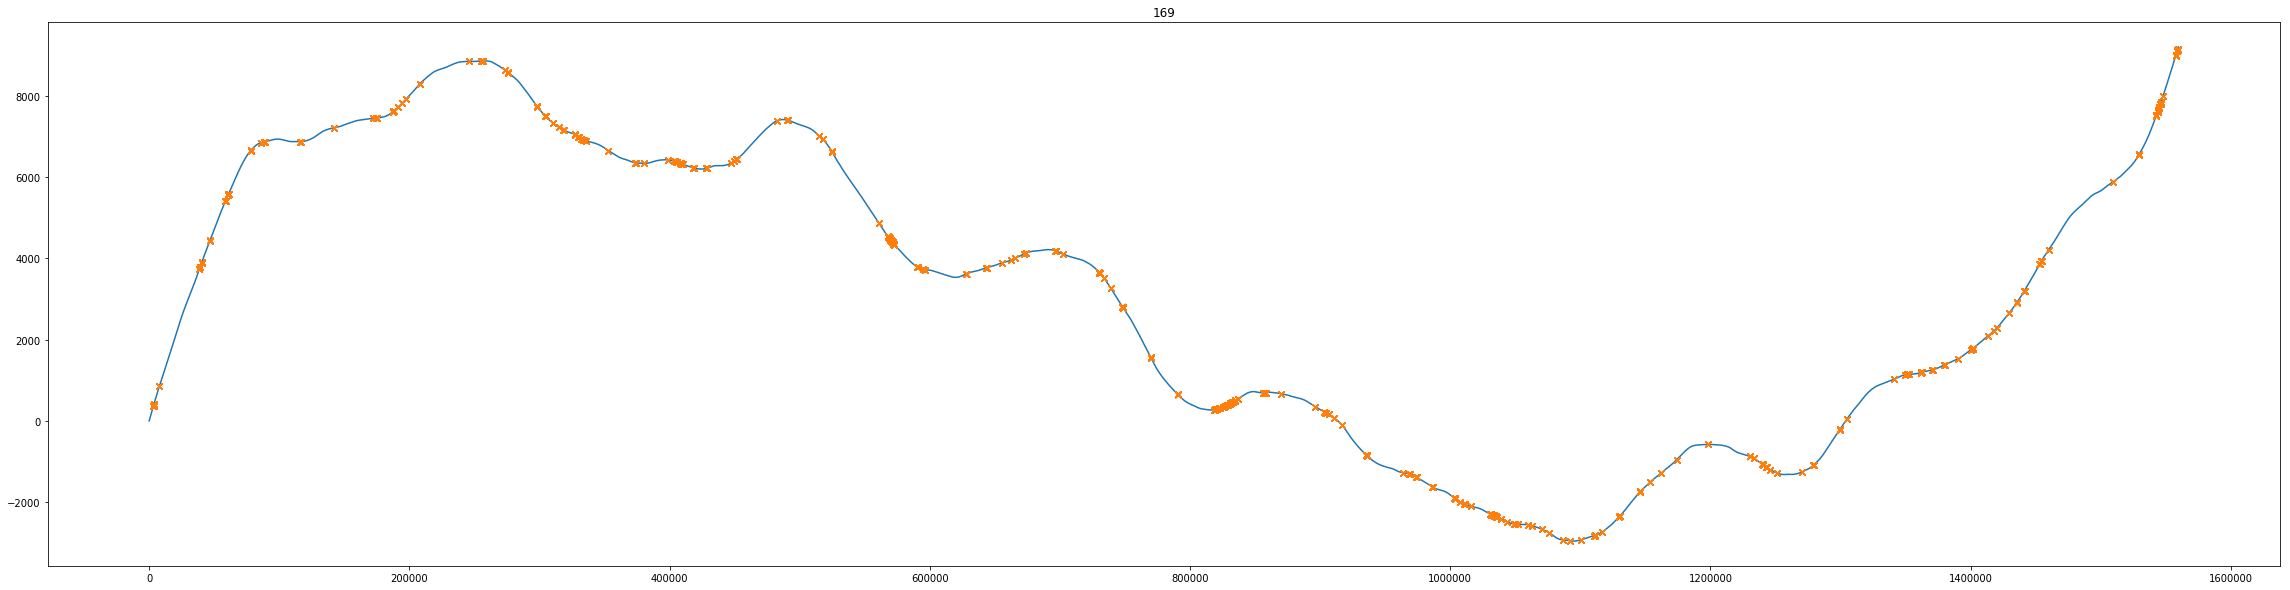

In [13]:
orite.plot_region_list(x3, max_cgc, rotated=True)

In [14]:
x4 = orite.filter_regions_by_length(x3, 50)
len(x4)

161

In [15]:
def calc_density_for_region_list(region_list):
    new_list = []
    
    for region in region_list:
        region.calc_kmer_density()
        new_list.append(region)
    return new_list
    

In [16]:
x5 = calc_density_for_region_list(x4)

In [17]:
def filter_out_empty_kmer_key_in_region_list(region_list):
    
    new_list = []
    
    for region in region_list:
        region.filter_out_empty_kmer_lists_in_kmer_dict()
        new_list.append(region)
    return new_list
    

In [18]:
def sort_region_list_on_density(region_list):
    
    new_list = []
    
    for region in region_list:
        region.sort_kmer_info_by_density()
        new_list.append(region)
    return new_list


In [19]:
x6 = filter_out_empty_kmer_key_in_region_list(x5)

In [20]:
x7 = sort_region_list_on_density(x6)

In [21]:
i = 0
k = 6
bla_list = []
for region in x7: 

    if region.kmer_info.get(k) != None:
        
        for line in region.kmer_info.get(k):
            bla_list.append(line)
       

In [22]:
bla_list.sort(key = lambda x:x[2], reverse = True)

In [23]:
x7[3].kmer_info

{6: [('TTTTTG', [3, 57, 63, 90], 0.09090909090909091),
  ('ATTTTT', [3, 20, 55, 89], 0.043478260869565216),
  ('TGTTTG', [4, 67, 182, 193, 201], 0.029850746268656716),
  ('TTTGTT', [4, 59, 65, 203, 208], 0.026845637583892617),
  ('TTGTTT', [3, 60, 66, 204], 0.020833333333333332),
  ('TTTTGT', [3, 58, 64, 207], 0.020134228187919462)],
 7: [('TTTGTTT', [3, 59, 65, 203], 0.020833333333333332),
  ('TTTTGTT', [3, 58, 64, 207], 0.020134228187919462)]}

In [24]:
x7[3].remove_kmer_overlap()

In [25]:
x7[3].kmer_info

{6: [('TTTTTG', [3, 57, 63, 90], 0.09090909090909091),
  ('ATTTTT', [3, 20, 55, 89], 0.043478260869565216),
  ('TGTTTG', [4, 67, 182, 193, 201], 0.029850746268656716),
  ('TTGTTT', [3, 60, 66, 204], 0.020833333333333332),
  ('TTTTGT', [3, 58, 64, 207], 0.020134228187919462)],
 7: []}

In [26]:
def remove_overlapping_kmers_from_region_list(region_list):
    
    new_list = []
    
    for region in region_list:
        region.remove_kmer_overlap()
        new_list.append(region)
    return new_list

In [27]:
x8 = remove_overlapping_kmers_from_region_list(x7)

In [28]:
x9 = sort_region_list_on_density(x8)

In [29]:
x9[3].kmer_info

{6: [('TTTTTG', [3, 57, 63, 90], 0.09090909090909091),
  ('ATTTTT', [3, 20, 55, 89], 0.043478260869565216),
  ('TGTTTG', [4, 67, 182, 193, 201], 0.029850746268656716),
  ('TTGTTT', [3, 60, 66, 204], 0.020833333333333332),
  ('TTTTGT', [3, 58, 64, 207], 0.020134228187919462)],
 7: []}

In [30]:
i = 0
k = 6
bla_list = []
for region in x8: 

    if region.kmer_info.get(k) != None:
        
        for line in region.kmer_info.get(k):
            new_tuple = (line, region)
            bla_list.append(new_tuple)

In [31]:
bla_list.sort(key = lambda x:x[0][2], reverse = True)

In [32]:
y1 = bla_list[0:1000]

In [33]:
dope_regions = []
for x in y1:
    dope_object= x[1]
    dope_regions.append(dope_object)

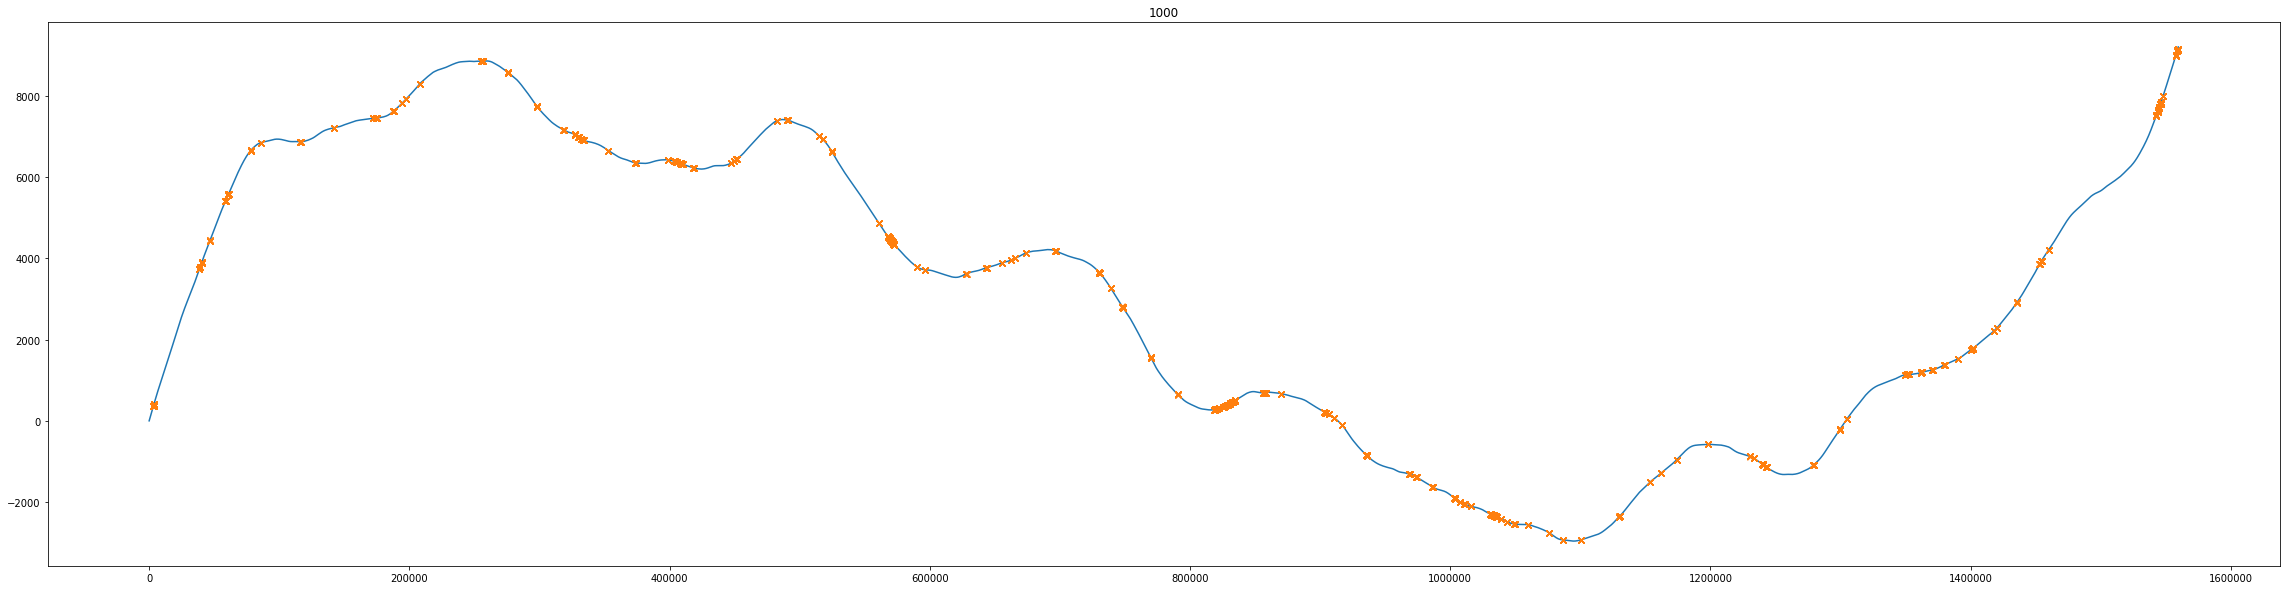

In [34]:
orite.plot_region_list(dope_regions, max_cgc,rotated=True)

In [35]:
orite.sort_regions_by_score(dope_regions)


dopest_regions = dope_regions[:100]




In [36]:
unique = []
for region in dopest_regions:
    unique.append(region.start)
    region.kmer_info
    
print(set(unique))

orite.print_region_list_kmer_info(dopest_regions)

{1262276, 1268006, 1278156, 1319025, 1305329, 1249234, 1257941, 1294712, 1348697}
region: 0 ---  score:  2930.803125221984 ---- pos:  1319025 ---- max_relative_start_pos 1100263
	k= 6
	 TATAAT  -  [4, 29, 45, 75, 160]
	 ATAATA  -  [3, 30, 76, 161]
	 TTATAA  -  [3, 28, 74, 159]
	 TTTTTA  -  [3, 2, 62, 145]
	k= 7
	 TATAATA  -  [3, 29, 75, 160]
	 TTATAAT  -  [3, 28, 74, 159]
	k= 8
	 TTATAATA  -  [3, 28, 74, 159]
	-------
region: 1 ---  score:  2930.803125221984 ---- pos:  1319025 ---- max_relative_start_pos 1100263
	k= 6
	 TATAAT  -  [4, 29, 45, 75, 160]
	 ATAATA  -  [3, 30, 76, 161]
	 TTATAA  -  [3, 28, 74, 159]
	 TTTTTA  -  [3, 2, 62, 145]
	k= 7
	 TATAATA  -  [3, 29, 75, 160]
	 TTATAAT  -  [3, 28, 74, 159]
	k= 8
	 TTATAATA  -  [3, 28, 74, 159]
	-------
region: 2 ---  score:  2930.803125221984 ---- pos:  1319025 ---- max_relative_start_pos 1100263
	k= 6
	 TATAAT  -  [4, 29, 45, 75, 160]
	 ATAATA  -  [3, 30, 76, 161]
	 TTATAA  -  [3, 28, 74, 159]
	 TTTTTA  -  [3, 2, 62, 145]
	k= 7
	 TATAA

	 ATAAGCCT  -  [5, 44, 90, 135, 182, 227]
	 AATAAGCC  -  [5, 43, 89, 134, 181, 226]
	 TAATAAGC  -  [3, 88, 133, 225]
	 TTAATAAG  -  [3, 87, 132, 224]
	 ATTAATAA  -  [3, 86, 131, 223]
	 TATTAATA  -  [3, 85, 130, 222]
	 ATATTAAT  -  [3, 84, 129, 221]
	 AAGCCTTT  -  [3, 46, 92, 184]
	 TAAGCCTT  -  [3, 45, 91, 183]
	k= 9
	 AATAAGCCT  -  [5, 43, 89, 134, 181, 226]
	 TAATAAGCC  -  [3, 88, 133, 225]
	 TTAATAAGC  -  [3, 87, 132, 224]
	 ATTAATAAG  -  [3, 86, 131, 223]
	 TATTAATAA  -  [3, 85, 130, 222]
	 ATATTAATA  -  [3, 84, 129, 221]
	 TAAGCCTTT  -  [3, 45, 91, 183]
	 ATAAGCCTT  -  [3, 44, 90, 182]
	k= 10
	 TAATAAGCCT  -  [3, 88, 133, 225]
	 TTAATAAGCC  -  [3, 87, 132, 224]
	 ATTAATAAGC  -  [3, 86, 131, 223]
	 TATTAATAAG  -  [3, 85, 130, 222]
	 ATATTAATAA  -  [3, 84, 129, 221]
	 ATAAGCCTTT  -  [3, 44, 90, 182]
	 AATAAGCCTT  -  [3, 43, 89, 181]
	-------
region: 16 ---  score:  2536.4913641145054 ---- pos:  1268006 ---- max_relative_start_pos 1049244
	k= 6
	 GCCACT  -  [4, 57, 103, 151, 195]
	 G

	 TAAGCC  -  [5, 45, 91, 136, 183, 228]
	 ATAAGC  -  [5, 44, 90, 135, 182, 227]
	 AATAAG  -  [5, 43, 89, 134, 181, 226]
	 TAATAA  -  [3, 88, 133, 225]
	 ATTAAT  -  [3, 86, 131, 223]
	 TATTAA  -  [3, 85, 130, 222]
	 GCCTTT  -  [3, 48, 94, 186]
	 AGCCTT  -  [3, 47, 93, 185]
	 ATATTA  -  [4, 30, 84, 129, 221]
	 TTAATA  -  [4, 25, 87, 132, 224]
	k= 7
	 GGCCACT  -  [4, 56, 102, 150, 194]
	 AGGCCAC  -  [4, 55, 101, 149, 193]
	 TAAGCCT  -  [5, 45, 91, 136, 183, 228]
	 ATAAGCC  -  [5, 44, 90, 135, 182, 227]
	 AATAAGC  -  [5, 43, 89, 134, 181, 226]
	 TAATAAG  -  [3, 88, 133, 225]
	 TTAATAA  -  [3, 87, 132, 224]
	 ATTAATA  -  [3, 86, 131, 223]
	 TATTAAT  -  [3, 85, 130, 222]
	 ATATTAA  -  [3, 84, 129, 221]
	 AGCCTTT  -  [3, 47, 93, 185]
	 AAGCCTT  -  [3, 46, 92, 184]
	k= 8
	 AGGCCACT  -  [4, 55, 101, 149, 193]
	 ATAAGCCT  -  [5, 44, 90, 135, 182, 227]
	 AATAAGCC  -  [5, 43, 89, 134, 181, 226]
	 TAATAAGC  -  [3, 88, 133, 225]
	 TTAATAAG  -  [3, 87, 132, 224]
	 ATTAATAA  -  [3, 86, 131, 223]
	 TAT

	 GGGCGA  -  [3, 19, 518, 611]
	 CTCATC  -  [3, 1689, 1773, 2287]
	 GCACCC  -  [3, 738, 1205, 1360]
	 GGCACC  -  [3, 737, 1300, 1359]
	 AACCTC  -  [3, 1349, 1637, 1993]
	 TCGGTA  -  [3, 1502, 1897, 2153]
	 TGCGGG  -  [5, 3498, 3851, 4026, 4562, 4620]
	 GGTACT  -  [3, 1899, 2103, 2589]
	 CGGTAC  -  [3, 1898, 2154, 2588]
	 TTTTGA  -  [3, 4347, 4977, 5047]
	 GTTAGC  -  [4, 3503, 3990, 4095, 4446]
	 TCATGC  -  [3, 1111, 1794, 1826]
	 TTTGCA  -  [3, 2300, 2479, 3025]
	 CCTGGC  -  [3, 1998, 2469, 2789]
	 ACCGGC  -  [3, 913, 1052, 1710]
	 CACGAC  -  [3, 2815, 3210, 3653]
	 CCGGCG  -  [3, 914, 1173, 1758]
	 TTTAGG  -  [3, 2007, 2042, 2860]
	 ATTCGG  -  [3, 2134, 2407, 2998]
	 CATTCG  -  [3, 2133, 2902, 2997]
	 GGCTTT  -  [3, 1837, 2265, 2719]
	 ACGCCT  -  [3, 797, 1421, 1685]
	 CCTATT  -  [3, 2227, 2404, 3145]
	 CTTCCG  -  [7, 1369, 1755, 2559, 2658, 2778, 3516, 3532]
	 CCCAGT  -  [3, 3461, 4214, 4389]
	 TCTCGG  -  [3, 607, 1500, 1538]
	 GACGCC  -  [3, 796, 1420, 1738]
	 GGTTTC  -  [5, 942, 12

	 CGGGTT  -  [4, 84, 2987, 3500, 4343]
	 TCGCCG  -  [3, 590, 2881, 3785]
	 ATCCTC  -  [3, 1804, 4654, 5003]
	 GCCATT  -  [3, 1491, 3598, 4691]
	 AGCCCA  -  [3, 526, 1441, 3728]
	 AGCCCC  -  [4, 223, 694, 1911, 4493]
	 TTGAGG  -  [3, 302, 1403, 3509]
	 AGCTCA  -  [3, 156, 2035, 3366]
	 CGCTGA  -  [4, 650, 1335, 3243, 4934]
	 ATAGCT  -  [3, 352, 3364, 3587]
	 AGCCTT  -  [4, 396, 2623, 3951, 4742]
	 TCGGGT  -  [3, 1070, 2962, 4342]
	 CAGGAT  -  [4, 555, 970, 1800, 4942]
	 CCAGGA  -  [4, 554, 1799, 4481, 4941]
	 CTCAAA  -  [4, 438, 3014, 3139, 4830]
	 CTACGC  -  [3, 1683, 4254, 4996]
	 GCTACG  -  [3, 1682, 4372, 4995]
	 GTACTC  -  [3, 754, 2675, 4068]
	 CTCCCG  -  [3, 929, 3239, 4244]
	 TGACTT  -  [3, 1631, 1842, 4973]
	 GTTTAC  -  [3, 1178, 4140, 4525]
	 GCCTTA  -  [3, 1423, 1830, 4771]
	 CAAAGG  -  [3, 1481, 3016, 4832]
	 TCACCG  -  [3, 911, 2271, 4263]
	 CCACCA  -  [4, 227, 2840, 3090, 4700]
	 CCCACC  -  [4, 226, 955, 1443, 4699]
	 CACCGG  -  [3, 912, 4017, 4272]
	 TGCAAG  -  [3, 193, 8

	 AACCTC  -  [3, 1349, 1637, 1993]
	 TCGGTA  -  [3, 1502, 1897, 2153]
	 TGCGGG  -  [5, 3498, 3851, 4026, 4562, 4620]
	 GGTACT  -  [3, 1899, 2103, 2589]
	 CGGTAC  -  [3, 1898, 2154, 2588]
	 TTTTGA  -  [3, 4347, 4977, 5047]
	 GTTAGC  -  [4, 3503, 3990, 4095, 4446]
	 TCATGC  -  [3, 1111, 1794, 1826]
	 TTTGCA  -  [3, 2300, 2479, 3025]
	 CCTGGC  -  [3, 1998, 2469, 2789]
	 ACCGGC  -  [3, 913, 1052, 1710]
	 CACGAC  -  [3, 2815, 3210, 3653]
	 CCGGCG  -  [3, 914, 1173, 1758]
	 TTTAGG  -  [3, 2007, 2042, 2860]
	 ATTCGG  -  [3, 2134, 2407, 2998]
	 CATTCG  -  [3, 2133, 2902, 2997]
	 GGCTTT  -  [3, 1837, 2265, 2719]
	 ACGCCT  -  [3, 797, 1421, 1685]
	 CCTATT  -  [3, 2227, 2404, 3145]
	 CTTCCG  -  [7, 1369, 1755, 2559, 2658, 2778, 3516, 3532]
	 CCCAGT  -  [3, 3461, 4214, 4389]
	 TCTCGG  -  [3, 607, 1500, 1538]
	 GACGCC  -  [3, 796, 1420, 1738]
	 GGTTTC  -  [5, 942, 1238, 1455, 2417, 2535]
	 GCCTCA  -  [5, 1687, 1696, 2811, 3012, 3283]
	 CTGCCA  -  [3, 2111, 2837, 3078]
	 ATAAAG  -  [3, 2764, 3157, 3

	 AACCCA  -  [5, 382, 493, 1436, 3206, 3861]
	 GAGTTT  -  [4, 1265, 2139, 3630, 4049]
	 TTCGGT  -  [3, 1896, 2152, 3986]
	 CTTCAT  -  [3, 1528, 3063, 3618]
	 CAGCTA  -  [6, 830, 1470, 2608, 4370, 4666, 5014]
	 TTTGTA  -  [3, 751, 2771, 2852]
	 TGAACC  -  [4, 491, 1587, 3204, 3296]
	 CTCGCG  -  [3, 479, 500, 2584]
	 ACGCCA  -  [3, 1489, 1739, 3596]
	 GTTTCA  -  [4, 1239, 2536, 3632, 4051]
	 GCTTTT  -  [3, 641, 2266, 2752]
	 GGCTGC  -  [4, 1607, 1978, 2835, 4431]
	 CCTCAT  -  [3, 1688, 2286, 3810]
	 TTAGCC  -  [6, 221, 619, 1909, 2621, 4447, 4491]
	 GCTTAG  -  [3, 318, 1907, 2455]
	 AAGCTA  -  [4, 2202, 2390, 2828, 5052]
	 ACCGCT  -  [3, 2120, 2273, 4265]
	 GGCTTC  -  [6, 240, 1187, 1753, 2428, 3616, 4540]
	 GCTACC  -  [6, 365, 1146, 2204, 2276, 3440, 4668]
	 TCCCTG  -  [4, 401, 1813, 2467, 3270]
	 CTACCA  -  [5, 366, 1869, 2205, 2651, 3959]
	 AGCTAC  -  [6, 354, 2203, 2391, 3248, 4371, 4667]
	 TCCCTT  -  [5, 855, 1568, 2421, 3493, 4454]
	 TTCCTC  -  [4, 1572, 3772, 4241, 4458]
	 CTTCCT 

	 GGTATTA  -  [3, 2973, 4487, 4796]
	 TGAGCTT  -  [4, 1904, 3165, 3678, 4336]
	 TTTCACC  -  [4, 2269, 2722, 4261, 4760]
	 TCGCGTC  -  [3, 501, 704, 2377]
	 CGCTACC  -  [3, 364, 1145, 2275]
	 CTCCCCA  -  [3, 2128, 2639, 4071]
	 CTTAACC  -  [4, 1216, 1634, 2443, 3858]
	 CCGCTAC  -  [3, 2274, 2884, 4266]
	 TTAGCTT  -  [3, 1615, 3504, 3672]
	 CCTACCA  -  [3, 1868, 2650, 3958]
	 TCCTACC  -  [3, 1867, 2649, 3957]
	 GACTTAA  -  [3, 1632, 2441, 3856]
	 ATTTCAC  -  [3, 2014, 2548, 4260]
	 TTCCACT  -  [3, 243, 666, 2513]
	 CCCTTCC  -  [5, 663, 1569, 2177, 2557, 4455]
	 CTACCAC  -  [3, 366, 1869, 2651]
	 CTACCTT  -  [3, 1147, 1581, 3441]
	 TCACCTT  -  [4, 1699, 2347, 2724, 4762]
	 CAAAAGG  -  [3, 2483, 3923, 4781]
	 TACGGCT  -  [3, 1834, 3436, 4143]
	 TTCCTAC  -  [3, 1620, 2648, 3956]
	 TTCACCT  -  [3, 2346, 2723, 4761]
	 CCTGTGT  -  [3, 1278, 1447, 3721]
	 CCCCTTT  -  [3, 508, 2159, 2956]
	 TTAGCTG  -  [3, 1646, 2052, 4096]
	 TTCCCTC  -  [3, 2073, 2580, 4546]
	 TGCCCCA  -  [3, 2384, 2992, 4883]


	 CCTTGC  -  [5, 857, 2448, 3495, 3705, 4324]
	 CCAGCT  -  [6, 496, 829, 3528, 4184, 4369, 4665]
	 AACCCA  -  [5, 382, 493, 1436, 3206, 3861]
	 GAGTTT  -  [4, 1265, 2139, 3630, 4049]
	 TTCGGT  -  [3, 1896, 2152, 3986]
	 CTTCAT  -  [3, 1528, 3063, 3618]
	 CAGCTA  -  [6, 830, 1470, 2608, 4370, 4666, 5014]
	 TTTGTA  -  [3, 751, 2771, 2852]
	 TGAACC  -  [4, 491, 1587, 3204, 3296]
	 CTCGCG  -  [3, 479, 500, 2584]
	 ACGCCA  -  [3, 1489, 1739, 3596]
	 GTTTCA  -  [4, 1239, 2536, 3632, 4051]
	 GCTTTT  -  [3, 641, 2266, 2752]
	 GGCTGC  -  [4, 1607, 1978, 2835, 4431]
	 CCTCAT  -  [3, 1688, 2286, 3810]
	 TTAGCC  -  [6, 221, 619, 1909, 2621, 4447, 4491]
	 GCTTAG  -  [3, 318, 1907, 2455]
	 AAGCTA  -  [4, 2202, 2390, 2828, 5052]
	 ACCGCT  -  [3, 2120, 2273, 4265]
	 GGCTTC  -  [6, 240, 1187, 1753, 2428, 3616, 4540]
	 GCTACC  -  [6, 365, 1146, 2204, 2276, 3440, 4668]
	 TCCCTG  -  [4, 401, 1813, 2467, 3270]
	 CTACCA  -  [5, 366, 1869, 2205, 2651, 3959]
	 AGCTAC  -  [6, 354, 2203, 2391, 3248, 4371, 4667]

	 TTAGCTG  -  [3, 1646, 2052, 4096]
	 TTCCCTC  -  [3, 2073, 2580, 4546]
	 TGCCCCA  -  [3, 2384, 2992, 4883]
	 TACCTGA  -  [3, 2192, 4288, 4708]
	 CTACCTG  -  [3, 2191, 4287, 4707]
	 TGGTAGG  -  [3, 2144, 3908, 4685]
	 CTTTCCC  -  [3, 29, 2071, 2578]
	 CATCGGC  -  [4, 59, 1677, 1691, 3479]
	 TCATCGG  -  [4, 58, 1067, 1690, 3478]
	 ACCCTTA  -  [3, 740, 3099, 3311]
	 CCACCTG  -  [3, 1304, 1444, 3901]
	 ACCACCT  -  [3, 1303, 2653, 3900]
	 GCACCAC  -  [3, 1301, 3649, 3898]
	 CCTTTCG  -  [3, 2161, 2958, 4808]
	 TTCCTCC  -  [3, 1572, 3772, 4241]
	 CTTTCGA  -  [3, 1260, 2162, 3943]
	 GACAAGG  -  [3, 1133, 3656, 3833]
	 GCTATCC  -  [3, 2246, 4803, 5000]
	 CGTCCAT  -  [3, 1820, 4192, 4578]
	 TCGTCCA  -  [3, 1819, 4191, 4577]
	 CCATGAC  -  [3, 2208, 4195, 4970]
	 AGCTATC  -  [3, 2245, 4802, 5053]
	 GTTTCAG  -  [3, 1239, 2536, 4051]
	 CCCCACT  -  [3, 2027, 4596, 4885]
	 CTTCCTC  -  [3, 1571, 3771, 4457]
	 CCTTCCT  -  [3, 1570, 3770, 4456]
	 TCCCTTC  -  [3, 1568, 2421, 4454]
	 CACTGGA  -  [3, 370, 

	 TTTCGA  -  [3, 1261, 2163, 3944]
	 TTCCCC  -  [5, 109, 1413, 2025, 3430, 4594]
	 TGCACC  -  [3, 1204, 3027, 3897]
	 ACAAGG  -  [3, 1134, 3657, 3834]
	 GACAAG  -  [3, 1133, 3656, 3833]
	 CACCCC  -  [4, 924, 1206, 1361, 4530]
	 GCTTAT  -  [3, 335, 2091, 3041]
	 GTTATC  -  [5, 626, 3394, 4115, 4819, 5139]
	 TCTCCT  -  [3, 1077, 1865, 3795]
	 CACGGC  -  [4, 277, 455, 3578, 3934]
	 TAGGCC  -  [3, 1943, 4219, 4688]
	 TTCCGA  -  [3, 770, 1370, 3517]
	 TCCTCT  -  [5, 413, 1256, 4459, 4655, 5004]
	 TCCCCC  -  [4, 506, 1414, 2096, 4180]
	 ACGAGC  -  [4, 203, 1224, 2242, 3879]
	 CCCCCG  -  [5, 12, 1415, 2097, 4032, 4608]
	 GTCCAT  -  [3, 1821, 4193, 4579]
	 CGTCCA  -  [3, 1820, 4192, 4578]
	 GTACCG  -  [3, 1708, 4207, 4469]
	 CCATGA  -  [3, 2208, 4195, 4970]
	 ATGGGC  -  [3, 516, 1356, 3279]
	 ATCCTT  -  [3, 2021, 2529, 4806]
	 GGCACG  -  [3, 1652, 2488, 4438]
	 CTGGCA  -  [3, 1650, 2790, 4436]
	 TTTCAG  -  [4, 328, 1240, 2537, 4052]
	 CCCCAC  -  [5, 225, 2027, 4596, 4698, 4885]
	 CGCCTT  -  [3

	 TTTAGG  -  [3, 2007, 2042, 2860]
	 ATTCGG  -  [3, 2134, 2407, 2998]
	 CATTCG  -  [3, 2133, 2902, 2997]
	 GGCTTT  -  [3, 1837, 2265, 2719]
	 ACGCCT  -  [3, 797, 1421, 1685]
	 CCTATT  -  [3, 2227, 2404, 3145]
	 CTTCCG  -  [7, 1369, 1755, 2559, 2658, 2778, 3516, 3532]
	 CCCAGT  -  [3, 3461, 4214, 4389]
	 TCTCGG  -  [3, 607, 1500, 1538]
	 GACGCC  -  [3, 796, 1420, 1738]
	 GGTTTC  -  [5, 942, 1238, 1455, 2417, 2535]
	 GCCTCA  -  [5, 1687, 1696, 2811, 3012, 3283]
	 CTGCCA  -  [3, 2111, 2837, 3078]
	 ATAAAG  -  [3, 2764, 3157, 3738]
	 ACTTAG  -  [3, 1644, 2031, 2619]
	 CTTAGG  -  [4, 1151, 1425, 1703, 2456]
	 CCTATC  -  [4, 256, 893, 959, 1564]
	 ACCTTC  -  [3, 2656, 2726, 3638]
	 CAGCTC  -  [3, 497, 549, 1534]
	 TGAGCT  -  [7, 1904, 1951, 3165, 3246, 3341, 3678, 4336]
	 CCACGG  -  [3, 276, 454, 1322]
	 TTGAGC  -  [3, 3677, 4335, 4733]
	 AGGCTG  -  [4, 1606, 2834, 2863, 3019]
	 TTGCGG  -  [3, 3497, 3850, 4561]
	 AGCTTA  -  [5, 1906, 2090, 2454, 3050, 3680]
	 GCTGTT  -  [3, 1954, 2002, 3021]

	 TACTAA  -  [4, 421, 1432, 3104, 5159]
	 TAGGAC  -  [3, 1153, 2458, 4715]
	 ATGCCT  -  [3, 746, 1828, 4321]
	 GTCAAG  -  [3, 1515, 4474, 5102]
	 GTTAAT  -  [3, 1385, 3360, 4984]
	 TTTTAT  -  [4, 149, 643, 3179, 4964]
	 TCCATG  -  [3, 1353, 4194, 4969]
	 TATCTT  -  [4, 298, 1779, 3940, 5141]
	 GACAGC  -  [3, 1086, 3948, 4749]
	 AGGGGT  -  [3, 939, 3320, 4615]
	 CGAGCT  -  [3, 204, 2243, 3880]
	 GTGGGT  -  [4, 186, 683, 1033, 5123]
	 AATTTT  -  [4, 147, 1921, 4962, 5088]
	 GCCAGG  -  [3, 1234, 1798, 4940]
	 TGTGTT  -  [3, 1280, 4908, 4989]
	 GCAGGT  -  [3, 1115, 3425, 4837]
	 CTGCCC  -  [3, 838, 2383, 4604]
	 CCCCTC  -  [3, 926, 3765, 4726]
	 AGCCTC  -  [3, 950, 2507, 4752]
	 CTGCTT  -  [3, 543, 3219, 4357]
	 GCCTTC  -  [3, 397, 1330, 4225]
	 TTCACG  -  [3, 1009, 3576, 4845]
	 ACTACA  -  [3, 247, 1344, 4121]
	 GTCTCA  -  [3, 725, 2898, 4630]
	 ATTCCG  -  [3, 339, 3611, 4280]
	 CTCACC  -  [3, 910, 1698, 4856]
	 GGGACC  -  [3, 466, 2046, 4412]
	 CTGATC  -  [3, 652, 2866, 4648]
	 GGTTTG  -

	 CGTCCT  -  [3, 1024, 1254, 3059]
	 CGGTTT  -  [4, 1454, 2296, 2416, 4172]
	 CATCGG  -  [5, 59, 1068, 1677, 1691, 3479]
	 CTATCC  -  [6, 894, 960, 1565, 2247, 4804, 5001]
	 CCCTTT  -  [4, 217, 509, 2160, 2957]
	 GTTTTG  -  [4, 2298, 2769, 4346, 5046]
	 TTTTCG  -  [3, 1923, 2571, 3984]
	 TTCCCT  -  [6, 400, 1812, 2073, 2420, 2580, 4546]
	 ATTACT  -  [3, 1524, 3127, 3601]
	 TCCTGC  -  [4, 446, 963, 1026, 3217]
	 CCTTGC  -  [5, 857, 2448, 3495, 3705, 4324]
	 CCAGCT  -  [6, 496, 829, 3528, 4184, 4369, 4665]
	 AACCCA  -  [5, 382, 493, 1436, 3206, 3861]
	 GAGTTT  -  [4, 1265, 2139, 3630, 4049]
	 TTCGGT  -  [3, 1896, 2152, 3986]
	 CTTCAT  -  [3, 1528, 3063, 3618]
	 CAGCTA  -  [6, 830, 1470, 2608, 4370, 4666, 5014]
	 TTTGTA  -  [3, 751, 2771, 2852]
	 TGAACC  -  [4, 491, 1587, 3204, 3296]
	 CTCGCG  -  [3, 479, 500, 2584]
	 ACGCCA  -  [3, 1489, 1739, 3596]
	 GTTTCA  -  [4, 1239, 2536, 3632, 4051]
	 GCTTTT  -  [3, 641, 2266, 2752]
	 GGCTGC  -  [4, 1607, 1978, 2835, 4431]
	 CCTCAT  -  [3, 1688, 2

	 GTTAAT  -  [3, 1385, 3360, 4984]
	 TTTTAT  -  [4, 149, 643, 3179, 4964]
	 TCCATG  -  [3, 1353, 4194, 4969]
	 TATCTT  -  [4, 298, 1779, 3940, 5141]
	 GACAGC  -  [3, 1086, 3948, 4749]
	 AGGGGT  -  [3, 939, 3320, 4615]
	 CGAGCT  -  [3, 204, 2243, 3880]
	 GTGGGT  -  [4, 186, 683, 1033, 5123]
	 AATTTT  -  [4, 147, 1921, 4962, 5088]
	 GCCAGG  -  [3, 1234, 1798, 4940]
	 TGTGTT  -  [3, 1280, 4908, 4989]
	 GCAGGT  -  [3, 1115, 3425, 4837]
	 CTGCCC  -  [3, 838, 2383, 4604]
	 CCCCTC  -  [3, 926, 3765, 4726]
	 AGCCTC  -  [3, 950, 2507, 4752]
	 CTGCTT  -  [3, 543, 3219, 4357]
	 GCCTTC  -  [3, 397, 1330, 4225]
	 TTCACG  -  [3, 1009, 3576, 4845]
	 ACTACA  -  [3, 247, 1344, 4121]
	 GTCTCA  -  [3, 725, 2898, 4630]
	 ATTCCG  -  [3, 339, 3611, 4280]
	 CTCACC  -  [3, 910, 1698, 4856]
	 GGGACC  -  [3, 466, 2046, 4412]
	 CTGATC  -  [3, 652, 2866, 4648]
	 GGTTTG  -  [3, 165, 3661, 4173]
	 ACTTGC  -  [3, 870, 3109, 4901]
	 TATCCT  -  [3, 961, 4805, 5002]
	 GAAGCT  -  [3, 1004, 2201, 5051]
	 TATCCA  -  [3, 8

	 CCTGTG  -  [4, 1278, 1447, 3721, 3904]
	 GCTCTC  -  [4, 605, 1536, 1863, 3236]
	 TTAACC  -  [4, 1217, 1635, 2444, 3859]
	 ATCCAT  -  [3, 2979, 4133, 4968]
	 TACCTT  -  [4, 788, 1148, 1582, 3442]
	 TCTTGA  -  [4, 136, 300, 1047, 2799]
	 AGCTAA  -  [3, 831, 1471, 2829]
	 TAGCCT  -  [3, 620, 949, 2622]
	 GGCTAC  -  [3, 1429, 1681, 3439]
	 CCCCAG  -  [5, 827, 2641, 3460, 4073, 4182]
	 TACCAC  -  [4, 367, 1870, 2652, 3054]
	 GCCTCC  -  [4, 799, 951, 2322, 3490]
	 TCCGGC  -  [3, 1757, 3613, 3776]
	 GAGGCC  -  [3, 1327, 2167, 3348]
	 CTTGCA  -  [6, 858, 1202, 2449, 3110, 3222, 4902]
	 CAAGGC  -  [4, 862, 1517, 3082, 3559]
	 TACTAC  -  [3, 1579, 1788, 3603]
	 TTCGGA  -  [7, 88, 2135, 2232, 2408, 2999, 4315, 4811]
	 TGCCAC  -  [3, 2838, 3708, 4866]
	 ACTGCC  -  [3, 79, 837, 2110]
	 TCGCCT  -  [3, 777, 2574, 2809]
	 CGTCCT  -  [3, 1024, 1254, 3059]
	 CGGTTT  -  [4, 1454, 2296, 2416, 4172]
	 CATCGG  -  [5, 59, 1068, 1677, 1691, 3479]
	 CTATCC  -  [6, 894, 960, 1565, 2247, 4804, 5001]
	 CCCTTT  

	 GACAGC  -  [3, 1086, 3948, 4749]
	 AGGGGT  -  [3, 939, 3320, 4615]
	 CGAGCT  -  [3, 204, 2243, 3880]
	 GTGGGT  -  [4, 186, 683, 1033, 5123]
	 AATTTT  -  [4, 147, 1921, 4962, 5088]
	 GCCAGG  -  [3, 1234, 1798, 4940]
	 TGTGTT  -  [3, 1280, 4908, 4989]
	 GCAGGT  -  [3, 1115, 3425, 4837]
	 CTGCCC  -  [3, 838, 2383, 4604]
	 CCCCTC  -  [3, 926, 3765, 4726]
	 AGCCTC  -  [3, 950, 2507, 4752]
	 CTGCTT  -  [3, 543, 3219, 4357]
	 GCCTTC  -  [3, 397, 1330, 4225]
	 TTCACG  -  [3, 1009, 3576, 4845]
	 ACTACA  -  [3, 247, 1344, 4121]
	 GTCTCA  -  [3, 725, 2898, 4630]
	 ATTCCG  -  [3, 339, 3611, 4280]
	 CTCACC  -  [3, 910, 1698, 4856]
	 GGGACC  -  [3, 466, 2046, 4412]
	 CTGATC  -  [3, 652, 2866, 4648]
	 GGTTTG  -  [3, 165, 3661, 4173]
	 ACTTGC  -  [3, 870, 3109, 4901]
	 TATCCT  -  [3, 961, 4805, 5002]
	 GAAGCT  -  [3, 1004, 2201, 5051]
	 TATCCA  -  [3, 895, 2978, 4967]
	 GCCGCC  -  [3, 823, 4222, 4920]
	 GCCCAC  -  [3, 452, 1442, 4586]
	 GAAGTT  -  [3, 179, 4112, 4331]
	 TGTCTC  -  [3, 476, 724, 4629

	 GCCTCT  -  [4, 1212, 1982, 2508, 3484]
	 ACTTCC  -  [3, 1810, 2777, 3515]
	 TTGAAC  -  [3, 1586, 3203, 3295]
	 GGAACG  -  [3, 1858, 2254, 3568]
	 CCTCAC  -  [5, 1697, 1806, 2812, 3284, 4549]
	 GTTACG  -  [4, 1166, 1486, 1957, 3448]
	 CCCACT  -  [5, 2028, 3118, 4597, 4638, 4886]
	 GTGTTA  -  [3, 3392, 4909, 5111]
	 AAAAGG  -  [4, 2484, 3406, 3924, 4782]
	 CAAAAG  -  [4, 2483, 2503, 3923, 4781]
	 TTTCGG  -  [5, 1924, 2231, 2960, 3985, 4810]
	 GTTTCC  -  [4, 107, 943, 1456, 2418]
	 GTCTTG  -  [3, 1046, 2434, 2798]
	 AAAGGC  -  [4, 2485, 3017, 4783, 4833]
	 CCGCTA  -  [4, 1915, 2274, 2884, 4266]
	 CCACCT  -  [5, 956, 1304, 1444, 2654, 3901]
	 CCCCTT  -  [8, 111, 508, 1363, 2159, 2556, 2956, 3256, 4824]
	 CTACCT  -  [6, 1147, 1581, 2191, 3441, 4287, 4707]
	 TTAAAA  -  [3, 3402, 5145, 5182]
	 GGGTCT  -  [3, 1015, 1072, 2796]
	 TTCTCC  -  [3, 2126, 3170, 3917]
	 GCTGCC  -  [5, 1608, 1979, 2836, 3077, 4603]
	 GCTTGA  -  [3, 1877, 3507, 3675]
	 AGCTTG  -  [3, 1876, 3506, 3674]
	 TGCAGC  -  [3

	 TTCCCTC  -  [3, 2073, 2580, 4546]
	 TGCCCCA  -  [3, 2384, 2992, 4883]
	 TACCTGA  -  [3, 2192, 4288, 4708]
	 CTACCTG  -  [3, 2191, 4287, 4707]
	 TGGTAGG  -  [3, 2144, 3908, 4685]
	 CTTTCCC  -  [3, 29, 2071, 2578]
	 CATCGGC  -  [4, 59, 1677, 1691, 3479]
	 TCATCGG  -  [4, 58, 1067, 1690, 3478]
	 ACCCTTA  -  [3, 740, 3099, 3311]
	 CCACCTG  -  [3, 1304, 1444, 3901]
	 ACCACCT  -  [3, 1303, 2653, 3900]
	 GCACCAC  -  [3, 1301, 3649, 3898]
	 CCTTTCG  -  [3, 2161, 2958, 4808]
	 TTCCTCC  -  [3, 1572, 3772, 4241]
	 CTTTCGA  -  [3, 1260, 2162, 3943]
	 GACAAGG  -  [3, 1133, 3656, 3833]
	 GCTATCC  -  [3, 2246, 4803, 5000]
	 CGTCCAT  -  [3, 1820, 4192, 4578]
	 TCGTCCA  -  [3, 1819, 4191, 4577]
	 CCATGAC  -  [3, 2208, 4195, 4970]
	 AGCTATC  -  [3, 2245, 4802, 5053]
	 GTTTCAG  -  [3, 1239, 2536, 4051]
	 CCCCACT  -  [3, 2027, 4596, 4885]
	 CTTCCTC  -  [3, 1571, 3771, 4457]
	 CCTTCCT  -  [3, 1570, 3770, 4456]
	 TCCCTTC  -  [3, 1568, 2421, 4454]
	 CACTGGA  -  [3, 370, 2516, 3287]
	 AGGCCCT  -  [3, 431, 2

	 CTTACC  -  [3, 1126, 3052, 3308]
	 TTCGCC  -  [5, 589, 2573, 2808, 3456, 4228]
	 TCTTTC  -  [4, 1018, 1259, 2070, 3942]
	 CCTCCT  -  [3, 1574, 1995, 3767]
	 CACTCT  -  [4, 1963, 3070, 3686, 4888]
	 TGTAGC  -  [3, 1509, 3714, 3725]
	 CTTTTG  -  [3, 2753, 4766, 4976]
	 GACTTA  -  [3, 1632, 2441, 3856]
	 CCCGGG  -  [4, 1183, 2099, 3564, 4157]
	 TACGGC  -  [4, 1168, 1834, 3436, 4143]
	 GGGCTT  -  [6, 72, 1186, 1199, 1752, 2718, 4539]
	 TTGAAG  -  [3, 2801, 5020, 5049]
	 GAAGGT  -  [3, 1374, 2930, 3624]
	 AACCTA  -  [3, 891, 1219, 3143]
	 TTCCTA  -  [4, 945, 1620, 2648, 3956]
	 CGACAT  -  [4, 570, 715, 3212, 3583]
	 CTTATC  -  [4, 296, 2092, 3042, 3314]
	 GTTCTT  -  [3, 293, 2068, 2567]
	 CTGAGC  -  [4, 1903, 3245, 3340, 4936]
	 CCTCTT  -  [5, 1213, 1257, 2509, 4728, 5005]
	 GACTTT  -  [3, 2697, 4572, 4974]
	 ACCCCT  -  [5, 925, 1362, 2158, 2819, 4725]
	 CAACCT  -  [3, 1348, 1992, 3636]
	 TACGCA  -  [3, 1959, 3264, 4255]
	 TCACCT  -  [4, 1699, 2347, 2724, 4762]
	 CAGTGA  -  [3, 1000, 1948

	 TGGTAGG  -  [3, 2144, 3908, 4685]
	 CTTTCCC  -  [3, 29, 2071, 2578]
	 CATCGGC  -  [4, 59, 1677, 1691, 3479]
	 TCATCGG  -  [4, 58, 1067, 1690, 3478]
	 ACCCTTA  -  [3, 740, 3099, 3311]
	 CCACCTG  -  [3, 1304, 1444, 3901]
	 ACCACCT  -  [3, 1303, 2653, 3900]
	 GCACCAC  -  [3, 1301, 3649, 3898]
	 CCTTTCG  -  [3, 2161, 2958, 4808]
	 TTCCTCC  -  [3, 1572, 3772, 4241]
	 CTTTCGA  -  [3, 1260, 2162, 3943]
	 GACAAGG  -  [3, 1133, 3656, 3833]
	 GCTATCC  -  [3, 2246, 4803, 5000]
	 CGTCCAT  -  [3, 1820, 4192, 4578]
	 TCGTCCA  -  [3, 1819, 4191, 4577]
	 CCATGAC  -  [3, 2208, 4195, 4970]
	 AGCTATC  -  [3, 2245, 4802, 5053]
	 GTTTCAG  -  [3, 1239, 2536, 4051]
	 CCCCACT  -  [3, 2027, 4596, 4885]
	 CTTCCTC  -  [3, 1571, 3771, 4457]
	 CCTTCCT  -  [3, 1570, 3770, 4456]
	 TCCCTTC  -  [3, 1568, 2421, 4454]
	 CACTGGA  -  [3, 370, 2516, 3287]
	 AGGCCCT  -  [3, 431, 2168, 3349]
	 TTACGGC  -  [3, 1167, 1833, 4142]
	 AGGATAG  -  [3, 349, 971, 3377]
	 CTCCACC  -  [3, 921, 3032, 4014]
	 ACTTCGC  -  [3, 311, 587, 

	 TGCACC  -  [3, 1204, 3027, 3897]
	 ACAAGG  -  [3, 1134, 3657, 3834]
	 GACAAG  -  [3, 1133, 3656, 3833]
	 CACCCC  -  [4, 924, 1206, 1361, 4530]
	 GCTTAT  -  [3, 335, 2091, 3041]
	 GTTATC  -  [5, 626, 3394, 4115, 4819, 5139]
	 TCTCCT  -  [3, 1077, 1865, 3795]
	 CACGGC  -  [4, 277, 455, 3578, 3934]
	 TAGGCC  -  [3, 1943, 4219, 4688]
	 TTCCGA  -  [3, 770, 1370, 3517]
	 TCCTCT  -  [5, 413, 1256, 4459, 4655, 5004]
	 TCCCCC  -  [4, 506, 1414, 2096, 4180]
	 ACGAGC  -  [4, 203, 1224, 2242, 3879]
	 CCCCCG  -  [5, 12, 1415, 2097, 4032, 4608]
	 GTCCAT  -  [3, 1821, 4193, 4579]
	 CGTCCA  -  [3, 1820, 4192, 4578]
	 GTACCG  -  [3, 1708, 4207, 4469]
	 CCATGA  -  [3, 2208, 4195, 4970]
	 ATGGGC  -  [3, 516, 1356, 3279]
	 ATCCTT  -  [3, 2021, 2529, 4806]
	 GGCACG  -  [3, 1652, 2488, 4438]
	 CTGGCA  -  [3, 1650, 2790, 4436]
	 TTTCAG  -  [4, 328, 1240, 2537, 4052]
	 CCCCAC  -  [5, 225, 2027, 4596, 4698, 4885]
	 CGCCTT  -  [3, 1422, 2575, 4224]
	 GGGTTA  -  [4, 1383, 3358, 3501, 5125]
	 TGTTTT  -  [4, 128

	 AACCAG  -  [3, 3298, 4005, 4367]
	 GGCCTC  -  [5, 1695, 2321, 3011, 3282, 3483]
	 TCGGAG  -  [4, 1540, 2136, 2233, 3000]
	 ACCTTG  -  [5, 1583, 1747, 2349, 2447, 3443]
	 GAGTTC  -  [3, 291, 1396, 1410]
	 CTACTA  -  [4, 1431, 1578, 1787, 2924]
	 AGGTAC  -  [3, 578, 1376, 1706]
	 ACCAGC  -  [3, 3527, 4368, 4664]
	 GCTCTA  -  [3, 2188, 2543, 3328]
	 GCCACT  -  [3, 3709, 4231, 4867]
	 CGGCTT  -  [5, 1836, 2427, 3039, 3615, 3778]
	 TAACCT  -  [4, 890, 1218, 1636, 2445]
	 GTTTTA  -  [3, 2005, 2934, 3178]
	 GCCCTA  -  [3, 2170, 2402, 3351]
	 TTAGCT  -  [8, 1615, 1646, 2033, 2052, 3504, 3672, 4096, 4800]
	 GGAGAG  -  [3, 1407, 2235, 2629]
	 CTCATT  -  [3, 2474, 2900, 3697]
	 GGGACT  -  [3, 2920, 3854, 4150]
	 CTCCCC  -  [5, 2128, 2554, 2639, 4071, 4179]
	 CTCTCG  -  [4, 415, 606, 1537, 2077]
	 TGAGTT  -  [3, 3629, 4048, 4878]
	 CCTTGG  -  [5, 534, 1748, 2350, 2531, 2625]
	 CCTCCA  -  [4, 1351, 1639, 2323, 3031]
	 ACCTCC  -  [4, 1350, 1638, 1994, 3030]
	 CCTTCA  -  [3, 2344, 3062, 3639]
	 CTA

	 GGGACC  -  [3, 466, 2046, 4412]
	 CTGATC  -  [3, 652, 2866, 4648]
	 GGTTTG  -  [3, 165, 3661, 4173]
	 ACTTGC  -  [3, 870, 3109, 4901]
	 TATCCT  -  [3, 961, 4805, 5002]
	 GAAGCT  -  [3, 1004, 2201, 5051]
	 TATCCA  -  [3, 895, 2978, 4967]
	 GCCGCC  -  [3, 823, 4222, 4920]
	 GCCCAC  -  [3, 452, 1442, 4586]
	 GAAGTT  -  [3, 179, 4112, 4331]
	 TGTCTC  -  [3, 476, 724, 4629]
	 CTTGCT  -  [3, 871, 3690, 5030]
	 GAATTT  -  [3, 766, 1139, 4961]
	 CCACTC  -  [3, 668, 3069, 4887]
	 ACAGCC  -  [3, 524, 3949, 4750]
	 CGGAAT  -  [3, 90, 673, 4317]
	 GTTCGG  -  [3, 87, 2151, 4314]
	 AGGGTG  -  [3, 900, 5108, 5130]
	 GAACCC  -  [3, 492, 3205, 4723]
	 ATCTTC  -  [3, 271, 1780, 4506]
	 CCGTAG  -  [3, 342, 1889, 4611]
	 CCCTCT  -  [3, 434, 2075, 4727]
	 CCGCGG  -  [3, 126, 2661, 4427]
	 ATAGGG  -  [3, 463, 599, 4792]
	 GCCCAG  -  [3, 45, 3729, 4388]
	 CAAACT  -  [3, 584, 3336, 4948]
	 ACCTAC  -  [3, 24, 1220, 4415]
	 GACCTA  -  [3, 23, 2225, 4414]
	 TCTCAA  -  [3, 437, 3138, 4829]
	 CTTTCA  -  [3, 327,

	 AACCTA  -  [3, 891, 1219, 3143]
	 TTCCTA  -  [4, 945, 1620, 2648, 3956]
	 CGACAT  -  [4, 570, 715, 3212, 3583]
	 CTTATC  -  [4, 296, 2092, 3042, 3314]
	 GTTCTT  -  [3, 293, 2068, 2567]
	 CTGAGC  -  [4, 1903, 3245, 3340, 4936]
	 CCTCTT  -  [5, 1213, 1257, 2509, 4728, 5005]
	 GACTTT  -  [3, 2697, 4572, 4974]
	 ACCCCT  -  [5, 925, 1362, 2158, 2819, 4725]
	 CAACCT  -  [3, 1348, 1992, 3636]
	 TACGCA  -  [3, 1959, 3264, 4255]
	 TCACCT  -  [4, 1699, 2347, 2724, 4762]
	 CAGTGA  -  [3, 1000, 1948, 3301]
	 GCTTCA  -  [4, 545, 1007, 1477, 3617]
	 TCCTTG  -  [3, 1400, 2530, 3704]
	 CACTGG  -  [5, 370, 1229, 2516, 3287, 4233]
	 ACGGCT  -  [5, 278, 1835, 3437, 3935, 4144]
	 TCCACC  -  [4, 922, 3033, 3089, 4015]
	 GCCCCA  -  [6, 224, 826, 2385, 2993, 3459, 4884]
	 GGTACC  -  [5, 579, 786, 1707, 2155, 4468]
	 ACTACC  -  [4, 1580, 3604, 4153, 4706]
	 AGGCCC  -  [4, 431, 2168, 3349, 3561]
	 GAGCTA  -  [4, 205, 2244, 3247, 3342]
	 TCCCCT  -  [6, 110, 2555, 3255, 3431, 3764, 4823]
	 ACTTCG  -  [4, 311, 

	 GCTCTA  -  [3, 2188, 2543, 3328]
	 GCCACT  -  [3, 3709, 4231, 4867]
	 CGGCTT  -  [5, 1836, 2427, 3039, 3615, 3778]
	 TAACCT  -  [4, 890, 1218, 1636, 2445]
	 GTTTTA  -  [3, 2005, 2934, 3178]
	 GCCCTA  -  [3, 2170, 2402, 3351]
	 TTAGCT  -  [8, 1615, 1646, 2033, 2052, 3504, 3672, 4096, 4800]
	 GGAGAG  -  [3, 1407, 2235, 2629]
	 CTCATT  -  [3, 2474, 2900, 3697]
	 GGGACT  -  [3, 2920, 3854, 4150]
	 CTCCCC  -  [5, 2128, 2554, 2639, 4071, 4179]
	 CTCTCG  -  [4, 415, 606, 1537, 2077]
	 TGAGTT  -  [3, 3629, 4048, 4878]
	 CCTTGG  -  [5, 534, 1748, 2350, 2531, 2625]
	 CCTCCA  -  [4, 1351, 1639, 2323, 3031]
	 ACCTCC  -  [4, 1350, 1638, 1994, 3030]
	 CCTTCA  -  [3, 2344, 3062, 3639]
	 CTAAGC  -  [3, 691, 1473, 1986]
	 CGGCGG  -  [3, 457, 915, 1759]
	 GCTTAC  -  [3, 3051, 3681, 4359]
	 TCCTTC  -  [4, 2022, 2343, 3061, 3769]
	 CTGATA  -  [4, 3273, 3591, 4711, 5034]
	 CCTTTC  -  [6, 2161, 2577, 2912, 2958, 3953, 4808]
	 TCTCCC  -  [4, 2127, 2638, 3238, 3918]
	 CCTTCC  -  [9, 398, 664, 1570, 2023, 21

	 GCCCAC  -  [3, 452, 1442, 4586]
	 GAAGTT  -  [3, 179, 4112, 4331]
	 TGTCTC  -  [3, 476, 724, 4629]
	 CTTGCT  -  [3, 871, 3690, 5030]
	 GAATTT  -  [3, 766, 1139, 4961]
	 CCACTC  -  [3, 668, 3069, 4887]
	 ACAGCC  -  [3, 524, 3949, 4750]
	 CGGAAT  -  [3, 90, 673, 4317]
	 GTTCGG  -  [3, 87, 2151, 4314]
	 AGGGTG  -  [3, 900, 5108, 5130]
	 GAACCC  -  [3, 492, 3205, 4723]
	 ATCTTC  -  [3, 271, 1780, 4506]
	 CCGTAG  -  [3, 342, 1889, 4611]
	 CCCTCT  -  [3, 434, 2075, 4727]
	 CCGCGG  -  [3, 126, 2661, 4427]
	 ATAGGG  -  [3, 463, 599, 4792]
	 GCCCAG  -  [3, 45, 3729, 4388]
	 CAAACT  -  [3, 584, 3336, 4948]
	 ACCTAC  -  [3, 24, 1220, 4415]
	 GACCTA  -  [3, 23, 2225, 4414]
	 TCTCAA  -  [3, 437, 3138, 4829]
	 CTTTCA  -  [3, 327, 2721, 4759]
	 TGGCTT  -  [3, 239, 2264, 4680]
	 TTGGCT  -  [3, 238, 2263, 4679]
	 AGGGCT  -  [3, 71, 2717, 4538]
	 AAGGGC  -  [3, 70, 3741, 4537]
	 CACCAA  -  [3, 228, 3091, 4701]
	 TGTTAT  -  [3, 625, 3393, 5112]
	 CCCCGA  -  [3, 13, 1416, 4532]
	 TCCGTA  -  [3, 341, 188

	 CAACCT  -  [3, 1348, 1992, 3636]
	 TACGCA  -  [3, 1959, 3264, 4255]
	 TCACCT  -  [4, 1699, 2347, 2724, 4762]
	 CAGTGA  -  [3, 1000, 1948, 3301]
	 GCTTCA  -  [4, 545, 1007, 1477, 3617]
	 TCCTTG  -  [3, 1400, 2530, 3704]
	 CACTGG  -  [5, 370, 1229, 2516, 3287, 4233]
	 ACGGCT  -  [5, 278, 1835, 3437, 3935, 4144]
	 TCCACC  -  [4, 922, 3033, 3089, 4015]
	 GCCCCA  -  [6, 224, 826, 2385, 2993, 3459, 4884]
	 GGTACC  -  [5, 579, 786, 1707, 2155, 4468]
	 ACTACC  -  [4, 1580, 3604, 4153, 4706]
	 AGGCCC  -  [4, 431, 2168, 3349, 3561]
	 GAGCTA  -  [4, 205, 2244, 3247, 3342]
	 TCCCCT  -  [6, 110, 2555, 3255, 3431, 3764, 4823]
	 ACTTCG  -  [4, 311, 587, 2939, 3454]
	 ATTACC  -  [3, 2335, 4423, 4694]
	 TCATCC  -  [3, 2288, 3065, 4652]
	 TTGCAA  -  [3, 859, 2480, 3223]
	 CGTCCC  -  [5, 504, 2943, 3762, 4211, 4452]
	 TCAAAG  -  [5, 979, 1480, 3015, 4831, 4956]
	 CTACCC  -  [3, 2277, 4154, 4669]
	 TAGCAT  -  [3, 2760, 3992, 5154]
	 CCTACG  -  [4, 1221, 1622, 3434, 4416]
	 GCCTTT  -  [5, 748, 1611, 2576

	 GCCACT  -  [3, 3709, 4231, 4867]
	 CGGCTT  -  [5, 1836, 2427, 3039, 3615, 3778]
	 TAACCT  -  [4, 890, 1218, 1636, 2445]
	 GTTTTA  -  [3, 2005, 2934, 3178]
	 GCCCTA  -  [3, 2170, 2402, 3351]
	 TTAGCT  -  [8, 1615, 1646, 2033, 2052, 3504, 3672, 4096, 4800]
	 GGAGAG  -  [3, 1407, 2235, 2629]
	 CTCATT  -  [3, 2474, 2900, 3697]
	 GGGACT  -  [3, 2920, 3854, 4150]
	 CTCCCC  -  [5, 2128, 2554, 2639, 4071, 4179]
	 CTCTCG  -  [4, 415, 606, 1537, 2077]
	 TGAGTT  -  [3, 3629, 4048, 4878]
	 CCTTGG  -  [5, 534, 1748, 2350, 2531, 2625]
	 CCTCCA  -  [4, 1351, 1639, 2323, 3031]
	 ACCTCC  -  [4, 1350, 1638, 1994, 3030]
	 CCTTCA  -  [3, 2344, 3062, 3639]
	 CTAAGC  -  [3, 691, 1473, 1986]
	 CGGCGG  -  [3, 457, 915, 1759]
	 GCTTAC  -  [3, 3051, 3681, 4359]
	 TCCTTC  -  [4, 2022, 2343, 3061, 3769]
	 CTGATA  -  [4, 3273, 3591, 4711, 5034]
	 CCTTTC  -  [6, 2161, 2577, 2912, 2958, 3953, 4808]
	 TCTCCC  -  [4, 2127, 2638, 3238, 3918]
	 CCTTCC  -  [9, 398, 664, 1570, 2023, 2178, 2558, 2657, 3770, 4456]
	 CCAGT

	 CCAGTA  -  [3, 1460, 4215, 4390]
	 CTCTTT  -  [4, 809, 1258, 1965, 4729]
	 AAGGCT  -  [4, 863, 2833, 3018, 4784]
	 CGCCTG  -  [3, 778, 843, 3719]
	 GGACGC  -  [4, 795, 2683, 4377, 4717]
	 CCCTTG  -  [3, 533, 856, 3494]
	 AGGTTA  -  [4, 878, 994, 1484, 4839]
	 ACCCGG  -  [3, 1182, 3036, 4156]
	 TTACGG  -  [3, 1167, 1833, 4142]
	 TTAATT  -  [3, 145, 1386, 3124]
	 TTTAAT  -  [3, 144, 512, 3123]
	 TAGGGT  -  [3, 2147, 4793, 5129]
	 CCTTTG  -  [4, 749, 790, 4044, 4744]
	 TTCTTT  -  [3, 2069, 2568, 5094]
	 AGGATA  -  [3, 349, 971, 3377]
	 GGGCCT  -  [3, 253, 3010, 3281]
	 CCTTAT  -  [3, 742, 3313, 3798]
	 CCGGGT  -  [4, 83, 101, 2100, 4158]
	 TACTCA  -  [3, 1791, 3695, 4854]
	 CCTTCG  -  [4, 113, 1331, 2423, 4226]
	 TTGCTA  -  [4, 872, 2756, 3691, 4993]
	 GGTCAG  -  [3, 1467, 2605, 4567]
	 CCCACG  -  [4, 453, 1321, 3208, 4587]
	 TACACC  -  [4, 388, 4123, 4270, 4528]
	 ACTCTT  -  [4, 808, 1964, 3687, 4951]
	 TTAGGG  -  [3, 2008, 2043, 5128]
	 ATTAGC  -  [4, 618, 3671, 4490, 4799]
	 TCTCAC  

	 ACTTCC  -  [3, 1810, 2777, 3515]
	 TTGAAC  -  [3, 1586, 3203, 3295]
	 GGAACG  -  [3, 1858, 2254, 3568]
	 CCTCAC  -  [5, 1697, 1806, 2812, 3284, 4549]
	 GTTACG  -  [4, 1166, 1486, 1957, 3448]
	 CCCACT  -  [5, 2028, 3118, 4597, 4638, 4886]
	 GTGTTA  -  [3, 3392, 4909, 5111]
	 AAAAGG  -  [4, 2484, 3406, 3924, 4782]
	 CAAAAG  -  [4, 2483, 2503, 3923, 4781]
	 TTTCGG  -  [5, 1924, 2231, 2960, 3985, 4810]
	 GTTTCC  -  [4, 107, 943, 1456, 2418]
	 GTCTTG  -  [3, 1046, 2434, 2798]
	 AAAGGC  -  [4, 2485, 3017, 4783, 4833]
	 CCGCTA  -  [4, 1915, 2274, 2884, 4266]
	 CCACCT  -  [5, 956, 1304, 1444, 2654, 3901]
	 CCCCTT  -  [8, 111, 508, 1363, 2159, 2556, 2956, 3256, 4824]
	 CTACCT  -  [6, 1147, 1581, 2191, 3441, 4287, 4707]
	 TTAAAA  -  [3, 3402, 5145, 5182]
	 GGGTCT  -  [3, 1015, 1072, 2796]
	 TTCTCC  -  [3, 2126, 3170, 3917]
	 GCTGCC  -  [5, 1608, 1979, 2836, 3077, 4603]
	 GCTTGA  -  [3, 1877, 3507, 3675]
	 AGCTTG  -  [3, 1876, 3506, 3674]
	 TGCAGC  -  [3, 2302, 2451, 4106]
	 TCAAAC  -  [3, 3140

	 CCCTCT  -  [3, 434, 2075, 4727]
	 CCGCGG  -  [3, 126, 2661, 4427]
	 ATAGGG  -  [3, 463, 599, 4792]
	 GCCCAG  -  [3, 45, 3729, 4388]
	 CAAACT  -  [3, 584, 3336, 4948]
	 ACCTAC  -  [3, 24, 1220, 4415]
	 GACCTA  -  [3, 23, 2225, 4414]
	 TCTCAA  -  [3, 437, 3138, 4829]
	 CTTTCA  -  [3, 327, 2721, 4759]
	 TGGCTT  -  [3, 239, 2264, 4680]
	 TTGGCT  -  [3, 238, 2263, 4679]
	 AGGGCT  -  [3, 71, 2717, 4538]
	 AAGGGC  -  [3, 70, 3741, 4537]
	 CACCAA  -  [3, 228, 3091, 4701]
	 TGTTAT  -  [3, 625, 3393, 5112]
	 CCCCGA  -  [3, 13, 1416, 4532]
	 TCCGTA  -  [3, 341, 1888, 4893]
	 TTTGAG  -  [3, 167, 4046, 4732]
	 TATTAG  -  [3, 209, 4489, 4798]
	 GGGTAT  -  [3, 188, 4160, 4795]
	 TCGCGC  -  [3, 314, 4399, 4931]
	 CTCTTC  -  [3, 282, 2510, 4952]
	 TTATTC  -  [3, 337, 4842, 5009]
	 GATAGC  -  [3, 351, 3379, 5036]
	 AACCCC  -  [3, 8, 1935, 4724]
	 TAAGGA  -  [3, 424, 3829, 5162]
	 ACTAAG  -  [3, 422, 690, 5160]
	 CCGTTT  -  [3, 39, 1669, 4861]
	 CCAATT  -  [3, 230, 4038, 5062]
	 CGCTAT  -  [3, 117, 259

	 AGGCCC  -  [4, 431, 2168, 3349, 3561]
	 GAGCTA  -  [4, 205, 2244, 3247, 3342]
	 TCCCCT  -  [6, 110, 2555, 3255, 3431, 3764, 4823]
	 ACTTCG  -  [4, 311, 587, 2939, 3454]
	 ATTACC  -  [3, 2335, 4423, 4694]
	 TCATCC  -  [3, 2288, 3065, 4652]
	 TTGCAA  -  [3, 859, 2480, 3223]
	 CGTCCC  -  [5, 504, 2943, 3762, 4211, 4452]
	 TCAAAG  -  [5, 979, 1480, 3015, 4831, 4956]
	 CTACCC  -  [3, 2277, 4154, 4669]
	 TAGCAT  -  [3, 2760, 3992, 5154]
	 CCTACG  -  [4, 1221, 1622, 3434, 4416]
	 GCCTTT  -  [5, 748, 1611, 2576, 3952, 4743]
	 GACTTC  -  [4, 310, 1843, 3453, 3514]
	 TGCCTT  -  [5, 747, 1610, 1829, 4322, 4770]
	 CTCACT  -  [3, 867, 1807, 3285]
	 GCGCTT  -  [3, 316, 333, 2750]
	 CGCTTT  -  [5, 699, 2122, 2751, 4380, 4757]
	 CTAACC  -  [3, 889, 1434, 3331]
	 CTGTGT  -  [3, 1279, 1448, 3722]
	 CTTCGG  -  [3, 1895, 2424, 4340]
	 CAGGCT  -  [3, 1605, 2540, 4055]
	 ACCTGT  -  [3, 1446, 2338, 3903]
	 CGACTT  -  [3, 2440, 3452, 4899]
	 TCCATC  -  [3, 1675, 1822, 4134]
	 TAGTAC  -  [3, 212, 2615, 2673]

	 CCTTTC  -  [6, 2161, 2577, 2912, 2958, 3953, 4808]
	 TCTCCC  -  [4, 2127, 2638, 3238, 3918]
	 CCTTCC  -  [9, 398, 664, 1570, 2023, 2178, 2558, 2657, 3770, 4456]
	 CCAGTG  -  [3, 1947, 2182, 3300]
	 GTCCTT  -  [3, 2342, 3060, 3703]
	 CTTCCA  -  [5, 242, 273, 665, 2179, 2512]
	 CTTTCG  -  [9, 701, 1260, 2162, 2706, 2959, 3943, 4188, 4574, 4809]
	 TTTCAC  -  [6, 2015, 2269, 2549, 2722, 4261, 4760]
	 CCACGA  -  [3, 3209, 3652, 4588]
	 CATCCA  -  [4, 2289, 3066, 3087, 4132]
	 TACTGA  -  [4, 1901, 2105, 2888, 3748]
	 CAGCTT  -  [5, 1875, 2453, 3049, 3529, 4185]
	 CCTTTA  -  [3, 218, 510, 1612]
	 TATTCA  -  [4, 3147, 3574, 4843, 5010]
	 GCTATC  -  [6, 2246, 2599, 3938, 4803, 5000, 5054]
	 GGATTT  -  [5, 1557, 2012, 3199, 3291, 3913]
	 ACCCAC  -  [4, 1320, 2279, 3117, 3207]
	 AGCTTC  -  [7, 1006, 1476, 1617, 1893, 3167, 3530, 4338]
	 TCCTAC  -  [5, 1576, 1621, 1867, 2649, 3957]
	 TTCCGC  -  [4, 2370, 2659, 2779, 4281]
	 ACTGAG  -  [3, 1902, 2889, 3339]
	 CTGTCC  -  [4, 404, 852, 1885, 2340]


	 TGGCTT  -  [3, 239, 2264, 4680]
	 TTGGCT  -  [3, 238, 2263, 4679]
	 AGGGCT  -  [3, 71, 2717, 4538]
	 AAGGGC  -  [3, 70, 3741, 4537]
	 CACCAA  -  [3, 228, 3091, 4701]
	 TGTTAT  -  [3, 625, 3393, 5112]
	 CCCCGA  -  [3, 13, 1416, 4532]
	 TCCGTA  -  [3, 341, 1888, 4893]
	 TTTGAG  -  [3, 167, 4046, 4732]
	 TATTAG  -  [3, 209, 4489, 4798]
	 GGGTAT  -  [3, 188, 4160, 4795]
	 TCGCGC  -  [3, 314, 4399, 4931]
	 CTCTTC  -  [3, 282, 2510, 4952]
	 TTATTC  -  [3, 337, 4842, 5009]
	 GATAGC  -  [3, 351, 3379, 5036]
	 AACCCC  -  [3, 8, 1935, 4724]
	 TAAGGA  -  [3, 424, 3829, 5162]
	 ACTAAG  -  [3, 422, 690, 5160]
	 CCGTTT  -  [3, 39, 1669, 4861]
	 CCAATT  -  [3, 230, 4038, 5062]
	 CGCTAT  -  [3, 117, 2598, 4999]
	 GCTATT  -  [3, 118, 207, 5016]
	 GGTGTT  -  [3, 104, 4237, 5110]
	k= 7
	 CTTAGCT  -  [3, 1645, 2032, 2051]
	 TTTCCCT  -  [3, 2072, 2419, 2579]
	 CCTTAGG  -  [3, 1150, 1424, 1702]
	 AACCTCC  -  [3, 1349, 1637, 1993]
	 CCTATCC  -  [3, 893, 959, 1564]
	 CCGGCTT  -  [3, 3038, 3614, 3777]
	 TTCG

	 CTACCC  -  [3, 2277, 4154, 4669]
	 TAGCAT  -  [3, 2760, 3992, 5154]
	 CCTACG  -  [4, 1221, 1622, 3434, 4416]
	 GCCTTT  -  [5, 748, 1611, 2576, 3952, 4743]
	 GACTTC  -  [4, 310, 1843, 3453, 3514]
	 TGCCTT  -  [5, 747, 1610, 1829, 4322, 4770]
	 CTCACT  -  [3, 867, 1807, 3285]
	 GCGCTT  -  [3, 316, 333, 2750]
	 CGCTTT  -  [5, 699, 2122, 2751, 4380, 4757]
	 CTAACC  -  [3, 889, 1434, 3331]
	 CTGTGT  -  [3, 1279, 1448, 3722]
	 CTTCGG  -  [3, 1895, 2424, 4340]
	 CAGGCT  -  [3, 1605, 2540, 4055]
	 ACCTGT  -  [3, 1446, 2338, 3903]
	 CGACTT  -  [3, 2440, 3452, 4899]
	 TCCATC  -  [3, 1675, 1822, 4134]
	 TAGTAC  -  [3, 212, 2615, 2673]
	 ACAGGG  -  [3, 250, 1854, 2715]
	 GCTTCC  -  [4, 241, 1618, 1754, 3531]
	 TCCCTC  -  [3, 2074, 2581, 4547]
	 CCCAGC  -  [5, 46, 495, 828, 1438, 4183]
	 ACCGTC  -  [4, 1157, 4200, 4209, 4471]
	 CCTCCC  -  [4, 928, 952, 3491, 4243]
	 AAGGCA  -  [4, 1518, 2486, 3083, 4834]
	 CTTCCC  -  [5, 399, 1811, 2024, 4508, 4545]
	 TCAGGC  -  [4, 734, 2318, 2539, 4054]
	 CCCCG

	 CCACGA  -  [3, 3209, 3652, 4588]
	 CATCCA  -  [4, 2289, 3066, 3087, 4132]
	 TACTGA  -  [4, 1901, 2105, 2888, 3748]
	 CAGCTT  -  [5, 1875, 2453, 3049, 3529, 4185]
	 CCTTTA  -  [3, 218, 510, 1612]
	 TATTCA  -  [4, 3147, 3574, 4843, 5010]
	 GCTATC  -  [6, 2246, 2599, 3938, 4803, 5000, 5054]
	 GGATTT  -  [5, 1557, 2012, 3199, 3291, 3913]
	 ACCCAC  -  [4, 1320, 2279, 3117, 3207]
	 AGCTTC  -  [7, 1006, 1476, 1617, 1893, 3167, 3530, 4338]
	 TCCTAC  -  [5, 1576, 1621, 1867, 2649, 3957]
	 TTCCGC  -  [4, 2370, 2659, 2779, 4281]
	 ACTGAG  -  [3, 1902, 2889, 3339]
	 CTGTCC  -  [4, 404, 852, 1885, 2340]
	 GAGCTT  -  [5, 1905, 2089, 3166, 3679, 4337]
	 CGCTCT  -  [3, 1862, 3235, 3327]
	 TAGCTG  -  [5, 1647, 2053, 3075, 3588, 4097]
	 CCTTAC  -  [3, 1831, 3101, 3307]
	 CCACTT  -  [3, 1642, 2029, 3119]
	 GTATTA  -  [5, 2333, 2974, 4421, 4488, 4797]
	 ATCCGG  -  [3, 2689, 3006, 4169]
	 ACCTGG  -  [3, 1306, 2084, 2788]
	 CCATGG  -  [3, 1354, 2114, 2843]
	 TTCACC  -  [5, 2270, 2346, 2723, 4262, 4761]
	 

	 TTTGAG  -  [3, 167, 4046, 4732]
	 TATTAG  -  [3, 209, 4489, 4798]
	 GGGTAT  -  [3, 188, 4160, 4795]
	 TCGCGC  -  [3, 314, 4399, 4931]
	 CTCTTC  -  [3, 282, 2510, 4952]
	 TTATTC  -  [3, 337, 4842, 5009]
	 GATAGC  -  [3, 351, 3379, 5036]
	 AACCCC  -  [3, 8, 1935, 4724]
	 TAAGGA  -  [3, 424, 3829, 5162]
	 ACTAAG  -  [3, 422, 690, 5160]
	 CCGTTT  -  [3, 39, 1669, 4861]
	 CCAATT  -  [3, 230, 4038, 5062]
	 CGCTAT  -  [3, 117, 2598, 4999]
	 GCTATT  -  [3, 118, 207, 5016]
	 GGTGTT  -  [3, 104, 4237, 5110]
	k= 7
	 CTTAGCT  -  [3, 1645, 2032, 2051]
	 TTTCCCT  -  [3, 2072, 2419, 2579]
	 CCTTAGG  -  [3, 1150, 1424, 1702]
	 AACCTCC  -  [3, 1349, 1637, 1993]
	 CCTATCC  -  [3, 893, 959, 1564]
	 CCGGCTT  -  [3, 3038, 3614, 3777]
	 TTCGGAG  -  [3, 2135, 2232, 2999]
	 ATTCGGA  -  [3, 2134, 2407, 2998]
	 ACCTTAG  -  [3, 1149, 1701, 2049]
	 ACTTAGC  -  [3, 1644, 2031, 2619]
	 AAGGTTT  -  [3, 2931, 3659, 3979]
	 TTGCGGG  -  [3, 3497, 3850, 4561]
	 ACCAGCT  -  [3, 3527, 4368, 4664]
	 GCCACTG  -  [3, 3709,

	 CTAACC  -  [3, 889, 1434, 3331]
	 CTGTGT  -  [3, 1279, 1448, 3722]
	 CTTCGG  -  [3, 1895, 2424, 4340]
	 CAGGCT  -  [3, 1605, 2540, 4055]
	 ACCTGT  -  [3, 1446, 2338, 3903]
	 CGACTT  -  [3, 2440, 3452, 4899]
	 TCCATC  -  [3, 1675, 1822, 4134]
	 TAGTAC  -  [3, 212, 2615, 2673]
	 ACAGGG  -  [3, 250, 1854, 2715]
	 GCTTCC  -  [4, 241, 1618, 1754, 3531]
	 TCCCTC  -  [3, 2074, 2581, 4547]
	 CCCAGC  -  [5, 46, 495, 828, 1438, 4183]
	 ACCGTC  -  [4, 1157, 4200, 4209, 4471]
	 CCTCCC  -  [4, 928, 952, 3491, 4243]
	 AAGGCA  -  [4, 1518, 2486, 3083, 4834]
	 CTTCCC  -  [5, 399, 1811, 2024, 4508, 4545]
	 TCAGGC  -  [4, 734, 2318, 2539, 4054]
	 CCCCGC  -  [4, 696, 1208, 1913, 4033]
	 CATGAC  -  [4, 1629, 2209, 4196, 4971]
	 TGGCAC  -  [4, 1093, 1651, 2846, 4437]
	 ATCCCC  -  [5, 629, 2095, 2869, 3254, 4822]
	 TATCCC  -  [5, 628, 1566, 2094, 2248, 4821]
	 CCGAAG  -  [4, 1372, 4329, 4534, 4738]
	 CTTGAG  -  [4, 301, 1402, 3508, 3676]
	 TCGGTT  -  [3, 1453, 2415, 3987]
	 GGGTAC  -  [3, 785, 2102, 3322]

	 AGCTTC  -  [7, 1006, 1476, 1617, 1893, 3167, 3530, 4338]
	 TCCTAC  -  [5, 1576, 1621, 1867, 2649, 3957]
	 TTCCGC  -  [4, 2370, 2659, 2779, 4281]
	 ACTGAG  -  [3, 1902, 2889, 3339]
	 CTGTCC  -  [4, 404, 852, 1885, 2340]
	 GAGCTT  -  [5, 1905, 2089, 3166, 3679, 4337]
	 CGCTCT  -  [3, 1862, 3235, 3327]
	 TAGCTG  -  [5, 1647, 2053, 3075, 3588, 4097]
	 CCTTAC  -  [3, 1831, 3101, 3307]
	 CCACTT  -  [3, 1642, 2029, 3119]
	 GTATTA  -  [5, 2333, 2974, 4421, 4488, 4797]
	 ATCCGG  -  [3, 2689, 3006, 4169]
	 ACCTGG  -  [3, 1306, 2084, 2788]
	 CCATGG  -  [3, 1354, 2114, 2843]
	 TTCACC  -  [5, 2270, 2346, 2723, 4262, 4761]
	 TGCCCC  -  [5, 2384, 2954, 2992, 4605, 4883]
	 CGGAGT  -  [3, 634, 1541, 2137]
	 TTTCGC  -  [4, 702, 1142, 2572, 2707]
	 CGCCTC  -  [4, 798, 1211, 1686, 2810]
	 GATGTT  -  [3, 3471, 4083, 4981]
	 CACCTC  -  [3, 2284, 3029, 3808]
	 CGCTCG  -  [3, 2878, 3844, 4407]
	 TTTCCC  -  [5, 30, 108, 2072, 2419, 2579]
	 GGTTTT  -  [4, 2297, 2933, 3981, 4345]
	 TCCCCA  -  [5, 2026, 2129, 2

	 ACTAAG  -  [3, 422, 690, 5160]
	 CCGTTT  -  [3, 39, 1669, 4861]
	 CCAATT  -  [3, 230, 4038, 5062]
	 CGCTAT  -  [3, 117, 2598, 4999]
	 GCTATT  -  [3, 118, 207, 5016]
	 GGTGTT  -  [3, 104, 4237, 5110]
	k= 7
	 CTTAGCT  -  [3, 1645, 2032, 2051]
	 TTTCCCT  -  [3, 2072, 2419, 2579]
	 CCTTAGG  -  [3, 1150, 1424, 1702]
	 AACCTCC  -  [3, 1349, 1637, 1993]
	 CCTATCC  -  [3, 893, 959, 1564]
	 CCGGCTT  -  [3, 3038, 3614, 3777]
	 TTCGGAG  -  [3, 2135, 2232, 2999]
	 ATTCGGA  -  [3, 2134, 2407, 2998]
	 ACCTTAG  -  [3, 1149, 1701, 2049]
	 ACTTAGC  -  [3, 1644, 2031, 2619]
	 AAGGTTT  -  [3, 2931, 3659, 3979]
	 TTGCGGG  -  [3, 3497, 3850, 4561]
	 ACCAGCT  -  [3, 3527, 4368, 4664]
	 GCCACTG  -  [3, 3709, 4231, 4867]
	 TTAACCT  -  [3, 1217, 1635, 2444]
	 GGCTGCC  -  [3, 1607, 1978, 2835]
	 CCTTTCC  -  [3, 2577, 2912, 3953]
	 CTGAGCT  -  [3, 1903, 3245, 3340]
	 GGTTTCC  -  [3, 942, 1455, 2417]
	 GCCTCAC  -  [3, 1696, 2811, 3283]
	 GGCCTCA  -  [3, 1695, 3011, 3282]
	 TTACTTC  -  [3, 1525, 2937, 3128]
	 TT

	 ACAGGG  -  [3, 250, 1854, 2715]
	 GCTTCC  -  [4, 241, 1618, 1754, 3531]
	 TCCCTC  -  [3, 2074, 2581, 4547]
	 CCCAGC  -  [5, 46, 495, 828, 1438, 4183]
	 ACCGTC  -  [4, 1157, 4200, 4209, 4471]
	 CCTCCC  -  [4, 928, 952, 3491, 4243]
	 AAGGCA  -  [4, 1518, 2486, 3083, 4834]
	 CTTCCC  -  [5, 399, 1811, 2024, 4508, 4545]
	 TCAGGC  -  [4, 734, 2318, 2539, 4054]
	 CCCCGC  -  [4, 696, 1208, 1913, 4033]
	 CATGAC  -  [4, 1629, 2209, 4196, 4971]
	 TGGCAC  -  [4, 1093, 1651, 2846, 4437]
	 ATCCCC  -  [5, 629, 2095, 2869, 3254, 4822]
	 TATCCC  -  [5, 628, 1566, 2094, 2248, 4821]
	 CCGAAG  -  [4, 1372, 4329, 4534, 4738]
	 CTTGAG  -  [4, 301, 1402, 3508, 3676]
	 TCGGTT  -  [3, 1453, 2415, 3987]
	 GGGTAC  -  [3, 785, 2102, 3322]
	 GGTAGG  -  [3, 2145, 3909, 4686]
	 TGGTAG  -  [3, 2144, 3908, 4685]
	 CCCGCT  -  [3, 697, 1914, 3241]
	 TAGCCC  -  [5, 222, 1910, 2174, 3727, 4492]
	 TCTTCC  -  [5, 272, 1368, 2511, 4507, 4544]
	 ATCGGC  -  [4, 60, 1678, 1692, 3480]
	 TCATCG  -  [4, 58, 1067, 1690, 3478]
	 C

	 CCACTT  -  [3, 1642, 2029, 3119]
	 GTATTA  -  [5, 2333, 2974, 4421, 4488, 4797]
	 ATCCGG  -  [3, 2689, 3006, 4169]
	 ACCTGG  -  [3, 1306, 2084, 2788]
	 CCATGG  -  [3, 1354, 2114, 2843]
	 TTCACC  -  [5, 2270, 2346, 2723, 4262, 4761]
	 TGCCCC  -  [5, 2384, 2954, 2992, 4605, 4883]
	 CGGAGT  -  [3, 634, 1541, 2137]
	 TTTCGC  -  [4, 702, 1142, 2572, 2707]
	 CGCCTC  -  [4, 798, 1211, 1686, 2810]
	 GATGTT  -  [3, 3471, 4083, 4981]
	 CACCTC  -  [3, 2284, 3029, 3808]
	 CGCTCG  -  [3, 2878, 3844, 4407]
	 TTTCCC  -  [5, 30, 108, 2072, 2419, 2579]
	 GGTTTT  -  [4, 2297, 2933, 3981, 4345]
	 TCCCCA  -  [5, 2026, 2129, 2640, 4072, 4595]
	 CTTCGC  -  [8, 114, 312, 588, 1332, 1782, 2375, 3455, 4227]
	 CCGGCT  -  [4, 1711, 3038, 3614, 3777]
	 CTTCAG  -  [3, 284, 546, 1845]
	 GGTCTC  -  [3, 1073, 1310, 2636]
	 CCCTTC  -  [9, 112, 663, 1364, 1569, 2177, 2422, 2557, 4455, 4825]
	 ACGCAT  -  [3, 2685, 3265, 4256]
	 ATGTTT  -  [3, 3472, 4084, 5044]
	 GATTTG  -  [4, 1193, 1558, 3200, 3292]
	 TACCTG  -  [5, 

	 CCTTAGG  -  [3, 1150, 1424, 1702]
	 AACCTCC  -  [3, 1349, 1637, 1993]
	 CCTATCC  -  [3, 893, 959, 1564]
	 CCGGCTT  -  [3, 3038, 3614, 3777]
	 TTCGGAG  -  [3, 2135, 2232, 2999]
	 ATTCGGA  -  [3, 2134, 2407, 2998]
	 ACCTTAG  -  [3, 1149, 1701, 2049]
	 ACTTAGC  -  [3, 1644, 2031, 2619]
	 AAGGTTT  -  [3, 2931, 3659, 3979]
	 TTGCGGG  -  [3, 3497, 3850, 4561]
	 ACCAGCT  -  [3, 3527, 4368, 4664]
	 GCCACTG  -  [3, 3709, 4231, 4867]
	 TTAACCT  -  [3, 1217, 1635, 2444]
	 GGCTGCC  -  [3, 1607, 1978, 2835]
	 CCTTTCC  -  [3, 2577, 2912, 3953]
	 CTGAGCT  -  [3, 1903, 3245, 3340]
	 GGTTTCC  -  [3, 942, 1455, 2417]
	 GCCTCAC  -  [3, 1696, 2811, 3283]
	 GGCCTCA  -  [3, 1695, 3011, 3282]
	 TTACTTC  -  [3, 1525, 2937, 3128]
	 TTCGTCC  -  [3, 2941, 4190, 4576]
	 ACTTAAC  -  [4, 1633, 2395, 2442, 3857]
	 TTCGCTA  -  [3, 115, 1143, 1783]
	 CTTCGCT  -  [3, 114, 1332, 1782]
	 ACCTCCA  -  [3, 1350, 1638, 3030]
	 CTTCCAC  -  [4, 242, 273, 665, 2512]
	 TTGAACC  -  [3, 1586, 3203, 3295]
	 GGATTTG  -  [3, 1557, 

	 CCCCGC  -  [4, 696, 1208, 1913, 4033]
	 CATGAC  -  [4, 1629, 2209, 4196, 4971]
	 TGGCAC  -  [4, 1093, 1651, 2846, 4437]
	 ATCCCC  -  [5, 629, 2095, 2869, 3254, 4822]
	 TATCCC  -  [5, 628, 1566, 2094, 2248, 4821]
	 CCGAAG  -  [4, 1372, 4329, 4534, 4738]
	 CTTGAG  -  [4, 301, 1402, 3508, 3676]
	 TCGGTT  -  [3, 1453, 2415, 3987]
	 GGGTAC  -  [3, 785, 2102, 3322]
	 GGTAGG  -  [3, 2145, 3909, 4686]
	 TGGTAG  -  [3, 2144, 3908, 4685]
	 CCCGCT  -  [3, 697, 1914, 3241]
	 TAGCCC  -  [5, 222, 1910, 2174, 3727, 4492]
	 TCTTCC  -  [5, 272, 1368, 2511, 4507, 4544]
	 ATCGGC  -  [4, 60, 1678, 1692, 3480]
	 TCATCG  -  [4, 58, 1067, 1690, 3478]
	 CCGCCT  -  [4, 842, 1210, 4223, 4283]
	 CACCTG  -  [3, 1305, 1445, 3902]
	 ACCACC  -  [3, 1303, 2653, 3900]
	 CACCAC  -  [3, 1302, 3650, 3899]
	 GCACCA  -  [3, 1301, 3649, 3898]
	 GGCTTG  -  [4, 1200, 3779, 4057, 4681]
	 CTTTAA  -  [3, 511, 1967, 3122]
	 CGGGAA  -  [3, 1656, 3566, 4275]
	 GCTGAT  -  [5, 651, 2865, 3590, 4647, 5033]
	 CATCCT  -  [3, 2020, 321

	 TTTCGC  -  [4, 702, 1142, 2572, 2707]
	 CGCCTC  -  [4, 798, 1211, 1686, 2810]
	 GATGTT  -  [3, 3471, 4083, 4981]
	 CACCTC  -  [3, 2284, 3029, 3808]
	 CGCTCG  -  [3, 2878, 3844, 4407]
	 TTTCCC  -  [5, 30, 108, 2072, 2419, 2579]
	 GGTTTT  -  [4, 2297, 2933, 3981, 4345]
	 TCCCCA  -  [5, 2026, 2129, 2640, 4072, 4595]
	 CTTCGC  -  [8, 114, 312, 588, 1332, 1782, 2375, 3455, 4227]
	 CCGGCT  -  [4, 1711, 3038, 3614, 3777]
	 CTTCAG  -  [3, 284, 546, 1845]
	 GGTCTC  -  [3, 1073, 1310, 2636]
	 CCCTTC  -  [9, 112, 663, 1364, 1569, 2177, 2422, 2557, 4455, 4825]
	 ACGCAT  -  [3, 2685, 3265, 4256]
	 ATGTTT  -  [3, 3472, 4084, 5044]
	 GATTTG  -  [4, 1193, 1558, 3200, 3292]
	 TACCTG  -  [5, 2083, 2192, 2337, 4288, 4708]
	 TCGAGG  -  [4, 575, 2165, 2497, 2679]
	 TAGGGA  -  [3, 464, 2009, 2044]
	 ACATCC  -  [4, 2019, 3214, 3252, 4131]
	 TACTTC  -  [3, 1526, 2938, 3129]
	 TTACTT  -  [3, 1525, 2937, 3128]
	 ACTCCC  -  [3, 2465, 2553, 4070]
	 TTCGTC  -  [4, 2431, 2941, 4190, 4576]
	 GATTTC  -  [4, 1768, 2

	 TTGCGGG  -  [3, 3497, 3850, 4561]
	 ACCAGCT  -  [3, 3527, 4368, 4664]
	 GCCACTG  -  [3, 3709, 4231, 4867]
	 TTAACCT  -  [3, 1217, 1635, 2444]
	 GGCTGCC  -  [3, 1607, 1978, 2835]
	 CCTTTCC  -  [3, 2577, 2912, 3953]
	 CTGAGCT  -  [3, 1903, 3245, 3340]
	 GGTTTCC  -  [3, 942, 1455, 2417]
	 GCCTCAC  -  [3, 1696, 2811, 3283]
	 GGCCTCA  -  [3, 1695, 3011, 3282]
	 TTACTTC  -  [3, 1525, 2937, 3128]
	 TTCGTCC  -  [3, 2941, 4190, 4576]
	 ACTTAAC  -  [4, 1633, 2395, 2442, 3857]
	 TTCGCTA  -  [3, 115, 1143, 1783]
	 CTTCGCT  -  [3, 114, 1332, 1782]
	 ACCTCCA  -  [3, 1350, 1638, 3030]
	 CTTCCAC  -  [4, 242, 273, 665, 2512]
	 TTGAACC  -  [3, 1586, 3203, 3295]
	 GGATTTG  -  [3, 1557, 3199, 3291]
	 TTCAGGC  -  [3, 2317, 2538, 4053]
	 GAGCTTA  -  [3, 1905, 2089, 3679]
	 AGCTTGA  -  [3, 1876, 3506, 3674]
	 GGTATTA  -  [3, 2973, 4487, 4796]
	 TGAGCTT  -  [4, 1904, 3165, 3678, 4336]
	 TTTCACC  -  [4, 2269, 2722, 4261, 4760]
	 TCGCGTC  -  [3, 501, 704, 2377]
	 CGCTACC  -  [3, 364, 1145, 2275]
	 CTCCCCA  - 

	 GGTAGG  -  [3, 2145, 3909, 4686]
	 TGGTAG  -  [3, 2144, 3908, 4685]
	 CCCGCT  -  [3, 697, 1914, 3241]
	 TAGCCC  -  [5, 222, 1910, 2174, 3727, 4492]
	 TCTTCC  -  [5, 272, 1368, 2511, 4507, 4544]
	 ATCGGC  -  [4, 60, 1678, 1692, 3480]
	 TCATCG  -  [4, 58, 1067, 1690, 3478]
	 CCGCCT  -  [4, 842, 1210, 4223, 4283]
	 CACCTG  -  [3, 1305, 1445, 3902]
	 ACCACC  -  [3, 1303, 2653, 3900]
	 CACCAC  -  [3, 1302, 3650, 3899]
	 GCACCA  -  [3, 1301, 3649, 3898]
	 GGCTTG  -  [4, 1200, 3779, 4057, 4681]
	 CTTTAA  -  [3, 511, 1967, 3122]
	 CGGGAA  -  [3, 1656, 3566, 4275]
	 GCTGAT  -  [5, 651, 2865, 3590, 4647, 5033]
	 CATCCT  -  [3, 2020, 3215, 4653]
	 CCGTCA  -  [4, 1158, 4201, 4472, 4673]
	 TTCCTT  -  [3, 1399, 2910, 4042]
	 TACCCG  -  [4, 1128, 1181, 4155, 4670]
	 CGGGGT  -  [4, 1013, 1381, 2563, 4564]
	 CATAGC  -  [4, 1600, 2982, 3586, 5152]
	 TGGCTG  -  [3, 1977, 2000, 4645]
	 TCCTCC  -  [3, 1573, 3773, 4242]
	 TTACCC  -  [4, 1127, 1180, 3309, 4695]
	 TCAGCT  -  [5, 548, 1469, 1533, 2607, 5013]

	 CCGGCT  -  [4, 1711, 3038, 3614, 3777]
	 CTTCAG  -  [3, 284, 546, 1845]
	 GGTCTC  -  [3, 1073, 1310, 2636]
	 CCCTTC  -  [9, 112, 663, 1364, 1569, 2177, 2422, 2557, 4455, 4825]
	 ACGCAT  -  [3, 2685, 3265, 4256]
	 ATGTTT  -  [3, 3472, 4084, 5044]
	 GATTTG  -  [4, 1193, 1558, 3200, 3292]
	 TACCTG  -  [5, 2083, 2192, 2337, 4288, 4708]
	 TCGAGG  -  [4, 575, 2165, 2497, 2679]
	 TAGGGA  -  [3, 464, 2009, 2044]
	 ACATCC  -  [4, 2019, 3214, 3252, 4131]
	 TACTTC  -  [3, 1526, 2938, 3129]
	 TTACTT  -  [3, 1525, 2937, 3128]
	 ACTCCC  -  [3, 2465, 2553, 4070]
	 TTCGTC  -  [4, 2431, 2941, 4190, 4576]
	 GATTTC  -  [4, 1768, 2013, 2907, 3914]
	 CGGGCC  -  [3, 3009, 4028, 4622]
	 GTATGA  -  [3, 1545, 1724, 3162]
	 ACCTTA  -  [4, 1149, 1701, 2049, 3306]
	 CTTGCG  -  [3, 2436, 3496, 4059]
	 GGGGTT  -  [3, 940, 1382, 2564]
	 GGACCG  -  [3, 467, 1155, 2118]
	 GGGTGC  -  [3, 2964, 4103, 4617]
	 TCGTCC  -  [5, 1819, 2942, 3761, 4191, 4577]
	 TTCGCT  -  [5, 115, 1143, 1333, 1783, 2876]
	 CCTCTC  -  [3, 414

	 GCTACG  -  [3, 1682, 4372, 4995]
	 GTACTC  -  [3, 754, 2675, 4068]
	 CTCCCG  -  [3, 929, 3239, 4244]
	 TGACTT  -  [3, 1631, 1842, 4973]
	 GTTTAC  -  [3, 1178, 4140, 4525]
	 GCCTTA  -  [3, 1423, 1830, 4771]
	 CAAAGG  -  [3, 1481, 3016, 4832]
	 TCACCG  -  [3, 911, 2271, 4263]
	 CCACCA  -  [4, 227, 2840, 3090, 4700]
	 CCCACC  -  [4, 226, 955, 1443, 4699]
	 CACCGG  -  [3, 912, 4017, 4272]
	 TGCAAG  -  [3, 193, 860, 3557]
	 TTGGTA  -  [3, 1287, 2143, 4684]
	 AGGACA  -  [3, 426, 2459, 3831]
	 AAGGAC  -  [3, 425, 3095, 3830]
	 AGACCA  -  [3, 1244, 4478, 4662]
	 CCGTCC  -  [3, 1023, 4210, 4451]
	 CCTTCT  -  [3, 1365, 2727, 4826]
	 GCTCCA  -  [3, 551, 920, 4013]
	 TTCGCG  -  [4, 313, 703, 2376, 4930]
	 TTCAAA  -  [3, 1479, 3966, 4955]
	 CTTCAA  -  [3, 1478, 3640, 4954]
	 TTAGGC  -  [3, 1426, 2861, 4912]
	 TTCAGC  -  [4, 329, 547, 1846, 5012]
	 CGTCAT  -  [3, 1159, 1626, 4674]
	 GGACTT  -  [3, 309, 3513, 3855]
	 TACTAA  -  [4, 421, 1432, 3104, 5159]
	 TAGGAC  -  [3, 1153, 2458, 4715]
	 ATGCCT 

	 CTATCC  -  [6, 894, 960, 1565, 2247, 4804, 5001]
	 CCCTTT  -  [4, 217, 509, 2160, 2957]
	 GTTTTG  -  [4, 2298, 2769, 4346, 5046]
	 TTTTCG  -  [3, 1923, 2571, 3984]
	 TTCCCT  -  [6, 400, 1812, 2073, 2420, 2580, 4546]
	 ATTACT  -  [3, 1524, 3127, 3601]
	 TCCTGC  -  [4, 446, 963, 1026, 3217]
	 CCTTGC  -  [5, 857, 2448, 3495, 3705, 4324]
	 CCAGCT  -  [6, 496, 829, 3528, 4184, 4369, 4665]
	 AACCCA  -  [5, 382, 493, 1436, 3206, 3861]
	 GAGTTT  -  [4, 1265, 2139, 3630, 4049]
	 TTCGGT  -  [3, 1896, 2152, 3986]
	 CTTCAT  -  [3, 1528, 3063, 3618]
	 CAGCTA  -  [6, 830, 1470, 2608, 4370, 4666, 5014]
	 TTTGTA  -  [3, 751, 2771, 2852]
	 TGAACC  -  [4, 491, 1587, 3204, 3296]
	 CTCGCG  -  [3, 479, 500, 2584]
	 ACGCCA  -  [3, 1489, 1739, 3596]
	 GTTTCA  -  [4, 1239, 2536, 3632, 4051]
	 GCTTTT  -  [3, 641, 2266, 2752]
	 GGCTGC  -  [4, 1607, 1978, 2835, 4431]
	 CCTCAT  -  [3, 1688, 2286, 3810]
	 TTAGCC  -  [6, 221, 619, 1909, 2621, 4447, 4491]
	 GCTTAG  -  [3, 318, 1907, 2455]
	 AAGCTA  -  [4, 2202, 23

	 GGGCGA  -  [3, 19, 518, 611]
	 CTCATC  -  [3, 1689, 1773, 2287]
	 GCACCC  -  [3, 738, 1205, 1360]
	 GGCACC  -  [3, 737, 1300, 1359]
	 AACCTC  -  [3, 1349, 1637, 1993]
	 TCGGTA  -  [3, 1502, 1897, 2153]
	 TGCGGG  -  [5, 3498, 3851, 4026, 4562, 4620]
	 GGTACT  -  [3, 1899, 2103, 2589]
	 CGGTAC  -  [3, 1898, 2154, 2588]
	 TTTTGA  -  [3, 4347, 4977, 5047]
	 GTTAGC  -  [4, 3503, 3990, 4095, 4446]
	 TCATGC  -  [3, 1111, 1794, 1826]
	 TTTGCA  -  [3, 2300, 2479, 3025]
	 CCTGGC  -  [3, 1998, 2469, 2789]
	 ACCGGC  -  [3, 913, 1052, 1710]
	 CACGAC  -  [3, 2815, 3210, 3653]
	 CCGGCG  -  [3, 914, 1173, 1758]
	 TTTAGG  -  [3, 2007, 2042, 2860]
	 ATTCGG  -  [3, 2134, 2407, 2998]
	 CATTCG  -  [3, 2133, 2902, 2997]
	 GGCTTT  -  [3, 1837, 2265, 2719]
	 ACGCCT  -  [3, 797, 1421, 1685]
	 CCTATT  -  [3, 2227, 2404, 3145]
	 CTTCCG  -  [7, 1369, 1755, 2559, 2658, 2778, 3516, 3532]
	 CCCAGT  -  [3, 3461, 4214, 4389]
	 TCTCGG  -  [3, 607, 1500, 1538]
	 GACGCC  -  [3, 796, 1420, 1738]
	 GGTTTC  -  [5, 942, 12

	 CCACCA  -  [4, 227, 2840, 3090, 4700]
	 CCCACC  -  [4, 226, 955, 1443, 4699]
	 CACCGG  -  [3, 912, 4017, 4272]
	 TGCAAG  -  [3, 193, 860, 3557]
	 TTGGTA  -  [3, 1287, 2143, 4684]
	 AGGACA  -  [3, 426, 2459, 3831]
	 AAGGAC  -  [3, 425, 3095, 3830]
	 AGACCA  -  [3, 1244, 4478, 4662]
	 CCGTCC  -  [3, 1023, 4210, 4451]
	 CCTTCT  -  [3, 1365, 2727, 4826]
	 GCTCCA  -  [3, 551, 920, 4013]
	 TTCGCG  -  [4, 313, 703, 2376, 4930]
	 TTCAAA  -  [3, 1479, 3966, 4955]
	 CTTCAA  -  [3, 1478, 3640, 4954]
	 TTAGGC  -  [3, 1426, 2861, 4912]
	 TTCAGC  -  [4, 329, 547, 1846, 5012]
	 CGTCAT  -  [3, 1159, 1626, 4674]
	 GGACTT  -  [3, 309, 3513, 3855]
	 TACTAA  -  [4, 421, 1432, 3104, 5159]
	 TAGGAC  -  [3, 1153, 2458, 4715]
	 ATGCCT  -  [3, 746, 1828, 4321]
	 GTCAAG  -  [3, 1515, 4474, 5102]
	 GTTAAT  -  [3, 1385, 3360, 4984]
	 TTTTAT  -  [4, 149, 643, 3179, 4964]
	 TCCATG  -  [3, 1353, 4194, 4969]
	 TATCTT  -  [4, 298, 1779, 3940, 5141]
	 GACAGC  -  [3, 1086, 3948, 4749]
	 AGGGGT  -  [3, 939, 3320, 4615]

	 AACCCA  -  [5, 382, 493, 1436, 3206, 3861]
	 GAGTTT  -  [4, 1265, 2139, 3630, 4049]
	 TTCGGT  -  [3, 1896, 2152, 3986]
	 CTTCAT  -  [3, 1528, 3063, 3618]
	 CAGCTA  -  [6, 830, 1470, 2608, 4370, 4666, 5014]
	 TTTGTA  -  [3, 751, 2771, 2852]
	 TGAACC  -  [4, 491, 1587, 3204, 3296]
	 CTCGCG  -  [3, 479, 500, 2584]
	 ACGCCA  -  [3, 1489, 1739, 3596]
	 GTTTCA  -  [4, 1239, 2536, 3632, 4051]
	 GCTTTT  -  [3, 641, 2266, 2752]
	 GGCTGC  -  [4, 1607, 1978, 2835, 4431]
	 CCTCAT  -  [3, 1688, 2286, 3810]
	 TTAGCC  -  [6, 221, 619, 1909, 2621, 4447, 4491]
	 GCTTAG  -  [3, 318, 1907, 2455]
	 AAGCTA  -  [4, 2202, 2390, 2828, 5052]
	 ACCGCT  -  [3, 2120, 2273, 4265]
	 GGCTTC  -  [6, 240, 1187, 1753, 2428, 3616, 4540]
	 GCTACC  -  [6, 365, 1146, 2204, 2276, 3440, 4668]
	 TCCCTG  -  [4, 401, 1813, 2467, 3270]
	 CTACCA  -  [5, 366, 1869, 2205, 2651, 3959]
	 AGCTAC  -  [6, 354, 2203, 2391, 3248, 4371, 4667]
	 TCCCTT  -  [5, 855, 1568, 2421, 3493, 4454]
	 TTCCTC  -  [4, 1572, 3772, 4241, 4458]
	 CTTCCT 

	 CGGTAC  -  [3, 1898, 2154, 2588]
	 TTTTGA  -  [3, 4347, 4977, 5047]
	 GTTAGC  -  [4, 3503, 3990, 4095, 4446]
	 TCATGC  -  [3, 1111, 1794, 1826]
	 TTTGCA  -  [3, 2300, 2479, 3025]
	 CCTGGC  -  [3, 1998, 2469, 2789]
	 ACCGGC  -  [3, 913, 1052, 1710]
	 CACGAC  -  [3, 2815, 3210, 3653]
	 CCGGCG  -  [3, 914, 1173, 1758]
	 TTTAGG  -  [3, 2007, 2042, 2860]
	 ATTCGG  -  [3, 2134, 2407, 2998]
	 CATTCG  -  [3, 2133, 2902, 2997]
	 GGCTTT  -  [3, 1837, 2265, 2719]
	 ACGCCT  -  [3, 797, 1421, 1685]
	 CCTATT  -  [3, 2227, 2404, 3145]
	 CTTCCG  -  [7, 1369, 1755, 2559, 2658, 2778, 3516, 3532]
	 CCCAGT  -  [3, 3461, 4214, 4389]
	 TCTCGG  -  [3, 607, 1500, 1538]
	 GACGCC  -  [3, 796, 1420, 1738]
	 GGTTTC  -  [5, 942, 1238, 1455, 2417, 2535]
	 GCCTCA  -  [5, 1687, 1696, 2811, 3012, 3283]
	 CTGCCA  -  [3, 2111, 2837, 3078]
	 ATAAAG  -  [3, 2764, 3157, 3738]
	 ACTTAG  -  [3, 1644, 2031, 2619]
	 CTTAGG  -  [4, 1151, 1425, 1703, 2456]
	 CCTATC  -  [4, 256, 893, 959, 1564]
	 ACCTTC  -  [3, 2656, 2726, 3638

	 CCTTCT  -  [3, 1365, 2727, 4826]
	 GCTCCA  -  [3, 551, 920, 4013]
	 TTCGCG  -  [4, 313, 703, 2376, 4930]
	 TTCAAA  -  [3, 1479, 3966, 4955]
	 CTTCAA  -  [3, 1478, 3640, 4954]
	 TTAGGC  -  [3, 1426, 2861, 4912]
	 TTCAGC  -  [4, 329, 547, 1846, 5012]
	 CGTCAT  -  [3, 1159, 1626, 4674]
	 GGACTT  -  [3, 309, 3513, 3855]
	 TACTAA  -  [4, 421, 1432, 3104, 5159]
	 TAGGAC  -  [3, 1153, 2458, 4715]
	 ATGCCT  -  [3, 746, 1828, 4321]
	 GTCAAG  -  [3, 1515, 4474, 5102]
	 GTTAAT  -  [3, 1385, 3360, 4984]
	 TTTTAT  -  [4, 149, 643, 3179, 4964]
	 TCCATG  -  [3, 1353, 4194, 4969]
	 TATCTT  -  [4, 298, 1779, 3940, 5141]
	 GACAGC  -  [3, 1086, 3948, 4749]
	 AGGGGT  -  [3, 939, 3320, 4615]
	 CGAGCT  -  [3, 204, 2243, 3880]
	 GTGGGT  -  [4, 186, 683, 1033, 5123]
	 AATTTT  -  [4, 147, 1921, 4962, 5088]
	 GCCAGG  -  [3, 1234, 1798, 4940]
	 TGTGTT  -  [3, 1280, 4908, 4989]
	 GCAGGT  -  [3, 1115, 3425, 4837]
	 CTGCCC  -  [3, 838, 2383, 4604]
	 CCCCTC  -  [3, 926, 3765, 4726]
	 AGCCTC  -  [3, 950, 2507, 4752

	 ACGCCA  -  [3, 1489, 1739, 3596]
	 GTTTCA  -  [4, 1239, 2536, 3632, 4051]
	 GCTTTT  -  [3, 641, 2266, 2752]
	 GGCTGC  -  [4, 1607, 1978, 2835, 4431]
	 CCTCAT  -  [3, 1688, 2286, 3810]
	 TTAGCC  -  [6, 221, 619, 1909, 2621, 4447, 4491]
	 GCTTAG  -  [3, 318, 1907, 2455]
	 AAGCTA  -  [4, 2202, 2390, 2828, 5052]
	 ACCGCT  -  [3, 2120, 2273, 4265]
	 GGCTTC  -  [6, 240, 1187, 1753, 2428, 3616, 4540]
	 GCTACC  -  [6, 365, 1146, 2204, 2276, 3440, 4668]
	 TCCCTG  -  [4, 401, 1813, 2467, 3270]
	 CTACCA  -  [5, 366, 1869, 2205, 2651, 3959]
	 AGCTAC  -  [6, 354, 2203, 2391, 3248, 4371, 4667]
	 TCCCTT  -  [5, 855, 1568, 2421, 3493, 4454]
	 TTCCTC  -  [4, 1572, 3772, 4241, 4458]
	 CTTCCT  -  [4, 1571, 1619, 3771, 4457]
	 GACGCT  -  [3, 2212, 4010, 4378]
	 TGGGTA  -  [3, 187, 1034, 2359]
	 TACGCC  -  [4, 1488, 1684, 3595, 4385]
	 CCTTAG  -  [5, 1150, 1424, 1702, 2050, 4772]
	 CTTTGA  -  [4, 1839, 4045, 4731, 4745]
	 CTTACC  -  [3, 1126, 3052, 3308]
	 TTCGCC  -  [5, 589, 2573, 2808, 3456, 4228]
	 TC

	 TTTAGG  -  [3, 2007, 2042, 2860]
	 ATTCGG  -  [3, 2134, 2407, 2998]
	 CATTCG  -  [3, 2133, 2902, 2997]
	 GGCTTT  -  [3, 1837, 2265, 2719]
	 ACGCCT  -  [3, 797, 1421, 1685]
	 CCTATT  -  [3, 2227, 2404, 3145]
	 CTTCCG  -  [7, 1369, 1755, 2559, 2658, 2778, 3516, 3532]
	 CCCAGT  -  [3, 3461, 4214, 4389]
	 TCTCGG  -  [3, 607, 1500, 1538]
	 GACGCC  -  [3, 796, 1420, 1738]
	 GGTTTC  -  [5, 942, 1238, 1455, 2417, 2535]
	 GCCTCA  -  [5, 1687, 1696, 2811, 3012, 3283]
	 CTGCCA  -  [3, 2111, 2837, 3078]
	 ATAAAG  -  [3, 2764, 3157, 3738]
	 ACTTAG  -  [3, 1644, 2031, 2619]
	 CTTAGG  -  [4, 1151, 1425, 1703, 2456]
	 CCTATC  -  [4, 256, 893, 959, 1564]
	 ACCTTC  -  [3, 2656, 2726, 3638]
	 CAGCTC  -  [3, 497, 549, 1534]
	 TGAGCT  -  [7, 1904, 1951, 3165, 3246, 3341, 3678, 4336]
	 CCACGG  -  [3, 276, 454, 1322]
	 TTGAGC  -  [3, 3677, 4335, 4733]
	 AGGCTG  -  [4, 1606, 2834, 2863, 3019]
	 TTGCGG  -  [3, 3497, 3850, 4561]
	 AGCTTA  -  [5, 1906, 2090, 2454, 3050, 3680]
	 GCTGTT  -  [3, 1954, 2002, 3021]

	 TACTAA  -  [4, 421, 1432, 3104, 5159]
	 TAGGAC  -  [3, 1153, 2458, 4715]
	 ATGCCT  -  [3, 746, 1828, 4321]
	 GTCAAG  -  [3, 1515, 4474, 5102]
	 GTTAAT  -  [3, 1385, 3360, 4984]
	 TTTTAT  -  [4, 149, 643, 3179, 4964]
	 TCCATG  -  [3, 1353, 4194, 4969]
	 TATCTT  -  [4, 298, 1779, 3940, 5141]
	 GACAGC  -  [3, 1086, 3948, 4749]
	 AGGGGT  -  [3, 939, 3320, 4615]
	 CGAGCT  -  [3, 204, 2243, 3880]
	 GTGGGT  -  [4, 186, 683, 1033, 5123]
	 AATTTT  -  [4, 147, 1921, 4962, 5088]
	 GCCAGG  -  [3, 1234, 1798, 4940]
	 TGTGTT  -  [3, 1280, 4908, 4989]
	 GCAGGT  -  [3, 1115, 3425, 4837]
	 CTGCCC  -  [3, 838, 2383, 4604]
	 CCCCTC  -  [3, 926, 3765, 4726]
	 AGCCTC  -  [3, 950, 2507, 4752]
	 CTGCTT  -  [3, 543, 3219, 4357]
	 GCCTTC  -  [3, 397, 1330, 4225]
	 TTCACG  -  [3, 1009, 3576, 4845]
	 ACTACA  -  [3, 247, 1344, 4121]
	 GTCTCA  -  [3, 725, 2898, 4630]
	 ATTCCG  -  [3, 339, 3611, 4280]
	 CTCACC  -  [3, 910, 1698, 4856]
	 GGGACC  -  [3, 466, 2046, 4412]
	 CTGATC  -  [3, 652, 2866, 4648]
	 GGTTTG  -

	 GGCTTC  -  [6, 240, 1187, 1753, 2428, 3616, 4540]
	 GCTACC  -  [6, 365, 1146, 2204, 2276, 3440, 4668]
	 TCCCTG  -  [4, 401, 1813, 2467, 3270]
	 CTACCA  -  [5, 366, 1869, 2205, 2651, 3959]
	 AGCTAC  -  [6, 354, 2203, 2391, 3248, 4371, 4667]
	 TCCCTT  -  [5, 855, 1568, 2421, 3493, 4454]
	 TTCCTC  -  [4, 1572, 3772, 4241, 4458]
	 CTTCCT  -  [4, 1571, 1619, 3771, 4457]
	 GACGCT  -  [3, 2212, 4010, 4378]
	 TGGGTA  -  [3, 187, 1034, 2359]
	 TACGCC  -  [4, 1488, 1684, 3595, 4385]
	 CCTTAG  -  [5, 1150, 1424, 1702, 2050, 4772]
	 CTTTGA  -  [4, 1839, 4045, 4731, 4745]
	 CTTACC  -  [3, 1126, 3052, 3308]
	 TTCGCC  -  [5, 589, 2573, 2808, 3456, 4228]
	 TCTTTC  -  [4, 1018, 1259, 2070, 3942]
	 CCTCCT  -  [3, 1574, 1995, 3767]
	 CACTCT  -  [4, 1963, 3070, 3686, 4888]
	 TGTAGC  -  [3, 1509, 3714, 3725]
	 CTTTTG  -  [3, 2753, 4766, 4976]
	 GACTTA  -  [3, 1632, 2441, 3856]
	 CCCGGG  -  [4, 1183, 2099, 3564, 4157]
	 TACGGC  -  [4, 1168, 1834, 3436, 4143]
	 GGGCTT  -  [6, 72, 1186, 1199, 1752, 2718, 45

	 TCTCGG  -  [3, 607, 1500, 1538]
	 GACGCC  -  [3, 796, 1420, 1738]
	 GGTTTC  -  [5, 942, 1238, 1455, 2417, 2535]
	 GCCTCA  -  [5, 1687, 1696, 2811, 3012, 3283]
	 CTGCCA  -  [3, 2111, 2837, 3078]
	 ATAAAG  -  [3, 2764, 3157, 3738]
	 ACTTAG  -  [3, 1644, 2031, 2619]
	 CTTAGG  -  [4, 1151, 1425, 1703, 2456]
	 CCTATC  -  [4, 256, 893, 959, 1564]
	 ACCTTC  -  [3, 2656, 2726, 3638]
	 CAGCTC  -  [3, 497, 549, 1534]
	 TGAGCT  -  [7, 1904, 1951, 3165, 3246, 3341, 3678, 4336]
	 CCACGG  -  [3, 276, 454, 1322]
	 TTGAGC  -  [3, 3677, 4335, 4733]
	 AGGCTG  -  [4, 1606, 2834, 2863, 3019]
	 TTGCGG  -  [3, 3497, 3850, 4561]
	 AGCTTA  -  [5, 1906, 2090, 2454, 3050, 3680]
	 GCTGTT  -  [3, 1954, 2002, 3021]
	 AACCAG  -  [3, 3298, 4005, 4367]
	 GGCCTC  -  [5, 1695, 2321, 3011, 3282, 3483]
	 TCGGAG  -  [4, 1540, 2136, 2233, 3000]
	 ACCTTG  -  [5, 1583, 1747, 2349, 2447, 3443]
	 GAGTTC  -  [3, 291, 1396, 1410]
	 CTACTA  -  [4, 1431, 1578, 1787, 2924]
	 AGGTAC  -  [3, 578, 1376, 1706]
	 ACCAGC  -  [3, 3527, 

	 GACAGC  -  [3, 1086, 3948, 4749]
	 AGGGGT  -  [3, 939, 3320, 4615]
	 CGAGCT  -  [3, 204, 2243, 3880]
	 GTGGGT  -  [4, 186, 683, 1033, 5123]
	 AATTTT  -  [4, 147, 1921, 4962, 5088]
	 GCCAGG  -  [3, 1234, 1798, 4940]
	 TGTGTT  -  [3, 1280, 4908, 4989]
	 GCAGGT  -  [3, 1115, 3425, 4837]
	 CTGCCC  -  [3, 838, 2383, 4604]
	 CCCCTC  -  [3, 926, 3765, 4726]
	 AGCCTC  -  [3, 950, 2507, 4752]
	 CTGCTT  -  [3, 543, 3219, 4357]
	 GCCTTC  -  [3, 397, 1330, 4225]
	 TTCACG  -  [3, 1009, 3576, 4845]
	 ACTACA  -  [3, 247, 1344, 4121]
	 GTCTCA  -  [3, 725, 2898, 4630]
	 ATTCCG  -  [3, 339, 3611, 4280]
	 CTCACC  -  [3, 910, 1698, 4856]
	 GGGACC  -  [3, 466, 2046, 4412]
	 CTGATC  -  [3, 652, 2866, 4648]
	 GGTTTG  -  [3, 165, 3661, 4173]
	 ACTTGC  -  [3, 870, 3109, 4901]
	 TATCCT  -  [3, 961, 4805, 5002]
	 GAAGCT  -  [3, 1004, 2201, 5051]
	 TATCCA  -  [3, 895, 2978, 4967]
	 GCCGCC  -  [3, 823, 4222, 4920]
	 GCCCAC  -  [3, 452, 1442, 4586]
	 GAAGTT  -  [3, 179, 4112, 4331]
	 TGTCTC  -  [3, 476, 724, 4629

	 TGGGTA  -  [3, 187, 1034, 2359]
	 TACGCC  -  [4, 1488, 1684, 3595, 4385]
	 CCTTAG  -  [5, 1150, 1424, 1702, 2050, 4772]
	 CTTTGA  -  [4, 1839, 4045, 4731, 4745]
	 CTTACC  -  [3, 1126, 3052, 3308]
	 TTCGCC  -  [5, 589, 2573, 2808, 3456, 4228]
	 TCTTTC  -  [4, 1018, 1259, 2070, 3942]
	 CCTCCT  -  [3, 1574, 1995, 3767]
	 CACTCT  -  [4, 1963, 3070, 3686, 4888]
	 TGTAGC  -  [3, 1509, 3714, 3725]
	 CTTTTG  -  [3, 2753, 4766, 4976]
	 GACTTA  -  [3, 1632, 2441, 3856]
	 CCCGGG  -  [4, 1183, 2099, 3564, 4157]
	 TACGGC  -  [4, 1168, 1834, 3436, 4143]
	 GGGCTT  -  [6, 72, 1186, 1199, 1752, 2718, 4539]
	 TTGAAG  -  [3, 2801, 5020, 5049]
	 GAAGGT  -  [3, 1374, 2930, 3624]
	 AACCTA  -  [3, 891, 1219, 3143]
	 TTCCTA  -  [4, 945, 1620, 2648, 3956]
	 CGACAT  -  [4, 570, 715, 3212, 3583]
	 CTTATC  -  [4, 296, 2092, 3042, 3314]
	 GTTCTT  -  [3, 293, 2068, 2567]
	 CTGAGC  -  [4, 1903, 3245, 3340, 4936]
	 CCTCTT  -  [5, 1213, 1257, 2509, 4728, 5005]
	 GACTTT  -  [3, 2697, 4572, 4974]
	 ACCCCT  -  [5, 925,

	 ACCTTC  -  [3, 2656, 2726, 3638]
	 CAGCTC  -  [3, 497, 549, 1534]
	 TGAGCT  -  [7, 1904, 1951, 3165, 3246, 3341, 3678, 4336]
	 CCACGG  -  [3, 276, 454, 1322]
	 TTGAGC  -  [3, 3677, 4335, 4733]
	 AGGCTG  -  [4, 1606, 2834, 2863, 3019]
	 TTGCGG  -  [3, 3497, 3850, 4561]
	 AGCTTA  -  [5, 1906, 2090, 2454, 3050, 3680]
	 GCTGTT  -  [3, 1954, 2002, 3021]
	 AACCAG  -  [3, 3298, 4005, 4367]
	 GGCCTC  -  [5, 1695, 2321, 3011, 3282, 3483]
	 TCGGAG  -  [4, 1540, 2136, 2233, 3000]
	 ACCTTG  -  [5, 1583, 1747, 2349, 2447, 3443]
	 GAGTTC  -  [3, 291, 1396, 1410]
	 CTACTA  -  [4, 1431, 1578, 1787, 2924]
	 AGGTAC  -  [3, 578, 1376, 1706]
	 ACCAGC  -  [3, 3527, 4368, 4664]
	 GCTCTA  -  [3, 2188, 2543, 3328]
	 GCCACT  -  [3, 3709, 4231, 4867]
	 CGGCTT  -  [5, 1836, 2427, 3039, 3615, 3778]
	 TAACCT  -  [4, 890, 1218, 1636, 2445]
	 GTTTTA  -  [3, 2005, 2934, 3178]
	 GCCCTA  -  [3, 2170, 2402, 3351]
	 TTAGCT  -  [8, 1615, 1646, 2033, 2052, 3504, 3672, 4096, 4800]
	 GGAGAG  -  [3, 1407, 2235, 2629]
	 CTCA

	 CCCCTC  -  [3, 926, 3765, 4726]
	 AGCCTC  -  [3, 950, 2507, 4752]
	 CTGCTT  -  [3, 543, 3219, 4357]
	 GCCTTC  -  [3, 397, 1330, 4225]
	 TTCACG  -  [3, 1009, 3576, 4845]
	 ACTACA  -  [3, 247, 1344, 4121]
	 GTCTCA  -  [3, 725, 2898, 4630]
	 ATTCCG  -  [3, 339, 3611, 4280]
	 CTCACC  -  [3, 910, 1698, 4856]
	 GGGACC  -  [3, 466, 2046, 4412]
	 CTGATC  -  [3, 652, 2866, 4648]
	 GGTTTG  -  [3, 165, 3661, 4173]
	 ACTTGC  -  [3, 870, 3109, 4901]
	 TATCCT  -  [3, 961, 4805, 5002]
	 GAAGCT  -  [3, 1004, 2201, 5051]
	 TATCCA  -  [3, 895, 2978, 4967]
	 GCCGCC  -  [3, 823, 4222, 4920]
	 GCCCAC  -  [3, 452, 1442, 4586]
	 GAAGTT  -  [3, 179, 4112, 4331]
	 TGTCTC  -  [3, 476, 724, 4629]
	 CTTGCT  -  [3, 871, 3690, 5030]
	 GAATTT  -  [3, 766, 1139, 4961]
	 CCACTC  -  [3, 668, 3069, 4887]
	 ACAGCC  -  [3, 524, 3949, 4750]
	 CGGAAT  -  [3, 90, 673, 4317]
	 GTTCGG  -  [3, 87, 2151, 4314]
	 AGGGTG  -  [3, 900, 5108, 5130]
	 GAACCC  -  [3, 492, 3205, 4723]
	 ATCTTC  -  [3, 271, 1780, 4506]
	 CCGTAG  -  [3,

	 CACTCT  -  [4, 1963, 3070, 3686, 4888]
	 TGTAGC  -  [3, 1509, 3714, 3725]
	 CTTTTG  -  [3, 2753, 4766, 4976]
	 GACTTA  -  [3, 1632, 2441, 3856]
	 CCCGGG  -  [4, 1183, 2099, 3564, 4157]
	 TACGGC  -  [4, 1168, 1834, 3436, 4143]
	 GGGCTT  -  [6, 72, 1186, 1199, 1752, 2718, 4539]
	 TTGAAG  -  [3, 2801, 5020, 5049]
	 GAAGGT  -  [3, 1374, 2930, 3624]
	 AACCTA  -  [3, 891, 1219, 3143]
	 TTCCTA  -  [4, 945, 1620, 2648, 3956]
	 CGACAT  -  [4, 570, 715, 3212, 3583]
	 CTTATC  -  [4, 296, 2092, 3042, 3314]
	 GTTCTT  -  [3, 293, 2068, 2567]
	 CTGAGC  -  [4, 1903, 3245, 3340, 4936]
	 CCTCTT  -  [5, 1213, 1257, 2509, 4728, 5005]
	 GACTTT  -  [3, 2697, 4572, 4974]
	 ACCCCT  -  [5, 925, 1362, 2158, 2819, 4725]
	 CAACCT  -  [3, 1348, 1992, 3636]
	 TACGCA  -  [3, 1959, 3264, 4255]
	 TCACCT  -  [4, 1699, 2347, 2724, 4762]
	 CAGTGA  -  [3, 1000, 1948, 3301]
	 GCTTCA  -  [4, 545, 1007, 1477, 3617]
	 TCCTTG  -  [3, 1400, 2530, 3704]
	 CACTGG  -  [5, 370, 1229, 2516, 3287, 4233]
	 ACGGCT  -  [5, 278, 1835, 

	 AACCAG  -  [3, 3298, 4005, 4367]
	 GGCCTC  -  [5, 1695, 2321, 3011, 3282, 3483]
	 TCGGAG  -  [4, 1540, 2136, 2233, 3000]
	 ACCTTG  -  [5, 1583, 1747, 2349, 2447, 3443]
	 GAGTTC  -  [3, 291, 1396, 1410]
	 CTACTA  -  [4, 1431, 1578, 1787, 2924]
	 AGGTAC  -  [3, 578, 1376, 1706]
	 ACCAGC  -  [3, 3527, 4368, 4664]
	 GCTCTA  -  [3, 2188, 2543, 3328]
	 GCCACT  -  [3, 3709, 4231, 4867]
	 CGGCTT  -  [5, 1836, 2427, 3039, 3615, 3778]
	 TAACCT  -  [4, 890, 1218, 1636, 2445]
	 GTTTTA  -  [3, 2005, 2934, 3178]
	 GCCCTA  -  [3, 2170, 2402, 3351]
	 TTAGCT  -  [8, 1615, 1646, 2033, 2052, 3504, 3672, 4096, 4800]
	 GGAGAG  -  [3, 1407, 2235, 2629]
	 CTCATT  -  [3, 2474, 2900, 3697]
	 GGGACT  -  [3, 2920, 3854, 4150]
	 CTCCCC  -  [5, 2128, 2554, 2639, 4071, 4179]
	 CTCTCG  -  [4, 415, 606, 1537, 2077]
	 TGAGTT  -  [3, 3629, 4048, 4878]
	 CCTTGG  -  [5, 534, 1748, 2350, 2531, 2625]
	 CCTCCA  -  [4, 1351, 1639, 2323, 3031]
	 ACCTCC  -  [4, 1350, 1638, 1994, 3030]
	 CCTTCA  -  [3, 2344, 3062, 3639]
	 CTA

	 GGGACC  -  [3, 466, 2046, 4412]
	 CTGATC  -  [3, 652, 2866, 4648]
	 GGTTTG  -  [3, 165, 3661, 4173]
	 ACTTGC  -  [3, 870, 3109, 4901]
	 TATCCT  -  [3, 961, 4805, 5002]
	 GAAGCT  -  [3, 1004, 2201, 5051]
	 TATCCA  -  [3, 895, 2978, 4967]
	 GCCGCC  -  [3, 823, 4222, 4920]
	 GCCCAC  -  [3, 452, 1442, 4586]
	 GAAGTT  -  [3, 179, 4112, 4331]
	 TGTCTC  -  [3, 476, 724, 4629]
	 CTTGCT  -  [3, 871, 3690, 5030]
	 GAATTT  -  [3, 766, 1139, 4961]
	 CCACTC  -  [3, 668, 3069, 4887]
	 ACAGCC  -  [3, 524, 3949, 4750]
	 CGGAAT  -  [3, 90, 673, 4317]
	 GTTCGG  -  [3, 87, 2151, 4314]
	 AGGGTG  -  [3, 900, 5108, 5130]
	 GAACCC  -  [3, 492, 3205, 4723]
	 ATCTTC  -  [3, 271, 1780, 4506]
	 CCGTAG  -  [3, 342, 1889, 4611]
	 CCCTCT  -  [3, 434, 2075, 4727]
	 CCGCGG  -  [3, 126, 2661, 4427]
	 ATAGGG  -  [3, 463, 599, 4792]
	 GCCCAG  -  [3, 45, 3729, 4388]
	 CAAACT  -  [3, 584, 3336, 4948]
	 ACCTAC  -  [3, 24, 1220, 4415]
	 GACCTA  -  [3, 23, 2225, 4414]
	 TCTCAA  -  [3, 437, 3138, 4829]
	 CTTTCA  -  [3, 327,

	 AACCTA  -  [3, 891, 1219, 3143]
	 TTCCTA  -  [4, 945, 1620, 2648, 3956]
	 CGACAT  -  [4, 570, 715, 3212, 3583]
	 CTTATC  -  [4, 296, 2092, 3042, 3314]
	 GTTCTT  -  [3, 293, 2068, 2567]
	 CTGAGC  -  [4, 1903, 3245, 3340, 4936]
	 CCTCTT  -  [5, 1213, 1257, 2509, 4728, 5005]
	 GACTTT  -  [3, 2697, 4572, 4974]
	 ACCCCT  -  [5, 925, 1362, 2158, 2819, 4725]
	 CAACCT  -  [3, 1348, 1992, 3636]
	 TACGCA  -  [3, 1959, 3264, 4255]
	 TCACCT  -  [4, 1699, 2347, 2724, 4762]
	 CAGTGA  -  [3, 1000, 1948, 3301]
	 GCTTCA  -  [4, 545, 1007, 1477, 3617]
	 TCCTTG  -  [3, 1400, 2530, 3704]
	 CACTGG  -  [5, 370, 1229, 2516, 3287, 4233]
	 ACGGCT  -  [5, 278, 1835, 3437, 3935, 4144]
	 TCCACC  -  [4, 922, 3033, 3089, 4015]
	 GCCCCA  -  [6, 224, 826, 2385, 2993, 3459, 4884]
	 GGTACC  -  [5, 579, 786, 1707, 2155, 4468]
	 ACTACC  -  [4, 1580, 3604, 4153, 4706]
	 AGGCCC  -  [4, 431, 2168, 3349, 3561]
	 GAGCTA  -  [4, 205, 2244, 3247, 3342]
	 TCCCCT  -  [6, 110, 2555, 3255, 3431, 3764, 4823]
	 ACTTCG  -  [4, 311, 

	 GCTCTA  -  [3, 2188, 2543, 3328]
	 GCCACT  -  [3, 3709, 4231, 4867]
	 CGGCTT  -  [5, 1836, 2427, 3039, 3615, 3778]
	 TAACCT  -  [4, 890, 1218, 1636, 2445]
	 GTTTTA  -  [3, 2005, 2934, 3178]
	 GCCCTA  -  [3, 2170, 2402, 3351]
	 TTAGCT  -  [8, 1615, 1646, 2033, 2052, 3504, 3672, 4096, 4800]
	 GGAGAG  -  [3, 1407, 2235, 2629]
	 CTCATT  -  [3, 2474, 2900, 3697]
	 GGGACT  -  [3, 2920, 3854, 4150]
	 CTCCCC  -  [5, 2128, 2554, 2639, 4071, 4179]
	 CTCTCG  -  [4, 415, 606, 1537, 2077]
	 TGAGTT  -  [3, 3629, 4048, 4878]
	 CCTTGG  -  [5, 534, 1748, 2350, 2531, 2625]
	 CCTCCA  -  [4, 1351, 1639, 2323, 3031]
	 ACCTCC  -  [4, 1350, 1638, 1994, 3030]
	 CCTTCA  -  [3, 2344, 3062, 3639]
	 CTAAGC  -  [3, 691, 1473, 1986]
	 CGGCGG  -  [3, 457, 915, 1759]
	 GCTTAC  -  [3, 3051, 3681, 4359]
	 TCCTTC  -  [4, 2022, 2343, 3061, 3769]
	 CTGATA  -  [4, 3273, 3591, 4711, 5034]
	 CCTTTC  -  [6, 2161, 2577, 2912, 2958, 3953, 4808]
	 TCTCCC  -  [4, 2127, 2638, 3238, 3918]
	 CCTTCC  -  [9, 398, 664, 1570, 2023, 21

	 GCCCAC  -  [3, 452, 1442, 4586]
	 GAAGTT  -  [3, 179, 4112, 4331]
	 TGTCTC  -  [3, 476, 724, 4629]
	 CTTGCT  -  [3, 871, 3690, 5030]
	 GAATTT  -  [3, 766, 1139, 4961]
	 CCACTC  -  [3, 668, 3069, 4887]
	 ACAGCC  -  [3, 524, 3949, 4750]
	 CGGAAT  -  [3, 90, 673, 4317]
	 GTTCGG  -  [3, 87, 2151, 4314]
	 AGGGTG  -  [3, 900, 5108, 5130]
	 GAACCC  -  [3, 492, 3205, 4723]
	 ATCTTC  -  [3, 271, 1780, 4506]
	 CCGTAG  -  [3, 342, 1889, 4611]
	 CCCTCT  -  [3, 434, 2075, 4727]
	 CCGCGG  -  [3, 126, 2661, 4427]
	 ATAGGG  -  [3, 463, 599, 4792]
	 GCCCAG  -  [3, 45, 3729, 4388]
	 CAAACT  -  [3, 584, 3336, 4948]
	 ACCTAC  -  [3, 24, 1220, 4415]
	 GACCTA  -  [3, 23, 2225, 4414]
	 TCTCAA  -  [3, 437, 3138, 4829]
	 CTTTCA  -  [3, 327, 2721, 4759]
	 TGGCTT  -  [3, 239, 2264, 4680]
	 TTGGCT  -  [3, 238, 2263, 4679]
	 AGGGCT  -  [3, 71, 2717, 4538]
	 AAGGGC  -  [3, 70, 3741, 4537]
	 CACCAA  -  [3, 228, 3091, 4701]
	 TGTTAT  -  [3, 625, 3393, 5112]
	 CCCCGA  -  [3, 13, 1416, 4532]
	 TCCGTA  -  [3, 341, 188

	 CAACCT  -  [3, 1348, 1992, 3636]
	 TACGCA  -  [3, 1959, 3264, 4255]
	 TCACCT  -  [4, 1699, 2347, 2724, 4762]
	 CAGTGA  -  [3, 1000, 1948, 3301]
	 GCTTCA  -  [4, 545, 1007, 1477, 3617]
	 TCCTTG  -  [3, 1400, 2530, 3704]
	 CACTGG  -  [5, 370, 1229, 2516, 3287, 4233]
	 ACGGCT  -  [5, 278, 1835, 3437, 3935, 4144]
	 TCCACC  -  [4, 922, 3033, 3089, 4015]
	 GCCCCA  -  [6, 224, 826, 2385, 2993, 3459, 4884]
	 GGTACC  -  [5, 579, 786, 1707, 2155, 4468]
	 ACTACC  -  [4, 1580, 3604, 4153, 4706]
	 AGGCCC  -  [4, 431, 2168, 3349, 3561]
	 GAGCTA  -  [4, 205, 2244, 3247, 3342]
	 TCCCCT  -  [6, 110, 2555, 3255, 3431, 3764, 4823]
	 ACTTCG  -  [4, 311, 587, 2939, 3454]
	 ATTACC  -  [3, 2335, 4423, 4694]
	 TCATCC  -  [3, 2288, 3065, 4652]
	 TTGCAA  -  [3, 859, 2480, 3223]
	 CGTCCC  -  [5, 504, 2943, 3762, 4211, 4452]
	 TCAAAG  -  [5, 979, 1480, 3015, 4831, 4956]
	 CTACCC  -  [3, 2277, 4154, 4669]
	 TAGCAT  -  [3, 2760, 3992, 5154]
	 CCTACG  -  [4, 1221, 1622, 3434, 4416]
	 GCCTTT  -  [5, 748, 1611, 2576

	 GGGACT  -  [3, 2920, 3854, 4150]
	 CTCCCC  -  [5, 2128, 2554, 2639, 4071, 4179]
	 CTCTCG  -  [4, 415, 606, 1537, 2077]
	 TGAGTT  -  [3, 3629, 4048, 4878]
	 CCTTGG  -  [5, 534, 1748, 2350, 2531, 2625]
	 CCTCCA  -  [4, 1351, 1639, 2323, 3031]
	 ACCTCC  -  [4, 1350, 1638, 1994, 3030]
	 CCTTCA  -  [3, 2344, 3062, 3639]
	 CTAAGC  -  [3, 691, 1473, 1986]
	 CGGCGG  -  [3, 457, 915, 1759]
	 GCTTAC  -  [3, 3051, 3681, 4359]
	 TCCTTC  -  [4, 2022, 2343, 3061, 3769]
	 CTGATA  -  [4, 3273, 3591, 4711, 5034]
	 CCTTTC  -  [6, 2161, 2577, 2912, 2958, 3953, 4808]
	 TCTCCC  -  [4, 2127, 2638, 3238, 3918]
	 CCTTCC  -  [9, 398, 664, 1570, 2023, 2178, 2558, 2657, 3770, 4456]
	 CCAGTG  -  [3, 1947, 2182, 3300]
	 GTCCTT  -  [3, 2342, 3060, 3703]
	 CTTCCA  -  [5, 242, 273, 665, 2179, 2512]
	 CTTTCG  -  [9, 701, 1260, 2162, 2706, 2959, 3943, 4188, 4574, 4809]
	 TTTCAC  -  [6, 2015, 2269, 2549, 2722, 4261, 4760]
	 CCACGA  -  [3, 3209, 3652, 4588]
	 CATCCA  -  [4, 2289, 3066, 3087, 4132]
	 TACTGA  -  [4, 1901

	 AGGGTG  -  [3, 900, 5108, 5130]
	 GAACCC  -  [3, 492, 3205, 4723]
	 ATCTTC  -  [3, 271, 1780, 4506]
	 CCGTAG  -  [3, 342, 1889, 4611]
	 CCCTCT  -  [3, 434, 2075, 4727]
	 CCGCGG  -  [3, 126, 2661, 4427]
	 ATAGGG  -  [3, 463, 599, 4792]
	 GCCCAG  -  [3, 45, 3729, 4388]
	 CAAACT  -  [3, 584, 3336, 4948]
	 ACCTAC  -  [3, 24, 1220, 4415]
	 GACCTA  -  [3, 23, 2225, 4414]
	 TCTCAA  -  [3, 437, 3138, 4829]
	 CTTTCA  -  [3, 327, 2721, 4759]
	 TGGCTT  -  [3, 239, 2264, 4680]
	 TTGGCT  -  [3, 238, 2263, 4679]
	 AGGGCT  -  [3, 71, 2717, 4538]
	 AAGGGC  -  [3, 70, 3741, 4537]
	 CACCAA  -  [3, 228, 3091, 4701]
	 TGTTAT  -  [3, 625, 3393, 5112]
	 CCCCGA  -  [3, 13, 1416, 4532]
	 TCCGTA  -  [3, 341, 1888, 4893]
	 TTTGAG  -  [3, 167, 4046, 4732]
	 TATTAG  -  [3, 209, 4489, 4798]
	 GGGTAT  -  [3, 188, 4160, 4795]
	 TCGCGC  -  [3, 314, 4399, 4931]
	 CTCTTC  -  [3, 282, 2510, 4952]
	 TTATTC  -  [3, 337, 4842, 5009]
	 GATAGC  -  [3, 351, 3379, 5036]
	 AACCCC  -  [3, 8, 1935, 4724]
	 TAAGGA  -  [3, 424, 3

	 TCCACC  -  [4, 922, 3033, 3089, 4015]
	 GCCCCA  -  [6, 224, 826, 2385, 2993, 3459, 4884]
	 GGTACC  -  [5, 579, 786, 1707, 2155, 4468]
	 ACTACC  -  [4, 1580, 3604, 4153, 4706]
	 AGGCCC  -  [4, 431, 2168, 3349, 3561]
	 GAGCTA  -  [4, 205, 2244, 3247, 3342]
	 TCCCCT  -  [6, 110, 2555, 3255, 3431, 3764, 4823]
	 ACTTCG  -  [4, 311, 587, 2939, 3454]
	 ATTACC  -  [3, 2335, 4423, 4694]
	 TCATCC  -  [3, 2288, 3065, 4652]
	 TTGCAA  -  [3, 859, 2480, 3223]
	 CGTCCC  -  [5, 504, 2943, 3762, 4211, 4452]
	 TCAAAG  -  [5, 979, 1480, 3015, 4831, 4956]
	 CTACCC  -  [3, 2277, 4154, 4669]
	 TAGCAT  -  [3, 2760, 3992, 5154]
	 CCTACG  -  [4, 1221, 1622, 3434, 4416]
	 GCCTTT  -  [5, 748, 1611, 2576, 3952, 4743]
	 GACTTC  -  [4, 310, 1843, 3453, 3514]
	 TGCCTT  -  [5, 747, 1610, 1829, 4322, 4770]
	 CTCACT  -  [3, 867, 1807, 3285]
	 GCGCTT  -  [3, 316, 333, 2750]
	 CGCTTT  -  [5, 699, 2122, 2751, 4380, 4757]
	 CTAACC  -  [3, 889, 1434, 3331]
	 CTGTGT  -  [3, 1279, 1448, 3722]
	 CTTCGG  -  [3, 1895, 2424, 43

	 CGGCGG  -  [3, 457, 915, 1759]
	 GCTTAC  -  [3, 3051, 3681, 4359]
	 TCCTTC  -  [4, 2022, 2343, 3061, 3769]
	 CTGATA  -  [4, 3273, 3591, 4711, 5034]
	 CCTTTC  -  [6, 2161, 2577, 2912, 2958, 3953, 4808]
	 TCTCCC  -  [4, 2127, 2638, 3238, 3918]
	 CCTTCC  -  [9, 398, 664, 1570, 2023, 2178, 2558, 2657, 3770, 4456]
	 CCAGTG  -  [3, 1947, 2182, 3300]
	 GTCCTT  -  [3, 2342, 3060, 3703]
	 CTTCCA  -  [5, 242, 273, 665, 2179, 2512]
	 CTTTCG  -  [9, 701, 1260, 2162, 2706, 2959, 3943, 4188, 4574, 4809]
	 TTTCAC  -  [6, 2015, 2269, 2549, 2722, 4261, 4760]
	 CCACGA  -  [3, 3209, 3652, 4588]
	 CATCCA  -  [4, 2289, 3066, 3087, 4132]
	 TACTGA  -  [4, 1901, 2105, 2888, 3748]
	 CAGCTT  -  [5, 1875, 2453, 3049, 3529, 4185]
	 CCTTTA  -  [3, 218, 510, 1612]
	 TATTCA  -  [4, 3147, 3574, 4843, 5010]
	 GCTATC  -  [6, 2246, 2599, 3938, 4803, 5000, 5054]
	 GGATTT  -  [5, 1557, 2012, 3199, 3291, 3913]
	 ACCCAC  -  [4, 1320, 2279, 3117, 3207]
	 AGCTTC  -  [7, 1006, 1476, 1617, 1893, 3167, 3530, 4338]
	 TCCTAC  - 

	 CAAACT  -  [3, 584, 3336, 4948]
	 ACCTAC  -  [3, 24, 1220, 4415]
	 GACCTA  -  [3, 23, 2225, 4414]
	 TCTCAA  -  [3, 437, 3138, 4829]
	 CTTTCA  -  [3, 327, 2721, 4759]
	 TGGCTT  -  [3, 239, 2264, 4680]
	 TTGGCT  -  [3, 238, 2263, 4679]
	 AGGGCT  -  [3, 71, 2717, 4538]
	 AAGGGC  -  [3, 70, 3741, 4537]
	 CACCAA  -  [3, 228, 3091, 4701]
	 TGTTAT  -  [3, 625, 3393, 5112]
	 CCCCGA  -  [3, 13, 1416, 4532]
	 TCCGTA  -  [3, 341, 1888, 4893]
	 TTTGAG  -  [3, 167, 4046, 4732]
	 TATTAG  -  [3, 209, 4489, 4798]
	 GGGTAT  -  [3, 188, 4160, 4795]
	 TCGCGC  -  [3, 314, 4399, 4931]
	 CTCTTC  -  [3, 282, 2510, 4952]
	 TTATTC  -  [3, 337, 4842, 5009]
	 GATAGC  -  [3, 351, 3379, 5036]
	 AACCCC  -  [3, 8, 1935, 4724]
	 TAAGGA  -  [3, 424, 3829, 5162]
	 ACTAAG  -  [3, 422, 690, 5160]
	 CCGTTT  -  [3, 39, 1669, 4861]
	 CCAATT  -  [3, 230, 4038, 5062]
	 CGCTAT  -  [3, 117, 2598, 4999]
	 GCTATT  -  [3, 118, 207, 5016]
	 GGTGTT  -  [3, 104, 4237, 5110]
	k= 7
	 CTTAGCT  -  [3, 1645, 2032, 2051]
	 TTTCCCT  -  [3

	 CCTTTC  -  [6, 2161, 2577, 2912, 2958, 3953, 4808]
	 TCTCCC  -  [4, 2127, 2638, 3238, 3918]
	 CCTTCC  -  [9, 398, 664, 1570, 2023, 2178, 2558, 2657, 3770, 4456]
	 CCAGTG  -  [3, 1947, 2182, 3300]
	 GTCCTT  -  [3, 2342, 3060, 3703]
	 CTTCCA  -  [5, 242, 273, 665, 2179, 2512]
	 CTTTCG  -  [9, 701, 1260, 2162, 2706, 2959, 3943, 4188, 4574, 4809]
	 TTTCAC  -  [6, 2015, 2269, 2549, 2722, 4261, 4760]
	 CCACGA  -  [3, 3209, 3652, 4588]
	 CATCCA  -  [4, 2289, 3066, 3087, 4132]
	 TACTGA  -  [4, 1901, 2105, 2888, 3748]
	 CAGCTT  -  [5, 1875, 2453, 3049, 3529, 4185]
	 CCTTTA  -  [3, 218, 510, 1612]
	 TATTCA  -  [4, 3147, 3574, 4843, 5010]
	 GCTATC  -  [6, 2246, 2599, 3938, 4803, 5000, 5054]
	 GGATTT  -  [5, 1557, 2012, 3199, 3291, 3913]
	 ACCCAC  -  [4, 1320, 2279, 3117, 3207]
	 AGCTTC  -  [7, 1006, 1476, 1617, 1893, 3167, 3530, 4338]
	 TCCTAC  -  [5, 1576, 1621, 1867, 2649, 3957]
	 TTCCGC  -  [4, 2370, 2659, 2779, 4281]
	 ACTGAG  -  [3, 1902, 2889, 3339]
	 CTGTCC  -  [4, 404, 852, 1885, 2340]


	 TGGCTT  -  [3, 239, 2264, 4680]
	 TTGGCT  -  [3, 238, 2263, 4679]
	 AGGGCT  -  [3, 71, 2717, 4538]
	 AAGGGC  -  [3, 70, 3741, 4537]
	 CACCAA  -  [3, 228, 3091, 4701]
	 TGTTAT  -  [3, 625, 3393, 5112]
	 CCCCGA  -  [3, 13, 1416, 4532]
	 TCCGTA  -  [3, 341, 1888, 4893]
	 TTTGAG  -  [3, 167, 4046, 4732]
	 TATTAG  -  [3, 209, 4489, 4798]
	 GGGTAT  -  [3, 188, 4160, 4795]
	 TCGCGC  -  [3, 314, 4399, 4931]
	 CTCTTC  -  [3, 282, 2510, 4952]
	 TTATTC  -  [3, 337, 4842, 5009]
	 GATAGC  -  [3, 351, 3379, 5036]
	 AACCCC  -  [3, 8, 1935, 4724]
	 TAAGGA  -  [3, 424, 3829, 5162]
	 ACTAAG  -  [3, 422, 690, 5160]
	 CCGTTT  -  [3, 39, 1669, 4861]
	 CCAATT  -  [3, 230, 4038, 5062]
	 CGCTAT  -  [3, 117, 2598, 4999]
	 GCTATT  -  [3, 118, 207, 5016]
	 GGTGTT  -  [3, 104, 4237, 5110]
	k= 7
	 CTTAGCT  -  [3, 1645, 2032, 2051]
	 TTTCCCT  -  [3, 2072, 2419, 2579]
	 CCTTAGG  -  [3, 1150, 1424, 1702]
	 AACCTCC  -  [3, 1349, 1637, 1993]
	 CCTATCC  -  [3, 893, 959, 1564]
	 CCGGCTT  -  [3, 3038, 3614, 3777]
	 TTCG

	 CTACCC  -  [3, 2277, 4154, 4669]
	 TAGCAT  -  [3, 2760, 3992, 5154]
	 CCTACG  -  [4, 1221, 1622, 3434, 4416]
	 GCCTTT  -  [5, 748, 1611, 2576, 3952, 4743]
	 GACTTC  -  [4, 310, 1843, 3453, 3514]
	 TGCCTT  -  [5, 747, 1610, 1829, 4322, 4770]
	 CTCACT  -  [3, 867, 1807, 3285]
	 GCGCTT  -  [3, 316, 333, 2750]
	 CGCTTT  -  [5, 699, 2122, 2751, 4380, 4757]
	 CTAACC  -  [3, 889, 1434, 3331]
	 CTGTGT  -  [3, 1279, 1448, 3722]
	 CTTCGG  -  [3, 1895, 2424, 4340]
	 CAGGCT  -  [3, 1605, 2540, 4055]
	 ACCTGT  -  [3, 1446, 2338, 3903]
	 CGACTT  -  [3, 2440, 3452, 4899]
	 TCCATC  -  [3, 1675, 1822, 4134]
	 TAGTAC  -  [3, 212, 2615, 2673]
	 ACAGGG  -  [3, 250, 1854, 2715]
	 GCTTCC  -  [4, 241, 1618, 1754, 3531]
	 TCCCTC  -  [3, 2074, 2581, 4547]
	 CCCAGC  -  [5, 46, 495, 828, 1438, 4183]
	 ACCGTC  -  [4, 1157, 4200, 4209, 4471]
	 CCTCCC  -  [4, 928, 952, 3491, 4243]
	 AAGGCA  -  [4, 1518, 2486, 3083, 4834]
	 CTTCCC  -  [5, 399, 1811, 2024, 4508, 4545]
	 TCAGGC  -  [4, 734, 2318, 2539, 4054]
	 CCCCG

	 CCACTGG  -  [3, 369, 2515, 4232]
	 GCTGATC  -  [3, 651, 2865, 4647]
	 CTATCCT  -  [3, 960, 4804, 5001]
	 CGCTTTC  -  [3, 699, 2122, 4757]
	 CCTTCGC  -  [3, 113, 1331, 4226]
	 CTTCCCT  -  [3, 399, 1811, 4545]
	 TATCCCC  -  [3, 628, 2094, 4821]
	 TTATCCC  -  [3, 627, 2093, 4820]
	 GTTATCC  -  [3, 626, 3394, 4819]
	 CGGAATG  -  [3, 90, 673, 4317]
	 TCGGAAT  -  [3, 89, 672, 4316]
	 TAGCCCC  -  [3, 222, 1910, 4492]
	 TTAGCCC  -  [3, 221, 1909, 4491]
	 CCAGGAT  -  [3, 554, 1799, 4941]
	 TCTCAAA  -  [3, 437, 3138, 4829]
	 GCTTTCA  -  [3, 326, 2720, 4758]
	 TTGGCTT  -  [3, 238, 2263, 4679]
	 AGGGCTT  -  [3, 71, 2717, 4538]
	 CCACCAA  -  [3, 227, 3090, 4700]
	k= 8
	 CTTAACCT  -  [3, 1216, 1634, 2443]
	 TCCTACCA  -  [3, 1867, 2649, 3957]
	 ACTTAACC  -  [3, 1633, 2442, 3857]
	 GACTTAAC  -  [3, 1632, 2441, 3856]
	 CTTCCACT  -  [3, 242, 665, 2512]
	 TTCACCTT  -  [3, 2346, 2723, 4761]
	 CTACCTGA  -  [3, 2191, 4287, 4707]
	 TCGTCCAT  -  [3, 1819, 4191, 4577]
	 CCTTCCTC  -  [3, 1570, 3770, 4456]
	 T

	 GGTCAG  -  [3, 1467, 2605, 4567]
	 CCCACG  -  [4, 453, 1321, 3208, 4587]
	 TACACC  -  [4, 388, 4123, 4270, 4528]
	 ACTCTT  -  [4, 808, 1964, 3687, 4951]
	 TTAGGG  -  [3, 2008, 2043, 5128]
	 ATTAGC  -  [4, 618, 3671, 4490, 4799]
	 TCTCAC  -  [3, 726, 909, 3870]
	 GGAATG  -  [4, 91, 674, 1658, 4318]
	 TCGGAA  -  [4, 89, 672, 1120, 4316]
	 TTCTTC  -  [3, 1367, 3132, 4543]
	 CTTCTT  -  [3, 1366, 3131, 4542]
	 GGTTAG  -  [4, 879, 3502, 3989, 5126]
	 GATAGG  -  [4, 462, 598, 973, 4713]
	 AGCCAA  -  [3, 1849, 1989, 5039]
	 CCCGTT  -  [3, 1668, 2872, 4860]
	 ACCCGT  -  [3, 1667, 4671, 4859]
	 CCCGCC  -  [3, 841, 1209, 4034]
	 TTCCGT  -  [3, 340, 1021, 3533]
	 CATGCC  -  [4, 659, 1795, 1827, 4917]
	 CGGGTT  -  [4, 84, 2987, 3500, 4343]
	 TCGCCG  -  [3, 590, 2881, 3785]
	 ATCCTC  -  [3, 1804, 4654, 5003]
	 GCCATT  -  [3, 1491, 3598, 4691]
	 AGCCCA  -  [3, 526, 1441, 3728]
	 AGCCCC  -  [4, 223, 694, 1911, 4493]
	 TTGAGG  -  [3, 302, 1403, 3509]
	 AGCTCA  -  [3, 156, 2035, 3366]
	 CGCTGA  -  [4,

	 TATTCA  -  [4, 3147, 3574, 4843, 5010]
	 GCTATC  -  [6, 2246, 2599, 3938, 4803, 5000, 5054]
	 GGATTT  -  [5, 1557, 2012, 3199, 3291, 3913]
	 ACCCAC  -  [4, 1320, 2279, 3117, 3207]
	 AGCTTC  -  [7, 1006, 1476, 1617, 1893, 3167, 3530, 4338]
	 TCCTAC  -  [5, 1576, 1621, 1867, 2649, 3957]
	 TTCCGC  -  [4, 2370, 2659, 2779, 4281]
	 ACTGAG  -  [3, 1902, 2889, 3339]
	 CTGTCC  -  [4, 404, 852, 1885, 2340]
	 GAGCTT  -  [5, 1905, 2089, 3166, 3679, 4337]
	 CGCTCT  -  [3, 1862, 3235, 3327]
	 TAGCTG  -  [5, 1647, 2053, 3075, 3588, 4097]
	 CCTTAC  -  [3, 1831, 3101, 3307]
	 CCACTT  -  [3, 1642, 2029, 3119]
	 GTATTA  -  [5, 2333, 2974, 4421, 4488, 4797]
	 ATCCGG  -  [3, 2689, 3006, 4169]
	 ACCTGG  -  [3, 1306, 2084, 2788]
	 CCATGG  -  [3, 1354, 2114, 2843]
	 TTCACC  -  [5, 2270, 2346, 2723, 4262, 4761]
	 TGCCCC  -  [5, 2384, 2954, 2992, 4605, 4883]
	 CGGAGT  -  [3, 634, 1541, 2137]
	 TTTCGC  -  [4, 702, 1142, 2572, 2707]
	 CGCCTC  -  [4, 798, 1211, 1686, 2810]
	 GATGTT  -  [3, 3471, 4083, 4981]
	 C

	 TTATTC  -  [3, 337, 4842, 5009]
	 GATAGC  -  [3, 351, 3379, 5036]
	 AACCCC  -  [3, 8, 1935, 4724]
	 TAAGGA  -  [3, 424, 3829, 5162]
	 ACTAAG  -  [3, 422, 690, 5160]
	 CCGTTT  -  [3, 39, 1669, 4861]
	 CCAATT  -  [3, 230, 4038, 5062]
	 CGCTAT  -  [3, 117, 2598, 4999]
	 GCTATT  -  [3, 118, 207, 5016]
	 GGTGTT  -  [3, 104, 4237, 5110]
	k= 7
	 CTTAGCT  -  [3, 1645, 2032, 2051]
	 TTTCCCT  -  [3, 2072, 2419, 2579]
	 CCTTAGG  -  [3, 1150, 1424, 1702]
	 AACCTCC  -  [3, 1349, 1637, 1993]
	 CCTATCC  -  [3, 893, 959, 1564]
	 CCGGCTT  -  [3, 3038, 3614, 3777]
	 TTCGGAG  -  [3, 2135, 2232, 2999]
	 ATTCGGA  -  [3, 2134, 2407, 2998]
	 ACCTTAG  -  [3, 1149, 1701, 2049]
	 ACTTAGC  -  [3, 1644, 2031, 2619]
	 AAGGTTT  -  [3, 2931, 3659, 3979]
	 TTGCGGG  -  [3, 3497, 3850, 4561]
	 ACCAGCT  -  [3, 3527, 4368, 4664]
	 GCCACTG  -  [3, 3709, 4231, 4867]
	 TTAACCT  -  [3, 1217, 1635, 2444]
	 GGCTGCC  -  [3, 1607, 1978, 2835]
	 CCTTTCC  -  [3, 2577, 2912, 3953]
	 CTGAGCT  -  [3, 1903, 3245, 3340]
	 GGTTTCC  - 

	 ACCTGT  -  [3, 1446, 2338, 3903]
	 CGACTT  -  [3, 2440, 3452, 4899]
	 TCCATC  -  [3, 1675, 1822, 4134]
	 TAGTAC  -  [3, 212, 2615, 2673]
	 ACAGGG  -  [3, 250, 1854, 2715]
	 GCTTCC  -  [4, 241, 1618, 1754, 3531]
	 TCCCTC  -  [3, 2074, 2581, 4547]
	 CCCAGC  -  [5, 46, 495, 828, 1438, 4183]
	 ACCGTC  -  [4, 1157, 4200, 4209, 4471]
	 CCTCCC  -  [4, 928, 952, 3491, 4243]
	 AAGGCA  -  [4, 1518, 2486, 3083, 4834]
	 CTTCCC  -  [5, 399, 1811, 2024, 4508, 4545]
	 TCAGGC  -  [4, 734, 2318, 2539, 4054]
	 CCCCGC  -  [4, 696, 1208, 1913, 4033]
	 CATGAC  -  [4, 1629, 2209, 4196, 4971]
	 TGGCAC  -  [4, 1093, 1651, 2846, 4437]
	 ATCCCC  -  [5, 629, 2095, 2869, 3254, 4822]
	 TATCCC  -  [5, 628, 1566, 2094, 2248, 4821]
	 CCGAAG  -  [4, 1372, 4329, 4534, 4738]
	 CTTGAG  -  [4, 301, 1402, 3508, 3676]
	 TCGGTT  -  [3, 1453, 2415, 3987]
	 GGGTAC  -  [3, 785, 2102, 3322]
	 GGTAGG  -  [3, 2145, 3909, 4686]
	 TGGTAG  -  [3, 2144, 3908, 4685]
	 CCCGCT  -  [3, 697, 1914, 3241]
	 TAGCCC  -  [5, 222, 1910, 2174, 

	 CCAGGAT  -  [3, 554, 1799, 4941]
	 TCTCAAA  -  [3, 437, 3138, 4829]
	 GCTTTCA  -  [3, 326, 2720, 4758]
	 TTGGCTT  -  [3, 238, 2263, 4679]
	 AGGGCTT  -  [3, 71, 2717, 4538]
	 CCACCAA  -  [3, 227, 3090, 4700]
	k= 8
	 CTTAACCT  -  [3, 1216, 1634, 2443]
	 TCCTACCA  -  [3, 1867, 2649, 3957]
	 ACTTAACC  -  [3, 1633, 2442, 3857]
	 GACTTAAC  -  [3, 1632, 2441, 3856]
	 CTTCCACT  -  [3, 242, 665, 2512]
	 TTCACCTT  -  [3, 2346, 2723, 4761]
	 CTACCTGA  -  [3, 2191, 4287, 4707]
	 TCGTCCAT  -  [3, 1819, 4191, 4577]
	 CCTTCCTC  -  [3, 1570, 3770, 4456]
	 TCATCGGC  -  [3, 58, 1690, 3478]
	 TTATCCCC  -  [3, 627, 2093, 4820]
	 TCGGAATG  -  [3, 89, 672, 4316]
	 TTAGCCCC  -  [3, 221, 1909, 4491]
	 TCCCCTTC  -  [3, 110, 2555, 4823]
	k= 9
	 GACTTAACC  -  [3, 1632, 2441, 3856]
	-------
region: 92 ---  score:  2324.344640220599 ---- pos:  1249234 ---- max_relative_start_pos 1030472
	k= 6
	 GGCGAA  -  [3, 519, 612, 763]
	 AATTTC  -  [3, 767, 1063, 1140]
	 GTCCCA  -  [3, 4212, 4501, 4636]
	 AACATC  -  [3, 386

	 ACAGGG  -  [3, 250, 1854, 2715]
	 GCTTCC  -  [4, 241, 1618, 1754, 3531]
	 TCCCTC  -  [3, 2074, 2581, 4547]
	 CCCAGC  -  [5, 46, 495, 828, 1438, 4183]
	 ACCGTC  -  [4, 1157, 4200, 4209, 4471]
	 CCTCCC  -  [4, 928, 952, 3491, 4243]
	 AAGGCA  -  [4, 1518, 2486, 3083, 4834]
	 CTTCCC  -  [5, 399, 1811, 2024, 4508, 4545]
	 TCAGGC  -  [4, 734, 2318, 2539, 4054]
	 CCCCGC  -  [4, 696, 1208, 1913, 4033]
	 CATGAC  -  [4, 1629, 2209, 4196, 4971]
	 TGGCAC  -  [4, 1093, 1651, 2846, 4437]
	 ATCCCC  -  [5, 629, 2095, 2869, 3254, 4822]
	 TATCCC  -  [5, 628, 1566, 2094, 2248, 4821]
	 CCGAAG  -  [4, 1372, 4329, 4534, 4738]
	 CTTGAG  -  [4, 301, 1402, 3508, 3676]
	 TCGGTT  -  [3, 1453, 2415, 3987]
	 GGGTAC  -  [3, 785, 2102, 3322]
	 GGTAGG  -  [3, 2145, 3909, 4686]
	 TGGTAG  -  [3, 2144, 3908, 4685]
	 CCCGCT  -  [3, 697, 1914, 3241]
	 TAGCCC  -  [5, 222, 1910, 2174, 3727, 4492]
	 TCTTCC  -  [5, 272, 1368, 2511, 4507, 4544]
	 ATCGGC  -  [4, 60, 1678, 1692, 3480]
	 TCATCG  -  [4, 58, 1067, 1690, 3478]
	 C

	 CCACTT  -  [3, 1642, 2029, 3119]
	 GTATTA  -  [5, 2333, 2974, 4421, 4488, 4797]
	 ATCCGG  -  [3, 2689, 3006, 4169]
	 ACCTGG  -  [3, 1306, 2084, 2788]
	 CCATGG  -  [3, 1354, 2114, 2843]
	 TTCACC  -  [5, 2270, 2346, 2723, 4262, 4761]
	 TGCCCC  -  [5, 2384, 2954, 2992, 4605, 4883]
	 CGGAGT  -  [3, 634, 1541, 2137]
	 TTTCGC  -  [4, 702, 1142, 2572, 2707]
	 CGCCTC  -  [4, 798, 1211, 1686, 2810]
	 GATGTT  -  [3, 3471, 4083, 4981]
	 CACCTC  -  [3, 2284, 3029, 3808]
	 CGCTCG  -  [3, 2878, 3844, 4407]
	 TTTCCC  -  [5, 30, 108, 2072, 2419, 2579]
	 GGTTTT  -  [4, 2297, 2933, 3981, 4345]
	 TCCCCA  -  [5, 2026, 2129, 2640, 4072, 4595]
	 CTTCGC  -  [8, 114, 312, 588, 1332, 1782, 2375, 3455, 4227]
	 CCGGCT  -  [4, 1711, 3038, 3614, 3777]
	 CTTCAG  -  [3, 284, 546, 1845]
	 GGTCTC  -  [3, 1073, 1310, 2636]
	 CCCTTC  -  [9, 112, 663, 1364, 1569, 2177, 2422, 2557, 4455, 4825]
	 ACGCAT  -  [3, 2685, 3265, 4256]
	 ATGTTT  -  [3, 3472, 4084, 5044]
	 GATTTG  -  [4, 1193, 1558, 3200, 3292]
	 TACCTG  -  [5, 

	 CCTTAGG  -  [3, 1150, 1424, 1702]
	 AACCTCC  -  [3, 1349, 1637, 1993]
	 CCTATCC  -  [3, 893, 959, 1564]
	 CCGGCTT  -  [3, 3038, 3614, 3777]
	 TTCGGAG  -  [3, 2135, 2232, 2999]
	 ATTCGGA  -  [3, 2134, 2407, 2998]
	 ACCTTAG  -  [3, 1149, 1701, 2049]
	 ACTTAGC  -  [3, 1644, 2031, 2619]
	 AAGGTTT  -  [3, 2931, 3659, 3979]
	 TTGCGGG  -  [3, 3497, 3850, 4561]
	 ACCAGCT  -  [3, 3527, 4368, 4664]
	 GCCACTG  -  [3, 3709, 4231, 4867]
	 TTAACCT  -  [3, 1217, 1635, 2444]
	 GGCTGCC  -  [3, 1607, 1978, 2835]
	 CCTTTCC  -  [3, 2577, 2912, 3953]
	 CTGAGCT  -  [3, 1903, 3245, 3340]
	 GGTTTCC  -  [3, 942, 1455, 2417]
	 GCCTCAC  -  [3, 1696, 2811, 3283]
	 GGCCTCA  -  [3, 1695, 3011, 3282]
	 TTACTTC  -  [3, 1525, 2937, 3128]
	 TTCGTCC  -  [3, 2941, 4190, 4576]
	 ACTTAAC  -  [4, 1633, 2395, 2442, 3857]
	 TTCGCTA  -  [3, 115, 1143, 1783]
	 CTTCGCT  -  [3, 114, 1332, 1782]
	 ACCTCCA  -  [3, 1350, 1638, 3030]
	 CTTCCAC  -  [4, 242, 273, 665, 2512]
	 TTGAACC  -  [3, 1586, 3203, 3295]
	 GGATTTG  -  [3, 1557, 

	 CCCCGC  -  [4, 696, 1208, 1913, 4033]
	 CATGAC  -  [4, 1629, 2209, 4196, 4971]
	 TGGCAC  -  [4, 1093, 1651, 2846, 4437]
	 ATCCCC  -  [5, 629, 2095, 2869, 3254, 4822]
	 TATCCC  -  [5, 628, 1566, 2094, 2248, 4821]
	 CCGAAG  -  [4, 1372, 4329, 4534, 4738]
	 CTTGAG  -  [4, 301, 1402, 3508, 3676]
	 TCGGTT  -  [3, 1453, 2415, 3987]
	 GGGTAC  -  [3, 785, 2102, 3322]
	 GGTAGG  -  [3, 2145, 3909, 4686]
	 TGGTAG  -  [3, 2144, 3908, 4685]
	 CCCGCT  -  [3, 697, 1914, 3241]
	 TAGCCC  -  [5, 222, 1910, 2174, 3727, 4492]
	 TCTTCC  -  [5, 272, 1368, 2511, 4507, 4544]
	 ATCGGC  -  [4, 60, 1678, 1692, 3480]
	 TCATCG  -  [4, 58, 1067, 1690, 3478]
	 CCGCCT  -  [4, 842, 1210, 4223, 4283]
	 CACCTG  -  [3, 1305, 1445, 3902]
	 ACCACC  -  [3, 1303, 2653, 3900]
	 CACCAC  -  [3, 1302, 3650, 3899]
	 GCACCA  -  [3, 1301, 3649, 3898]
	 GGCTTG  -  [4, 1200, 3779, 4057, 4681]
	 CTTTAA  -  [3, 511, 1967, 3122]
	 CGGGAA  -  [3, 1656, 3566, 4275]
	 GCTGAT  -  [5, 651, 2865, 3590, 4647, 5033]
	 CATCCT  -  [3, 2020, 321

	 TTTCGC  -  [4, 702, 1142, 2572, 2707]
	 CGCCTC  -  [4, 798, 1211, 1686, 2810]
	 GATGTT  -  [3, 3471, 4083, 4981]
	 CACCTC  -  [3, 2284, 3029, 3808]
	 CGCTCG  -  [3, 2878, 3844, 4407]
	 TTTCCC  -  [5, 30, 108, 2072, 2419, 2579]
	 GGTTTT  -  [4, 2297, 2933, 3981, 4345]
	 TCCCCA  -  [5, 2026, 2129, 2640, 4072, 4595]
	 CTTCGC  -  [8, 114, 312, 588, 1332, 1782, 2375, 3455, 4227]
	 CCGGCT  -  [4, 1711, 3038, 3614, 3777]
	 CTTCAG  -  [3, 284, 546, 1845]
	 GGTCTC  -  [3, 1073, 1310, 2636]
	 CCCTTC  -  [9, 112, 663, 1364, 1569, 2177, 2422, 2557, 4455, 4825]
	 ACGCAT  -  [3, 2685, 3265, 4256]
	 ATGTTT  -  [3, 3472, 4084, 5044]
	 GATTTG  -  [4, 1193, 1558, 3200, 3292]
	 TACCTG  -  [5, 2083, 2192, 2337, 4288, 4708]
	 TCGAGG  -  [4, 575, 2165, 2497, 2679]
	 TAGGGA  -  [3, 464, 2009, 2044]
	 ACATCC  -  [4, 2019, 3214, 3252, 4131]
	 TACTTC  -  [3, 1526, 2938, 3129]
	 TTACTT  -  [3, 1525, 2937, 3128]
	 ACTCCC  -  [3, 2465, 2553, 4070]
	 TTCGTC  -  [4, 2431, 2941, 4190, 4576]
	 GATTTC  -  [4, 1768, 2

	 TTGCGGG  -  [3, 3497, 3850, 4561]
	 ACCAGCT  -  [3, 3527, 4368, 4664]
	 GCCACTG  -  [3, 3709, 4231, 4867]
	 TTAACCT  -  [3, 1217, 1635, 2444]
	 GGCTGCC  -  [3, 1607, 1978, 2835]
	 CCTTTCC  -  [3, 2577, 2912, 3953]
	 CTGAGCT  -  [3, 1903, 3245, 3340]
	 GGTTTCC  -  [3, 942, 1455, 2417]
	 GCCTCAC  -  [3, 1696, 2811, 3283]
	 GGCCTCA  -  [3, 1695, 3011, 3282]
	 TTACTTC  -  [3, 1525, 2937, 3128]
	 TTCGTCC  -  [3, 2941, 4190, 4576]
	 ACTTAAC  -  [4, 1633, 2395, 2442, 3857]
	 TTCGCTA  -  [3, 115, 1143, 1783]
	 CTTCGCT  -  [3, 114, 1332, 1782]
	 ACCTCCA  -  [3, 1350, 1638, 3030]
	 CTTCCAC  -  [4, 242, 273, 665, 2512]
	 TTGAACC  -  [3, 1586, 3203, 3295]
	 GGATTTG  -  [3, 1557, 3199, 3291]
	 TTCAGGC  -  [3, 2317, 2538, 4053]
	 GAGCTTA  -  [3, 1905, 2089, 3679]
	 AGCTTGA  -  [3, 1876, 3506, 3674]
	 GGTATTA  -  [3, 2973, 4487, 4796]
	 TGAGCTT  -  [4, 1904, 3165, 3678, 4336]
	 TTTCACC  -  [4, 2269, 2722, 4261, 4760]
	 TCGCGTC  -  [3, 501, 704, 2377]
	 CGCTACC  -  [3, 364, 1145, 2275]
	 CTCCCCA  - 

	 CAAGGC  -  [4, 862, 1517, 3082, 3559]
	 TACTAC  -  [3, 1579, 1788, 3603]
	 TTCGGA  -  [7, 88, 2135, 2232, 2408, 2999, 4315, 4811]
	 TGCCAC  -  [3, 2838, 3708, 4866]
	 ACTGCC  -  [3, 79, 837, 2110]
	 TCGCCT  -  [3, 777, 2574, 2809]
	 CGTCCT  -  [3, 1024, 1254, 3059]
	 CGGTTT  -  [4, 1454, 2296, 2416, 4172]
	 CATCGG  -  [5, 59, 1068, 1677, 1691, 3479]
	 CTATCC  -  [6, 894, 960, 1565, 2247, 4804, 5001]
	 CCCTTT  -  [4, 217, 509, 2160, 2957]
	 GTTTTG  -  [4, 2298, 2769, 4346, 5046]
	 TTTTCG  -  [3, 1923, 2571, 3984]
	 TTCCCT  -  [6, 400, 1812, 2073, 2420, 2580, 4546]
	 ATTACT  -  [3, 1524, 3127, 3601]
	 TCCTGC  -  [4, 446, 963, 1026, 3217]
	 CCTTGC  -  [5, 857, 2448, 3495, 3705, 4324]
	 CCAGCT  -  [6, 496, 829, 3528, 4184, 4369, 4665]
	 AACCCA  -  [5, 382, 493, 1436, 3206, 3861]
	 GAGTTT  -  [4, 1265, 2139, 3630, 4049]
	 TTCGGT  -  [3, 1896, 2152, 3986]
	 CTTCAT  -  [3, 1528, 3063, 3618]
	 CAGCTA  -  [6, 830, 1470, 2608, 4370, 4666, 5014]
	 TTTGTA  -  [3, 751, 2771, 2852]
	 TGAACC  -  [4

	 TCGGGT  -  [3, 1070, 2962, 4342]
	 CAGGAT  -  [4, 555, 970, 1800, 4942]
	 CCAGGA  -  [4, 554, 1799, 4481, 4941]
	 CTCAAA  -  [4, 438, 3014, 3139, 4830]
	 CTACGC  -  [3, 1683, 4254, 4996]
	 GCTACG  -  [3, 1682, 4372, 4995]
	 GTACTC  -  [3, 754, 2675, 4068]
	 CTCCCG  -  [3, 929, 3239, 4244]
	 TGACTT  -  [3, 1631, 1842, 4973]
	 GTTTAC  -  [3, 1178, 4140, 4525]
	 GCCTTA  -  [3, 1423, 1830, 4771]
	 CAAAGG  -  [3, 1481, 3016, 4832]
	 TCACCG  -  [3, 911, 2271, 4263]
	 CCACCA  -  [4, 227, 2840, 3090, 4700]
	 CCCACC  -  [4, 226, 955, 1443, 4699]
	 CACCGG  -  [3, 912, 4017, 4272]
	 TGCAAG  -  [3, 193, 860, 3557]
	 TTGGTA  -  [3, 1287, 2143, 4684]
	 AGGACA  -  [3, 426, 2459, 3831]
	 AAGGAC  -  [3, 425, 3095, 3830]
	 AGACCA  -  [3, 1244, 4478, 4662]
	 CCGTCC  -  [3, 1023, 4210, 4451]
	 CCTTCT  -  [3, 1365, 2727, 4826]
	 GCTCCA  -  [3, 551, 920, 4013]
	 TTCGCG  -  [4, 313, 703, 2376, 4930]
	 TTCAAA  -  [3, 1479, 3966, 4955]
	 CTTCAA  -  [3, 1478, 3640, 4954]
	 TTAGGC  -  [3, 1426, 2861, 4912]
	 T

	 TCGCCT  -  [3, 777, 2574, 2809]
	 CGTCCT  -  [3, 1024, 1254, 3059]
	 CGGTTT  -  [4, 1454, 2296, 2416, 4172]
	 CATCGG  -  [5, 59, 1068, 1677, 1691, 3479]
	 CTATCC  -  [6, 894, 960, 1565, 2247, 4804, 5001]
	 CCCTTT  -  [4, 217, 509, 2160, 2957]
	 GTTTTG  -  [4, 2298, 2769, 4346, 5046]
	 TTTTCG  -  [3, 1923, 2571, 3984]
	 TTCCCT  -  [6, 400, 1812, 2073, 2420, 2580, 4546]
	 ATTACT  -  [3, 1524, 3127, 3601]
	 TCCTGC  -  [4, 446, 963, 1026, 3217]
	 CCTTGC  -  [5, 857, 2448, 3495, 3705, 4324]
	 CCAGCT  -  [6, 496, 829, 3528, 4184, 4369, 4665]
	 AACCCA  -  [5, 382, 493, 1436, 3206, 3861]
	 GAGTTT  -  [4, 1265, 2139, 3630, 4049]
	 TTCGGT  -  [3, 1896, 2152, 3986]
	 CTTCAT  -  [3, 1528, 3063, 3618]
	 CAGCTA  -  [6, 830, 1470, 2608, 4370, 4666, 5014]
	 TTTGTA  -  [3, 751, 2771, 2852]
	 TGAACC  -  [4, 491, 1587, 3204, 3296]
	 CTCGCG  -  [3, 479, 500, 2584]
	 ACGCCA  -  [3, 1489, 1739, 3596]
	 GTTTCA  -  [4, 1239, 2536, 3632, 4051]
	 GCTTTT  -  [3, 641, 2266, 2752]
	 GGCTGC  -  [4, 1607, 1978, 28

	 GCCTCAC  -  [3, 1696, 2811, 3283]
	 GGCCTCA  -  [3, 1695, 3011, 3282]
	 TTACTTC  -  [3, 1525, 2937, 3128]
	 TTCGTCC  -  [3, 2941, 4190, 4576]
	 ACTTAAC  -  [4, 1633, 2395, 2442, 3857]
	 TTCGCTA  -  [3, 115, 1143, 1783]
	 CTTCGCT  -  [3, 114, 1332, 1782]
	 ACCTCCA  -  [3, 1350, 1638, 3030]
	 CTTCCAC  -  [4, 242, 273, 665, 2512]
	 TTGAACC  -  [3, 1586, 3203, 3295]
	 GGATTTG  -  [3, 1557, 3199, 3291]
	 TTCAGGC  -  [3, 2317, 2538, 4053]
	 GAGCTTA  -  [3, 1905, 2089, 3679]
	 AGCTTGA  -  [3, 1876, 3506, 3674]
	 GGTATTA  -  [3, 2973, 4487, 4796]
	 TGAGCTT  -  [4, 1904, 3165, 3678, 4336]
	 TTTCACC  -  [4, 2269, 2722, 4261, 4760]
	 TCGCGTC  -  [3, 501, 704, 2377]
	 CGCTACC  -  [3, 364, 1145, 2275]
	 CTCCCCA  -  [3, 2128, 2639, 4071]
	 CTTAACC  -  [4, 1216, 1634, 2443, 3858]
	 CCGCTAC  -  [3, 2274, 2884, 4266]
	 TTAGCTT  -  [3, 1615, 3504, 3672]
	 CCTACCA  -  [3, 1868, 2650, 3958]
	 TCCTACC  -  [3, 1867, 2649, 3957]
	 GACTTAA  -  [3, 1632, 2441, 3856]
	 ATTTCAC  -  [3, 2014, 2548, 4260]
	 TTCC

	 CACCTG  -  [3, 1305, 1445, 3902]
	 ACCACC  -  [3, 1303, 2653, 3900]
	 CACCAC  -  [3, 1302, 3650, 3899]
	 GCACCA  -  [3, 1301, 3649, 3898]
	 GGCTTG  -  [4, 1200, 3779, 4057, 4681]
	 CTTTAA  -  [3, 511, 1967, 3122]
	 CGGGAA  -  [3, 1656, 3566, 4275]
	 GCTGAT  -  [5, 651, 2865, 3590, 4647, 5033]
	 CATCCT  -  [3, 2020, 3215, 4653]
	 CCGTCA  -  [4, 1158, 4201, 4472, 4673]
	 TTCCTT  -  [3, 1399, 2910, 4042]
	 TACCCG  -  [4, 1128, 1181, 4155, 4670]
	 CGGGGT  -  [4, 1013, 1381, 2563, 4564]
	 CATAGC  -  [4, 1600, 2982, 3586, 5152]
	 TGGCTG  -  [3, 1977, 2000, 4645]
	 TCCTCC  -  [3, 1573, 3773, 4242]
	 TTACCC  -  [4, 1127, 1180, 3309, 4695]
	 TCAGCT  -  [5, 548, 1469, 1533, 2607, 5013]
	 TTTCGA  -  [3, 1261, 2163, 3944]
	 TTCCCC  -  [5, 109, 1413, 2025, 3430, 4594]
	 TGCACC  -  [3, 1204, 3027, 3897]
	 ACAAGG  -  [3, 1134, 3657, 3834]
	 GACAAG  -  [3, 1133, 3656, 3833]
	 CACCCC  -  [4, 924, 1206, 1361, 4530]
	 GCTTAT  -  [3, 335, 2091, 3041]
	 GTTATC  -  [5, 626, 3394, 4115, 4819, 5139]
	 TCTCC

	 TCGAGG  -  [4, 575, 2165, 2497, 2679]
	 TAGGGA  -  [3, 464, 2009, 2044]
	 ACATCC  -  [4, 2019, 3214, 3252, 4131]
	 TACTTC  -  [3, 1526, 2938, 3129]
	 TTACTT  -  [3, 1525, 2937, 3128]
	 ACTCCC  -  [3, 2465, 2553, 4070]
	 TTCGTC  -  [4, 2431, 2941, 4190, 4576]
	 GATTTC  -  [4, 1768, 2013, 2907, 3914]
	 CGGGCC  -  [3, 3009, 4028, 4622]
	 GTATGA  -  [3, 1545, 1724, 3162]
	 ACCTTA  -  [4, 1149, 1701, 2049, 3306]
	 CTTGCG  -  [3, 2436, 3496, 4059]
	 GGGGTT  -  [3, 940, 1382, 2564]
	 GGACCG  -  [3, 467, 1155, 2118]
	 GGGTGC  -  [3, 2964, 4103, 4617]
	 TCGTCC  -  [5, 1819, 2942, 3761, 4191, 4577]
	 TTCGCT  -  [5, 115, 1143, 1333, 1783, 2876]
	 CCTCTC  -  [3, 414, 435, 2076]
	 ACTTAA  -  [4, 1633, 2395, 2442, 3857]
	 TCGCTA  -  [3, 116, 1144, 1784]
	 GCTACT  -  [6, 355, 1430, 1786, 2392, 2886, 3693]
	 CCGCTT  -  [3, 698, 2121, 2372]
	 CCCCTA  -  [3, 2820, 3432, 4495]
	 ACCTAT  -  [4, 892, 958, 2226, 3144]
	 AGGGTT  -  [3, 2148, 3357, 3837]
	 CGGCTA  -  [4, 1680, 1712, 3438, 3936]
	 CTTCTC  - 

	 CCACCA  -  [4, 227, 2840, 3090, 4700]
	 CCCACC  -  [4, 226, 955, 1443, 4699]
	 CACCGG  -  [3, 912, 4017, 4272]
	 TGCAAG  -  [3, 193, 860, 3557]
	 TTGGTA  -  [3, 1287, 2143, 4684]
	 AGGACA  -  [3, 426, 2459, 3831]
	 AAGGAC  -  [3, 425, 3095, 3830]
	 AGACCA  -  [3, 1244, 4478, 4662]
	 CCGTCC  -  [3, 1023, 4210, 4451]
	 CCTTCT  -  [3, 1365, 2727, 4826]
	 GCTCCA  -  [3, 551, 920, 4013]
	 TTCGCG  -  [4, 313, 703, 2376, 4930]
	 TTCAAA  -  [3, 1479, 3966, 4955]
	 CTTCAA  -  [3, 1478, 3640, 4954]
	 TTAGGC  -  [3, 1426, 2861, 4912]
	 TTCAGC  -  [4, 329, 547, 1846, 5012]
	 CGTCAT  -  [3, 1159, 1626, 4674]
	 GGACTT  -  [3, 309, 3513, 3855]
	 TACTAA  -  [4, 421, 1432, 3104, 5159]
	 TAGGAC  -  [3, 1153, 2458, 4715]
	 ATGCCT  -  [3, 746, 1828, 4321]
	 GTCAAG  -  [3, 1515, 4474, 5102]
	 GTTAAT  -  [3, 1385, 3360, 4984]
	 TTTTAT  -  [4, 149, 643, 3179, 4964]
	 TCCATG  -  [3, 1353, 4194, 4969]
	 TATCTT  -  [4, 298, 1779, 3940, 5141]
	 GACAGC  -  [3, 1086, 3948, 4749]
	 AGGGGT  -  [3, 939, 3320, 4615]

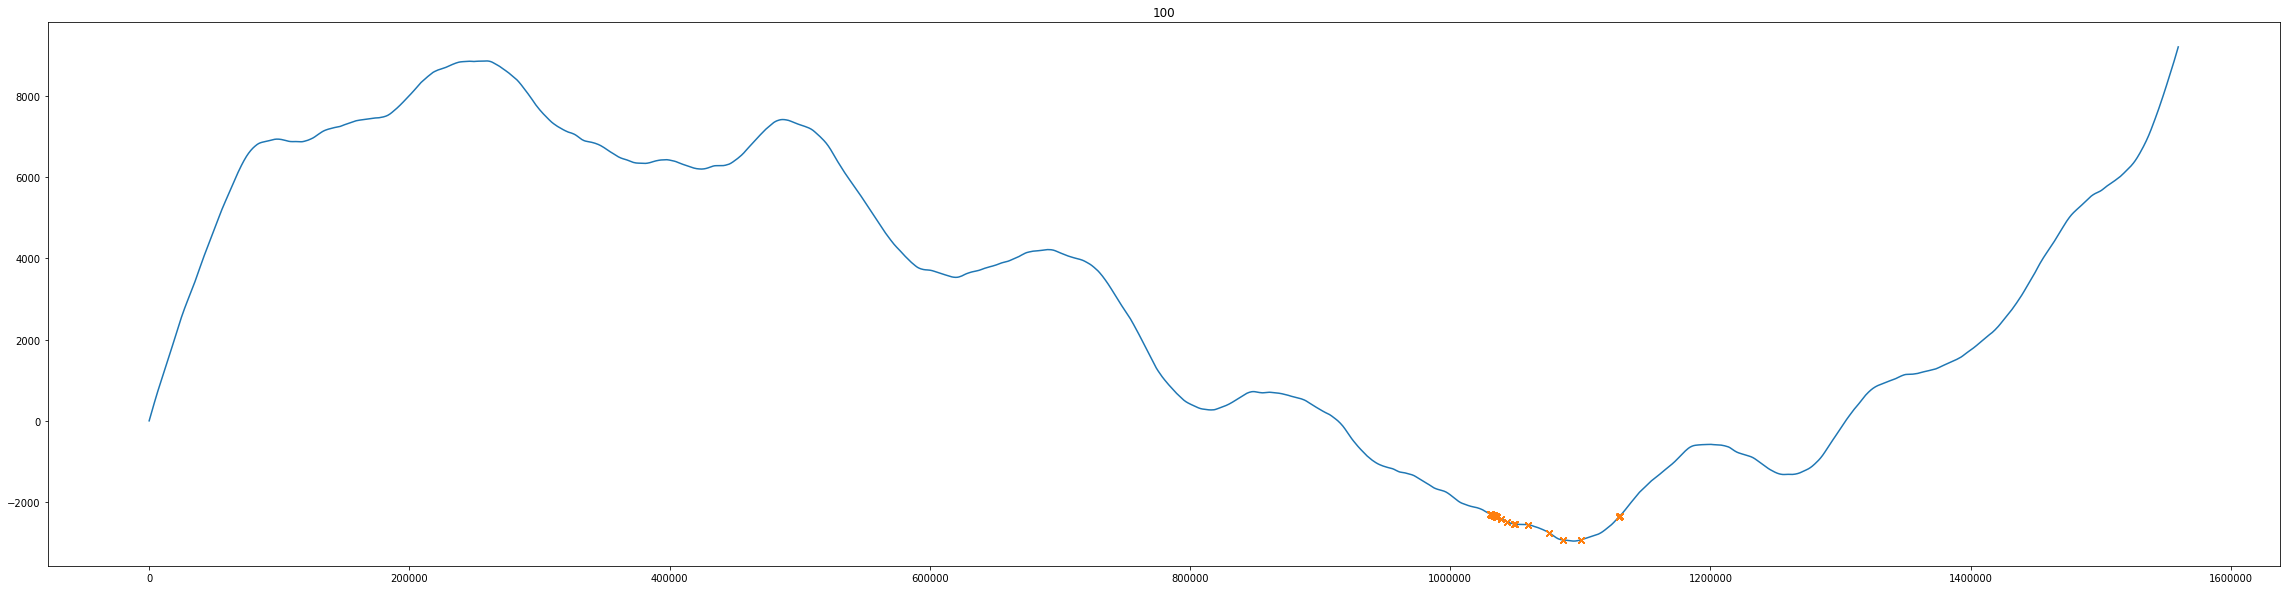

In [37]:
orite.plot_region_list(dopest_regions, max_cgc,rotated=True)

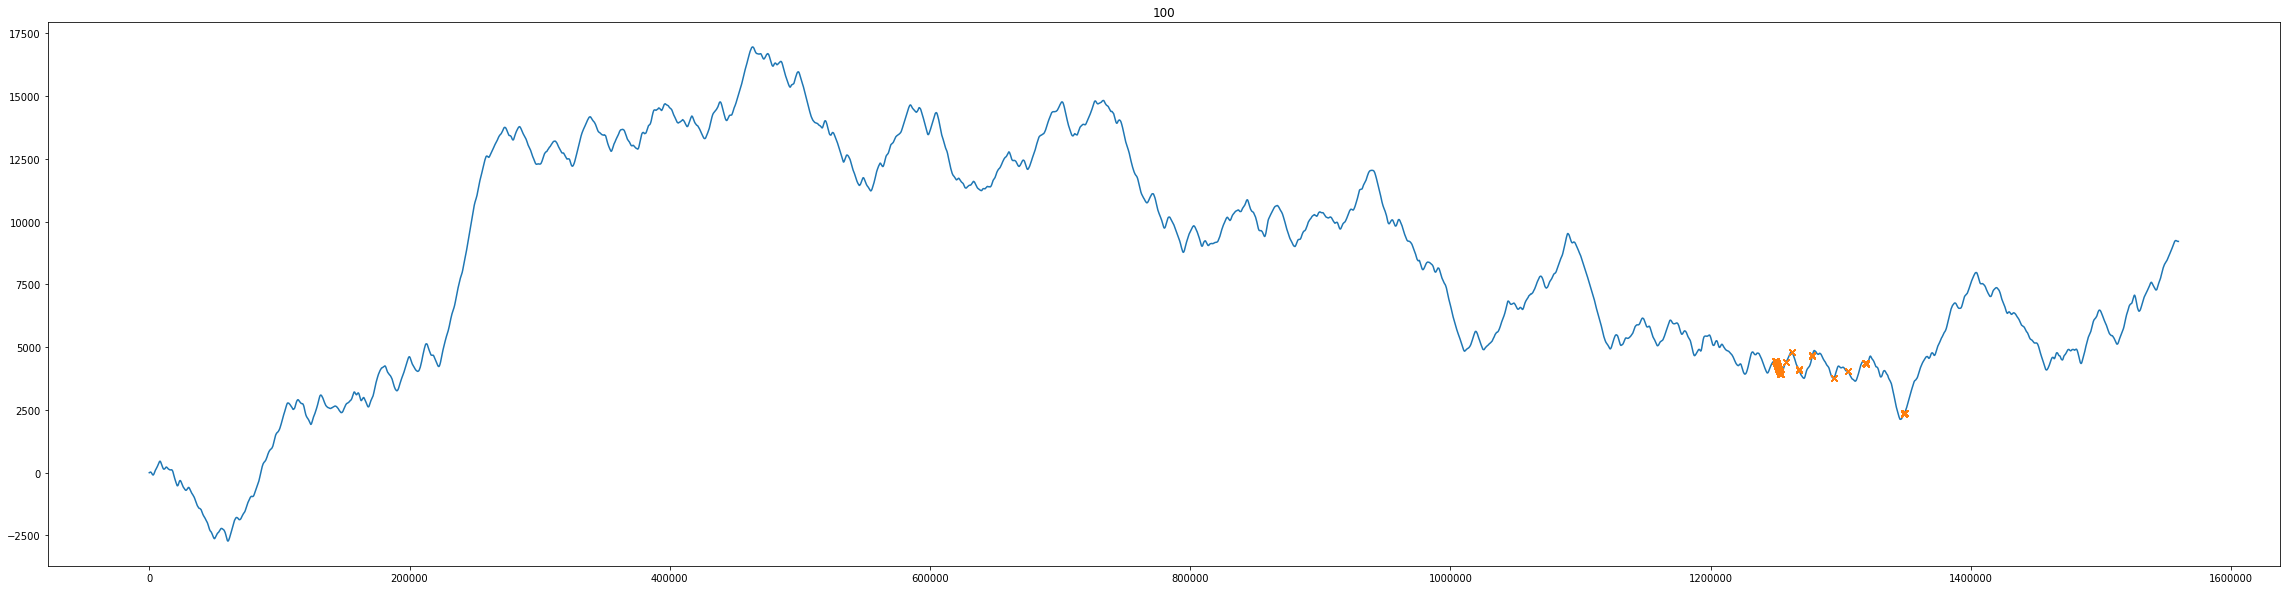

In [38]:
orite.plot_region_list(dopest_regions, og_cgc,rotated=False)

In [39]:
len(max_cgc)

1559514

In [40]:
m50k = orite.max_rotate_seq_and_skew_calc(og_seq, window_radius=50000)

inital max gc skew indx 218763
max cgc skew indx 1559513


In [41]:
m100k = orite.max_rotate_seq_and_skew_calc(og_seq, window_radius=100000)

inital max gc skew indx 173166
max cgc skew indx 256599


In [42]:
m200k = orite.max_rotate_seq_and_skew_calc(og_seq, window_radius=200000)

inital max gc skew indx 260766
max cgc skew indx 1559513


In [43]:
m25k = orite.max_rotate_seq_and_skew_calc(og_seq, window_radius=25000)

inital max gc skew indx 247915
max cgc skew indx 1559513


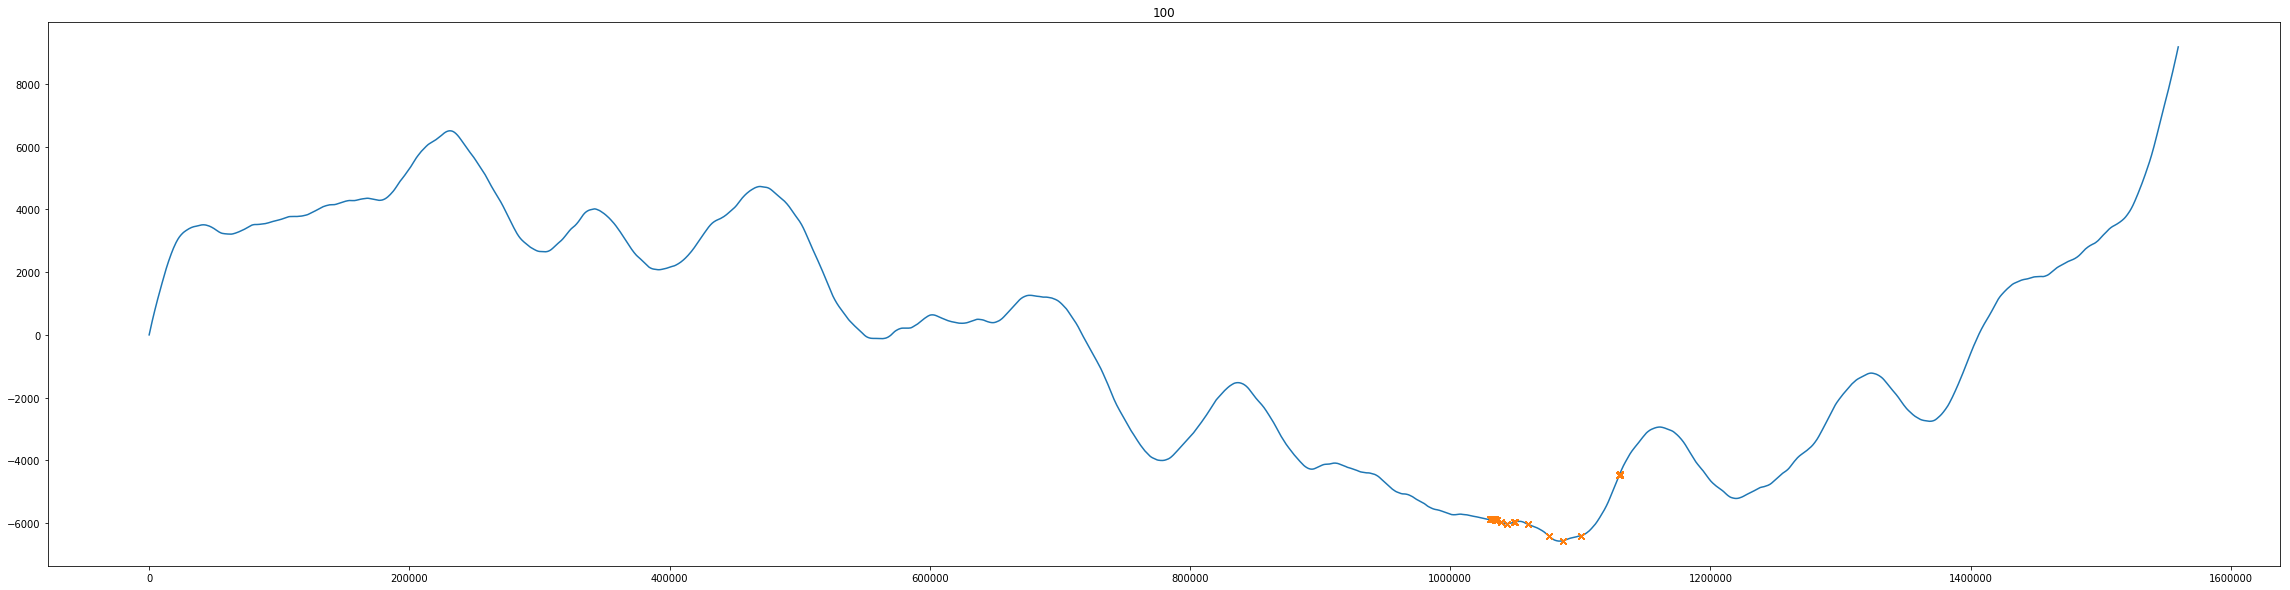

In [44]:
orite.plot_region_list(dopest_regions, m25k[1],rotated=True)

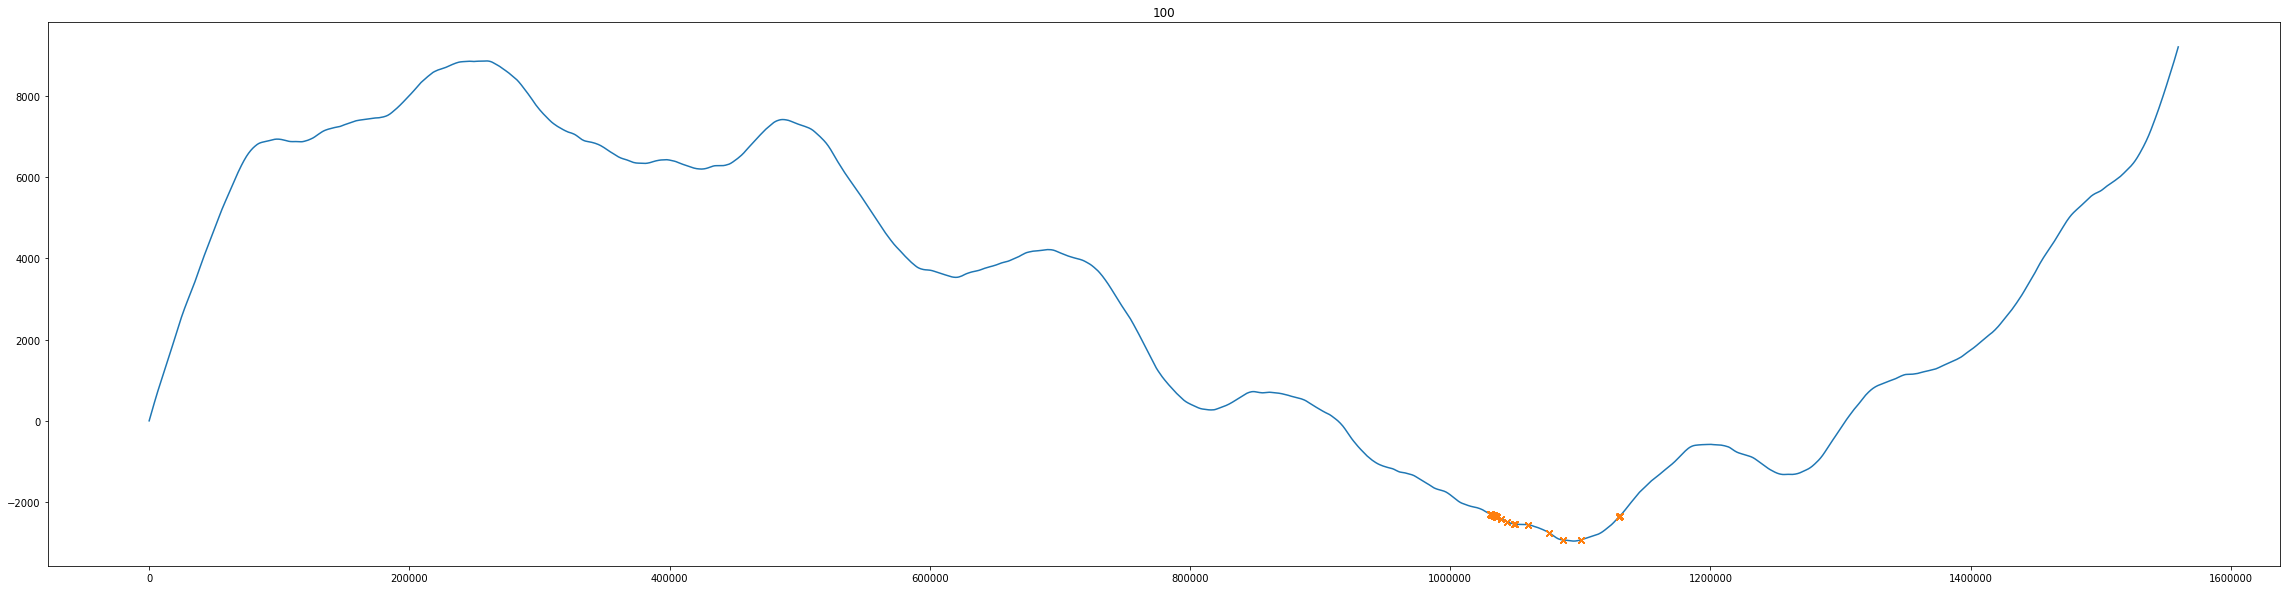

In [45]:
orite.plot_region_list(dopest_regions, m50k[1],rotated=True)

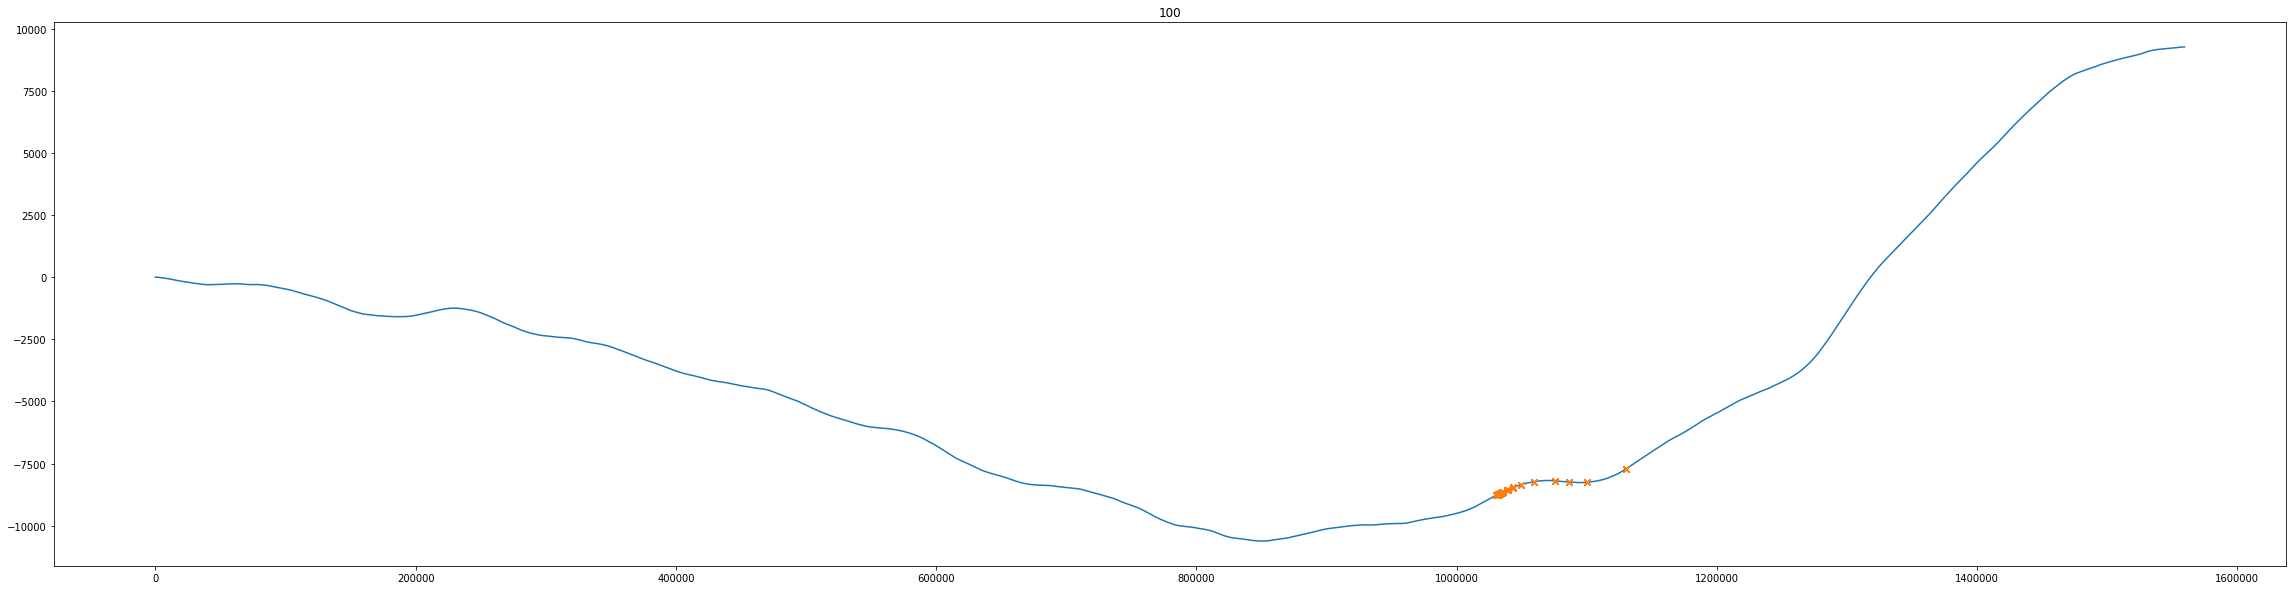

In [46]:
orite.plot_region_list(dopest_regions, m100k[1],rotated=True)

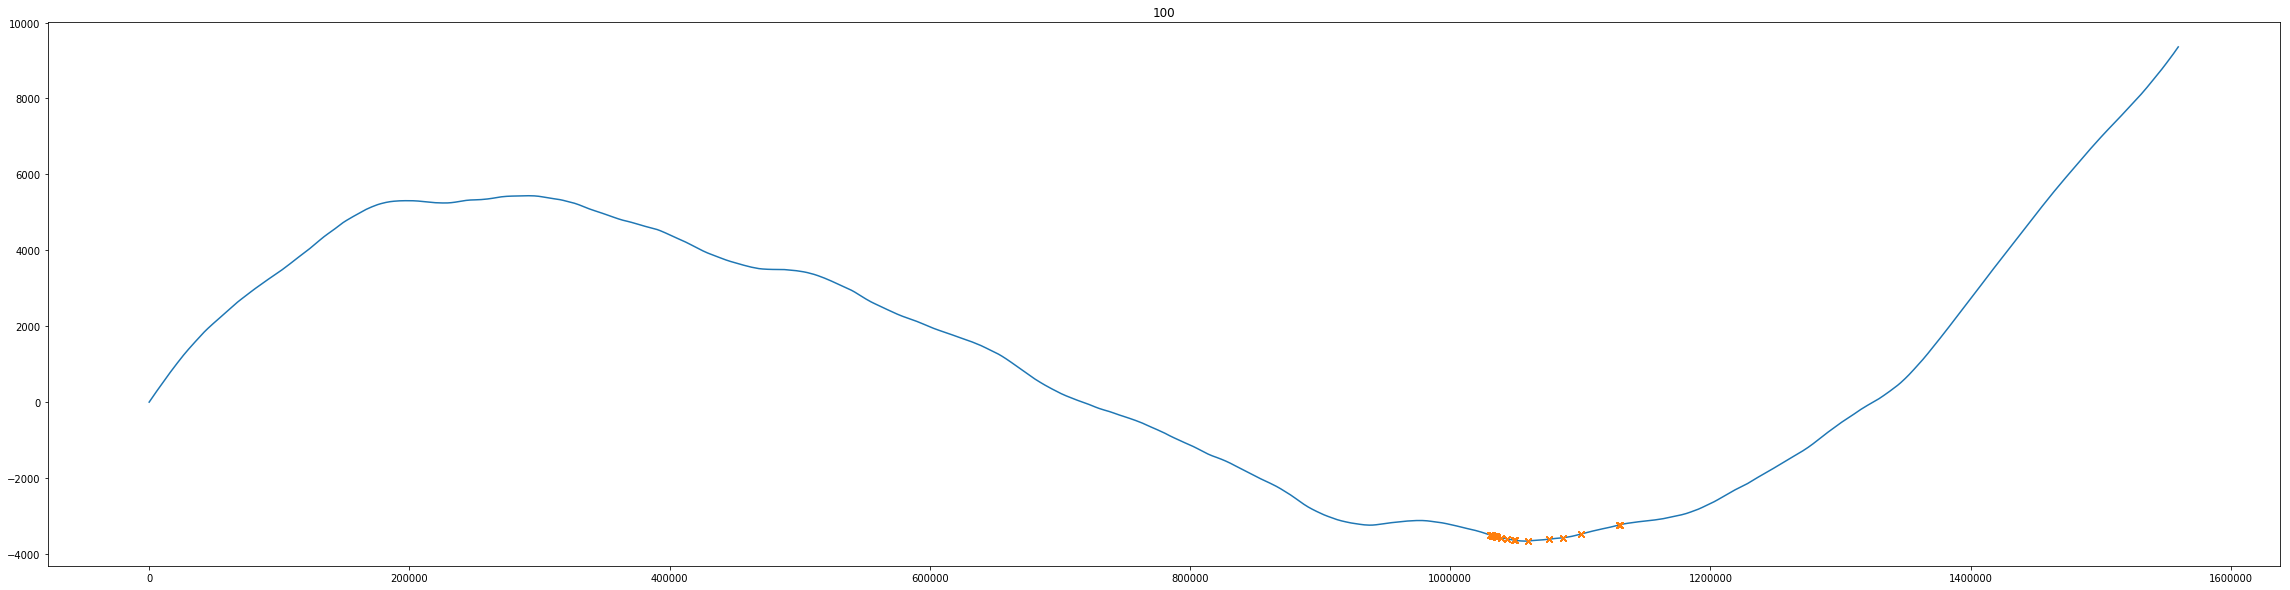

In [47]:
orite.plot_region_list(dopest_regions, m200k[1],rotated=True)

In [48]:
stupid_sum = m25k[1] + m50k[1]+ m100k[1]+ m200k[1]

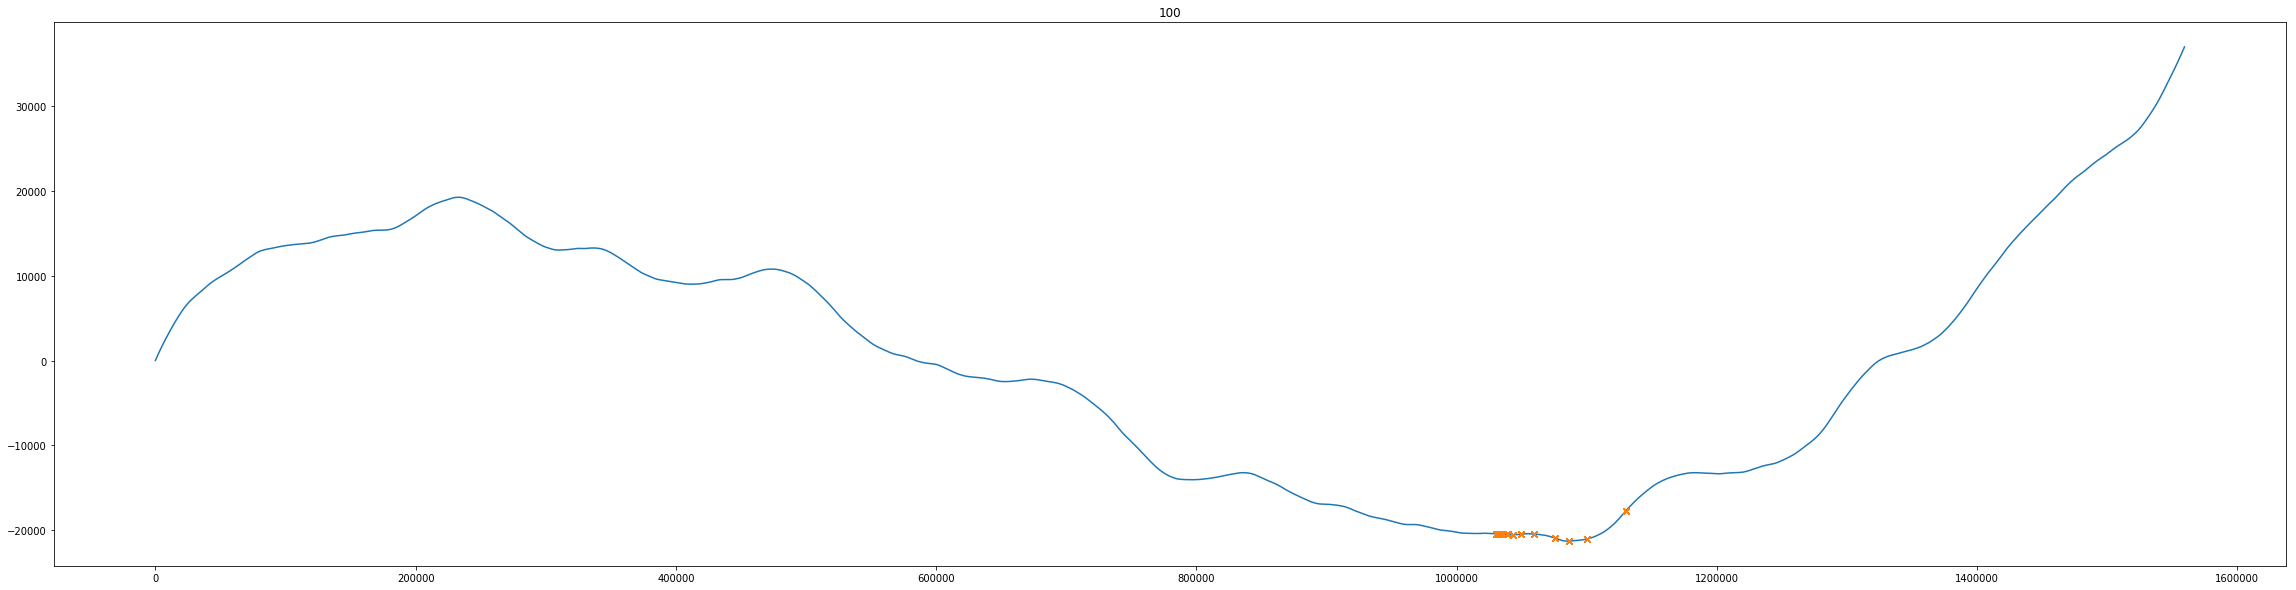

In [49]:
orite.plot_region_list(dopest_regions, stupid_sum,rotated=True)